In [ ]:
#import packages


In [26]:
#system packages

import sys
import warnings
import os 
import traceback #obs? 
if not sys.warnoptions:
    warnings.filterwarnings("once")  

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
#base packages:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats, integrate, optimize
import math
import datetime
from datetime import date, timedelta

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#optional packages

from statsmodels.tsa.base.datetools import dates_from_str
from IPython.display import display
pd.options.display.max_columns = 50  #allow DF.head to show all columns in notebook
from see import see
from tabulate import tabulate 
#from io import StringIO

In [29]:
#packages for the econometrics / models
import statsmodels.api as sm
from statsmodels.tsa.vector_ar import vecm
from statsmodels.tsa.stattools import adfuller, zivot_andrews
from arch.unitroot import DFGLS, ADF, KPSS, PhillipsPerron, ZivotAndrews
from arch.unitroot.cointegration import engle_granger, phillips_ouliaris
import statsmodels.formula.api as smf  #VAR package contained within 
import statsmodels.tsa.api as smt

#import the functionality for detecting mathematical errors (E.G. types of linear algebra issues etc.)
from statsmodels.tools.sm_exceptions import ValueWarning
from arch.utility.exceptions import (
    InfeasibleTestException,
    InvalidLengthWarning,
    invalid_length_doc)
warnings.filterwarnings("once", category = ValueWarning)

In [5]:
#sorted_alldata_df_final = pd.read_pickle("./sorted_alldata_df_final.pkl")
#sorted_alldata_df_final = pd.read_pickle(r"C:\Users\JasonSpano\OneDrive\Uva Msc 19-20 Subjects\Research Assistant Docs\CDS_project_-_first_set_of_tasks\Part 2_jan20./sorted_alldata_df_final.pkl")

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#with ADF results: to be updated to VECM outcome (cointegration) eventually?
sorted_alldata_df_final_adf_results = pd.read_pickle("./sorted_alldata_df_final_adf_results.pkl")

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
class color:
   #a simplified way to easily call different style elements for displaying outputs
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   GREEN = '\033[92m'
   HEADER = '\033[95m' 
   OKBLUE = '\033[94m'
   WARNING = '\033[93m'
   FAIL = '\033[91m'
   END = '\033[0m'

## maybe scrap equities trading data from this section?? 

HOW TO HANDLE EQUITIES DATA?

* Analyse that seperately, maybe some correlation methods with VIX? 
* Regress on different elements of the firm level ratios + 

### NEED THE GENERAL MARKET RETURN OF S&P 500?


#### SEE FONTANA 2011! for extracting market risk premium from S&P 500 (VIX, GARCH, S&P etc.) 

In [ ]:
https://stats.stackexchange.com/questions/577/is-there-any-reason-to-prefer-the-aic-or-bic-over-the-other

# ADF: (#2)
* https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

In [19]:
sorted_alldata_df_final

,gvkey,trade_date,bond_sym_id,price,issue_id,bond_in_mergent,coupon,interest_frequency,coupon_type,maturity_date,secured,seniority,years_to_maturity,riskfree_rate_1yr,riskfree_rate_2yr,riskfree_rate_3yr,riskfree_rate_4yr,riskfree_rate_5yr,market_cds_spread,series_id,initial_price,solved_lambda,year_index,pecds,cds_bond_basis,year_month,sector,cboe_vix,ted_rate,ticker,company_name,trading_vol_daily,price_close,price_high,price_low,price_open,eps,price_sales,price_cashflow,gross_profit_ta,capital_ratio,debt_eq_ratio,rnd_sales
0,1045,2009-09-24,AMR.UY,103.1100,504701.0,True,6.25,2.0,F,20141015.0,NaN,1.0,5.056914,0.580,1.240,1.860,2.350,2.710,1468.95,AMR5$AX,12.129838,0.036953,2009,12.046157,1456.903843,2009-09-01,Transporation,24.95,0.18,AAMRQ,AMERICAN AIRLINES GROUP INC,34493080.0,7.74,8.03,7.63,7.91,-3.51,0.071,-0.949,0.134,1.288,-13.427,0.000
1,1045,2009-09-25,AMR.UY,107.0000,504701.0,True,6.25,2.0,F,20141015.0,NaN,1.0,5.054176,0.620,1.290,1.900,2.370,2.710,1493.47,AMR5$AX,12.123144,0.037014,2009,12.066573,1481.403427,2009-09-01,Transporation,25.61,0.18,AAMRQ,AMERICAN AIRLINES GROUP INC,31763720.0,8.02,8.14,7.90,7.94,-3.51,0.071,-0.949,0.134,1.288,-13.427,0.000
2,1045,2009-09-28,AMR.UY,104.2500,504701.0,True,6.25,2.0,F,20141015.0,NaN,1.0,5.045963,0.620,1.300,1.890,2.340,2.660,1522.60,AMR5$AX,12.126682,0.037318,2009,12.167274,1510.432726,2009-09-01,Transporation,24.88,0.17,AAMRQ,AMERICAN AIRLINES GROUP INC,13330220.0,8.00,8.20,7.90,8.06,-3.51,0.071,-0.949,0.134,1.288,-13.427,0.000
3,1045,2009-09-29,AMR.UY,105.7500,504701.0,True,6.25,2.0,F,20141015.0,NaN,1.0,5.043225,0.640,1.330,1.900,2.340,2.660,1535.88,AMR5$AX,12.124804,0.037335,2009,12.172879,1523.707121,2009-09-01,Transporation,25.19,0.16,AAMRQ,AMERICAN AIRLINES GROUP INC,16459960.0,8.00,8.25,7.98,8.06,-3.51,0.071,-0.949,0.134,1.288,-13.427,0.000
4,1045,2009-09-30,AMR.UY,105.6268,504701.0,True,6.25,2.0,F,20141015.0,NaN,1.0,5.040487,0.630,1.300,1.880,2.310,2.640,1634.44,AMR5$AX,12.130400,0.037417,2009,12.200371,1622.239629,2009-09-01,Transporation,25.61,0.15,AAMRQ,AMERICAN AIRLINES GROUP INC,18732570.0,7.95,8.12,7.71,8.02,-3.51,0.121,-1.623,0.134,1.288,-13.427,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460267,179700,2017-06-26,DPS.AI,103.1190,564989.0,True,3.20,2.0,F,20211115.0,0.0,1.0,4.388865,1.421,1.546,1.651,1.738,1.815,230.31,DPS5$AX,-5.925957,0.162585,2017,110.343059,119.966941,2017-06-01,Consumer Staples,9.90,0.31,DPS,DR PEPPER SNAPPLE GROUP INC,1103392.0,92.92,93.76,92.68,93.26,4.57,2.640,19.860,0.431,0.633,3.289,0.003
460268,179700,2017-06-27,DPS.AI,103.5360,564989.0,True,3.20,2.0,F,20211115.0,0.0,1.0,4.386127,1.436,1.573,1.688,1.783,1.868,230.31,DPS5$AX,-5.922706,0.162339,2017,110.161852,120.148148,2017-06-01,Consumer Staples,11.06,0.31,DPS,DR PEPPER SNAPPLE GROUP INC,895203.0,91.63,92.70,91.39,92.62,4.57,2.640,19.860,0.431,0.633,3.289,0.003
460269,179700,2017-06-28,DPS.AI,103.6400,564989.0,True,3.20,2.0,F,20211115.0,0.0,1.0,4.383389,1.434,1.571,1.690,1.790,1.877,230.31,DPS5$AX,-5.922515,0.162290,2017,110.125823,120.184177,2017-06-01,Consumer Staples,10.03,0.30,DPS,DR PEPPER SNAPPLE GROUP INC,1197095.0,92.22,92.79,91.82,92.03,4.57,2.640,19.860,0.431,0.633,3.289,0.003
460270,179700,2017-06-29,DPS.AI,103.4370,564989.0,True,3.20,2.0,F,20211115.0,0.0,1.0,4.380651,1.448,1.598,1.724,1.832,1.925,230.31,DPS5$AX,-5.919429,0.162070,2017,109.963876,120.346124,2017-06-01,Consumer Staples,11.44,0.28,DPS,DR PEPPER SNAPPLE GROUP INC,853952.0,90.90,92.02,90.70,91.98,4.57,2.640,19.860,0.431,0.633,3.289,0.003


In [20]:
gvkey_frame = sorted_alldata_df_final.loc[sorted_alldata_df_final.gvkey==179700]

In [25]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [26]:
adf_test(gvkey_frame['market_cds_spread'])

Results of Dickey-Fuller Test:
Test Statistic                   -5.387622
p-value                           0.000004
#Lags Used                       20.000000
Number of Observations Used    1477.000000
Critical Value (1%)              -3.434785
Critical Value (5%)              -2.863499
Critical Value (10%)             -2.567813
dtype: float64


In [27]:
adfuller(gvkey_frame['market_cds_spread'], maxlag=None, 
         regression='c',
         autolag='AIC',
         store=True, 
         regresults=True)

(-5.387622148488619,
 3.5959786595425608e-06,
 {'1%': -3.434785139702456,
  '5%': -2.863498825305098,
  '10%': -2.5678128583805213},
 <statsmodels.tsa.stattools.ResultsStore at 0x26a8695a108>)

# ADF TEST EXPLANATION: 
* Single GVKEY

In [ ]:
dictionaries preserve dtypes:
    https://stackoverflow.com/questions/43816160/create-pandas-dataframe-from-lists-while-preserving-datatypes

In [ ]:
https://stackoverflow.com/questions/21604498/numpy-cholesky-decomposition-linalgerror

In [ ]:
for key, value in test_ADF_cds.critical_values.items():
    print('\t%s: %.3f' % (key, value))

In [10]:
gvkey_selection = 179700
gvkey_frame = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
vix = gvkey_frame['cboe_vix']

gvkey_frame_adf = pd.DataFrame(data=(cds, pecds, vix)).T
var_model_adf = smt.VAR(gvkey_frame_adf)  
#res_model_adf = var_model_adf.fit(maxlags=var_model_adf.select_order(maxlags=5).bic)  #VAR MODEL
bic_selected_lag_adf = var_model_adf.select_order(maxlags=5).bic

ADF_cds = ADF(cds, lags=bic_selected_lag_adf)
ADF_cds.summary()

Test Statistic,-5.087
P-value,0.000
Lags,1


In [11]:
see(ADF_cds)

    <                   <=                  ==                  !=                  >                   >=
    dir()               hash()              help()              repr()              str()
    .alternative_hypothesis                 .critical_values    .lags               .max_lags           .nobs
    .null_hypothesis    .pvalue             .regression         .stat               .summary()          .trend
    .valid_trends       .y

In [10]:
see(ADF_cds)

    <                   <=                  ==                  !=                  >                   >=
    dir()               hash()              help()              repr()              str()
    .alternative_hypothesis                 .critical_values    .lags               .max_lags           .nobs
    .null_hypothesis    .pvalue             .regression         .stat               .summary()          .trend
    .valid_trends       .y

In [9]:
see(var_model_adf)

C:\Users\JasonSpano\anaconda3\lib\site-packages\see\inspector.py:117: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  prop = getattr(obj, attr)


    <                  <=                 ==                 !=                 >                  >=
    dir()              hash()             help()             repr()             str()              .data
    .endog             .endog_names       .exog              .exog_names        .fit()             .from_formula()
    .hessian()         .information()     .initialize()      .k_constant        .k_trend           .loglike()
    .n_totobs          .neqs              .predict()         .score()           .select_order()    .y

In [ ]:
ADF(pecds, lags=bic_selected_lag_adf).summary()

In [8]:
#DFGLS 

gvkey_selection = 179700
gvkey_frame = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']

gvkey_frame_dfgls = pd.DataFrame(data=(cds, pecds)).T
var_model_dfgls = smt.VAR(gvkey_frame_dfgls)  
#res_model_adf = var_model_adf.fit(maxlags=var_model_adf.select_order(maxlags=5).bic)  #VAR MODEL
#bic_selected_lag_dfgls = var_model_dfgls.select_order(maxlags=5).bic

#dfgls_test_cds = ADF(cds, lags=bic_selected_lag_dfgls)
dfgls_test_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
dfgls_test_cds.summary()

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Test Statistic,0.431
P-value,0.821
Lags,0


In [9]:
see(dfgls_test_cds)

    <                   <=                  ==                  !=                  >                   >=
    dir()               hash()              help()              repr()              str()
    .alternative_hypothesis                 .critical_values    .lags               .max_lags           .nobs
    .null_hypothesis    .pvalue             .regression         .stat               .summary()          .trend
    .valid_trends       .y

In [ ]:
#displaying only stationary observations

#stationary only variables for 1% / 5% significance for both series
#statationary_cdsbonds_df = df_stat_cdsbond_results.loc[((df_stat_cdsbond_results.stationarity_test_res_bond=='***') | (df_stat_cdsbond_results.stationarity_test_res_bond=='**')) & ((df_stat_cdsbond_results.stationarity_test_res_cds=='***') | (df_stat_cdsbond_results.stationarity_test_res_cds=='**'))]

#USE: 
stationary_gvkeys

#for the VAR in levels

In [ ]:
## ADF testing with different lag conventions and the mean number of firms ?

#max lags = 10  restrictions:
print("10 LAGS: BONDS")
bond_lag_series = pd.to_numeric(df_stat_cdsbond_results['BOND_ADF_LAGS'], errors='coerce')
print(bond_lag_series.mean())
print(bond_lag_series.median())
print(bond_lag_series.var())
print("BOND_LAGS (>2)", np.count_nonzero(bond_lag_series >2))
print("BOND_LAGS ==(2)", np.count_nonzero(bond_lag_series ==2))
print("BOND_LAGS ==(1)", np.count_nonzero(bond_lag_series ==1))
print("BOND_LAGS ==(0)", np.count_nonzero(bond_lag_series ==0))

#with max lags == 10 restrictions
print('\n', "10 LAGS: CDS")
cds_lag_series = pd.to_numeric(df_stat_cdsbond_results['CDS_ADF_LAGS'], errors='coerce')
print(cds_lag_series.mean())
print(cds_lag_series.median())
print(cds_lag_series.var())
print("CDS_LAGS (>2)", np.count_nonzero(cds_lag_series >2))
print("CDS_LAGS ==(2)", np.count_nonzero(cds_lag_series ==2))
print("CDS_LAGS ==(1)", np.count_nonzero(cds_lag_series ==1))
print("CDS_LAGS ==(0)", np.count_nonzero(cds_lag_series ==0))

In [ ]:
#10 lags
bic_lag_series = pd.to_numeric(df_stat_cdsbond_results['bic_lag'], errors='coerce')
bic_lag_series
print(bic_lag_series.mean())
print(bic_lag_series.median())
print(bic_lag_series.var())
print("BIC_LAGS (>2)", np.count_nonzero(bic_lag_series >2))
print("BIC_LAGS ==(2)", np.count_nonzero(bic_lag_series ==2))
print("BIC_LAGS ==(1)", np.count_nonzero(bic_lag_series ==1))
print("BIC_LAGS ==(0)", np.count_nonzero(bic_lag_series ==0))

In [ ]:
#new
print(len(df_stat_cdsbond_results.loc[df_stat_cdsbond_results.Joint_Test_Outcome=="BOND/CDS Both Have Unit Root"]))
print(len(df_stat_cdsbond_results.loc[df_stat_cdsbond_results.Joint_Test_Outcome=="BOND ONLY HAS UR"]))
print(len(df_stat_cdsbond_results.loc[df_stat_cdsbond_results.Joint_Test_Outcome=="CDS ONLY HAS UR"]))
print(len(df_stat_cdsbond_results.loc[df_stat_cdsbond_results.Joint_Test_Outcome=="Cannot Reject H0"]))

### VARIANCE RATIO

In [ ]:
#single GVKEY: VarianceRatio test:
gvkey_number = 174729
gvkey_frame = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_number]

print("Variance Ratio Test with individual GVKEY NUMBER: {}".format(gvkey_number))

cds_vr = gvkey_frame['market_cds_spread']
pecds_vr = gvkey_frame['pecds']
#data_vr = pd.DataFrame(data=(cds, pecds)).T
#data = np.column_stack((cds, pecds))

lag_length_vr_test = 0.05 * len(cds_vr)
print(lag_length_vr_test); print(np.floor(lag_length_vr_test))
npfloor_vr_test_lag_5percent = np.floor(lag_length_vr_test)

variance_ratio_model = VarianceRatio(cds_vr, trend='c', robust=True, lags=int(npfloor_vr_test_lag_5percent))      
variance_ratio_model.summary()  

# ZIVOT-ANDREWS

In [8]:
#Z-A Single GVKEY tester
gvkey_1045 = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==1045]

gvkey_1045_za = ZivotAndrews(gvkey_1045['market_cds_spread'], trend='c',trim=0.15, max_lags=5, method='BIC')
#trend
gvkey_1045_za.summary()

Test Statistic,-22.111
P-value,0.000
Lags,0


In [9]:
#Z-A Single GVKEY tester
gvkey_10247 = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==10247]

gvkey_10247_za = ZivotAndrews(gvkey_10247['market_cds_spread'], trend='c',trim=0.15, max_lags=5, method='BIC')
#trend
gvkey_10247_za.summary()

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test Statistic,-8.288
P-value,0.000
Lags,0


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9))
fig.suptitle('Single GVKEY (1045) CDS Spread Subplots ')

gvkey_1045.groupby(['year_index'])['market_cds_spread'].plot(ax=ax1)
ax1.set_ylabel('CDS Spread')
ax1.axes.get_xaxis().set_visible(False)


gvkey_1045.groupby(['year_index']).mean()['market_cds_spread'].plot(ax=ax2);
ax2.set_ylabel('Annual Mean CDS Spread')
ax2.set_xlabel('Year');
                       

In [ ]:
#gvkey_1045_za.critical_values.items()
ZA_critical_values_dictionary = list(gvkey_1045_za.critical_values.values())

za_one_percent_cv = ZA_critical_values_dictionary[0]
za_five_percent_cv = ZA_critical_values_dictionary[1]
za_ten_percent_cv = ZA_critical_values_dictionary[2]

print(" ONE % ZA CRITICAL VALUE:", za_one_percent_cv, '\n', "FIVE % ZA CRITICAL VALUE:", za_five_percent_cv, '\n', 
      "TEN % ZA CRITICAL VALUE:", za_ten_percent_cv)

In [13]:
#insert GVKEY, view individual test results

gvkey_selection = 176760

## breakpoint / statsmodels 
za_1300_smls = zivot_andrews(sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]['market_cds_spread'], 
             regression='c',
            trim=0.075, 
            maxlag=10, autolag='t-stat')



za_1300_smls

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-4.390256086158083,
 0.1556455464336574,
 {'1%': -5.27644, '5%': -4.81067, '10%': -4.56618},
 10,
 424)

In [9]:
#insert GVKEY, view individual test results

gvkey_selection = 176760

za_1300 = ZivotAndrews(sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]['market_cds_spread'], 
             trend='c',trim=0.075, max_lags=10, method='t-stat')



za_1300.summary()

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test Statistic,-4.390
P-value,0.156
Lags,10


In [18]:
za_1300.critical_values

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'1%': -5.03421, '5%': -4.4058, '10%': -4.13678}

In [20]:
see(za_1300)

    <                   <=                  ==                  !=                  >                   >=
    dir()               hash()              help()              repr()              str()
    .alternative_hypothesis                 .critical_values    .lags               .nobs               .null_hypothesis
    .pvalue             .stat               .summary()          .trend              .valid_trends       .y

In [21]:
za_1300.stat

-4.0379237716515295

In [24]:
za_1300.critical_values['5%']

-4.4058

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


 COMPANY ==  ADVANCED MICRO DEVICES 
 SECTOR ==   Technology
GVKEY (1161) STANDARD DEVIATION IS:  395.9273


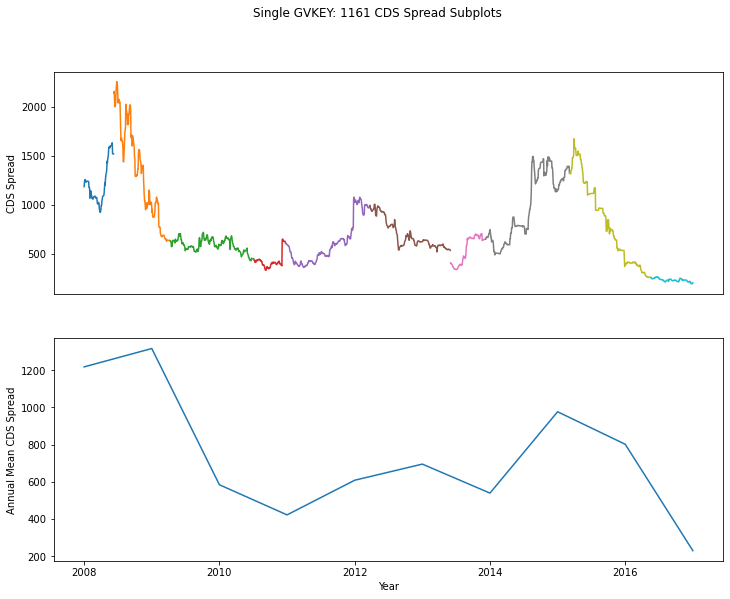

In [52]:
#insert GVKEY, view evolution of the key's CDS series & annual mean changes
#gvkey_selection = 1300

gvkey_group_df = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]
print(" COMPANY == ", gvkey_group_df.company_name.iloc[0], '\n', "SECTOR ==  ", gvkey_group_df.sector.iloc[0])

#view that GVKEY's standard deviation too
print("GVKEY ({}) STANDARD DEVIATION IS: ".format(gvkey_selection),
     np.round(sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]['market_cds_spread'].std(),4))


#PLOT: 

fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9))
fig.suptitle('Single GVKEY: {} CDS Spread Subplots'.format(gvkey_selection))

gvkey_group_df.groupby(['year_index'])['market_cds_spread'].plot(ax=ax1)
ax1.set_ylabel('CDS Spread')
ax1.axes.get_xaxis().set_visible(False)


gvkey_group_df.groupby(['year_index']).mean()['market_cds_spread'].plot(ax=ax2);
ax2.set_ylabel('Annual Mean CDS Spread')
ax2.set_xlabel('Year');
                       

In [ ]:
### PRIMER



In [ ]:
#insert GVKEY, view evolution of the key's CDS series & annual mean changes
gvkey_selection = 1045

gvkey_group_df = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]
print(" COMPANY == ", gvkey_group_df.company_name.iloc[0], '\n', "SECTOR ==  ", gvkey_group_df.sector.iloc[0])

#view that GVKEY's standard deviation too
print(" GVKEY ({}) STANDARD DEVIATION IS: ".format(gvkey_selection),
     np.round(sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]['market_cds_spread'].std(),2))


#PLOT: 

fig, (ax1, ax2) = plt.subplots(2, figsize=(12,9))
fig.suptitle('GVKEY: {} CDS Spread Subplots'.format(gvkey_selection))

gvkey_group_df.groupby(['year_index'])['market_cds_spread'].plot(ax=ax1)
ax1.set_ylabel('CDS Spread')
ax1.axes.get_xaxis().set_visible(False)


gvkey_group_df.groupby(['year_index']).mean()['market_cds_spread'].plot(ax=ax2);
ax2.set_ylabel('Annual Mean CDS Spread')
ax2.set_xlabel('Year');
                       

## Visualise this point in time directly from the data DF: 

* Continuing with the: GVKEY (1045) example

In [ ]:
#view the loc_index indicated by the ZA test for one specific GVKEY:
zivotandrews_breakpoint_locations.loc[zivotandrews_breakpoint_locations.gvkey==gvkey_selection]

In [ ]:
#create a mini DF with just the three relevant series to simplify the viewing process:
zivot_andrews_mini_explanation_df = sorted_alldata_df_final_adf_results[['gvkey','trade_date','market_cds_spread']]

#now, visualise a few observations before and after the specified "break point/date"
zivot_andrews_mini_explanation_df.loc[zivot_andrews_mini_explanation_df.gvkey==gvkey_selection][274:280]

#### Thus, it becomes fairly evident that the last date of the original breakpoint is (2010-10-15) which corresponds to the index.location(276). This is the precise location given by the Zivot Andrews test.
* Accordingly, it is obvious that the next data point is several years later and the spread is substantially higher. Thus, this si the location of the structural breakpoint. 

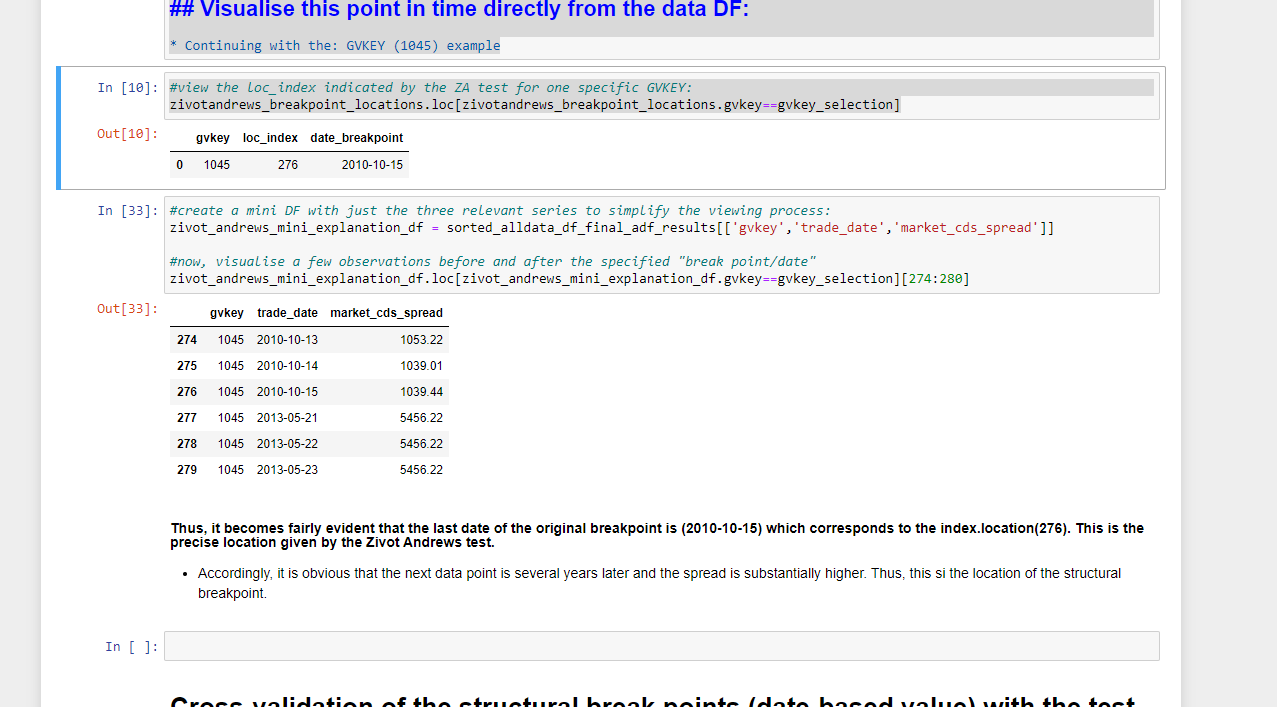

In [ ]:
##E.G Arch Unitroot Test 
#Test for a consistent time-series without structural breaks with the ZA test

#specify the same key as above:
gvkey_selection = 1045

#set the trend == (just a constant); same specification used in the statsmodel test for the breakpoint dates
ZivotAndrews(sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]['market_cds_spread'], 
             trend='c',trim=0.15, max_lags=5, method='BIC').summary()

In [ ]:
#view the loc_index indicated by the ZA test for one specific GVKEY:
zivotandrews_breakpoint_locations.loc[zivotandrews_breakpoint_locations.gvkey==gvkey_selection]

In [ ]:
#create a mini DF with just the three relevant series to simplify the viewing process:
zivot_andrews_mini_explanation_df = sorted_alldata_df_final_adf_results[['gvkey','trade_date','market_cds_spread']]

#now, visualise a few observations before and after the specified "break point/date"
zivot_andrews_mini_explanation_df.loc[zivot_andrews_mini_explanation_df.gvkey==gvkey_selection][274:280]

#### Thus, it becomes fairly evident that the last date of the original breakpoint is (2010-10-15) which corresponds to the index.location(276). This is the precise location given by the Zivot Andrews test.
* Accordingly, it is obvious that the next data point is several years later and the spread is substantially higher. Thus, this is the location of the structural breakpoint. 

# Cross-validation of the structural break points (date-based value) with the test-statistics/significance levels derived from the arch.unitroot.ZivotAndrews

* This will allow us to isolate which GVKEYS actually fail to reject the null hypothesis, and then cross-reference the date associated with the break

* This is because only the statsmodels ZA package has the date feature, but the arch.unitroot package is more robust for running the actual test and deriving the statistics


* A detailed breakdown is again in the primer document, a very broad overview is presented below.

In [ ]:
##E.G Arch Unitroot Test 
#Test for a consistent time-series without structural breaks with the ZA test

#specify the same key as above:
gvkey_selection = 1045

#set the trend == (just a constant); same specification used in the statsmodel test for the breakpoint dates
ZivotAndrews(sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]['market_cds_spread'], 
             trend='c',trim=0.15, max_lags=5, method='BIC').summary()

* The reported test statistic is extremely negative & significant. Thus, rejecting the Null Hypothesis at the 99% significance level 
* This supports the visual representation of there being indeed, a severe structural break

In [ ]:
#create a seperate DF specifically with just break stationary GVKEYS -- although unneeded. 
combined_za_has_bp_df = combined_za_breakpoints_df.loc[combined_za_breakpoints_df.CDS_pval<=0.05]

print("#NUM OF BREAK STATIONARY GVKEYS {}".format(len(combined_za_has_bp_df)))
#114

In [ ]:
#cut this as all keys with pval < 0.05 have trend/break stationary outcome

# JOHANSENS COINT

In [ ]:
# number of unit-roots: (ADF) old version

UR_ONLY_DF = sorted_alldata_df_final_adf_results.loc[
    sorted_alldata_df_final_adf_results.Joint_Test_Outcome=='BOND/CDS Both Have Unit Root']

len(UR_ONLY_DF.groupby('gvkey')['Joint_Test_Outcome'].nunique())

In [ ]:
gvkey_1919 = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==1919]
print("Total Length of Gvkey: {} OBS".format(len(gvkey_1919)))

In [8]:
#single GVKEY: cointegration test:
gvkey_selection = 1045
#other keys: 1045 / 2184 / 1045

gvkey_group_df = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]
print(" COMPANY == ", gvkey_group_df.company_name.iloc[0], '\n', "SECTOR ==  ", gvkey_group_df.sector.iloc[0])

print("JOHANSENS COINT TEST with individual GVKEY NUMBER: " + str(gvkey_selection))

cds = gvkey_group_df['market_cds_spread']
pecds = gvkey_group_df['pecds']
data = pd.DataFrame(data=(cds, pecds)).T
#data = np.column_stack((cds, pecds))

model = vecm.select_order(data, maxlags=5)
optimal_lag_length = model.bic
print("Optimal Lag Lengths: {}".format(optimal_lag_length))
    
vecm_cointeg_rank = vecm.select_coint_rank(data, det_order=0, 
                                                  k_ar_diff=optimal_lag_length, 
                                                  method='maxeig', 
                                                  signif=0.05)
        
print(vecm_cointeg_rank.summary())
print("Number of Cointegrating relationships:", vecm_cointeg_rank.rank)

 COMPANY ==  AMERICAN AIRLINES GROUP INC 
 SECTOR ==   Transporation
JOHANSENS COINT TEST with individual GVKEY NUMBER: 1045
Optimal Lag Lengths: 0
Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          17.94          14.26
  1   2         0.2074          3.841
-------------------------------------
Number of Cointegrating relationships: 1


### STATSMODELS JOHANSEN COINTEGRATION TEST (PROPER)

In [ ]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.vecm.JohansenTestResult.html#statsmodels.tsa.vector_ar.vecm.JohansenTestResult

In [18]:
#single GVKEY: (JOHANSEN) cointegration test:
gvkey_selection = 1045
#other keys: 1045 / 2184 / 1045

gvkey_group_df = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]
print(" COMPANY == ", gvkey_group_df.company_name.iloc[0], '\n', "SECTOR ==  ", gvkey_group_df.sector.iloc[0])

print("JOHANSENS COINT TEST with individual GVKEY NUMBER: " + str(gvkey_selection))

cds = gvkey_group_df['market_cds_spread']
pecds = gvkey_group_df['pecds']
data = pd.DataFrame(data=(cds, pecds)).T
#data = np.column_stack((cds, pecds))

model = vecm.select_order(data, maxlags=5)
optimal_lag_length = model.bic
print("MODEL SELECTED ORDERS // ", model.selected_orders, '\n')
print("Optimal Lag Length BIC: {}".format(optimal_lag_length))

vecm_johansen_coint = vecm.coint_johansen(data,
                                         det_order = 0,
                                         k_ar_diff = optimal_lag_length)

        
vecm_johansen_coint

 COMPANY ==  AMERICAN AIRLINES GROUP INC 
 SECTOR ==   Transporation
JOHANSENS COINT TEST with individual GVKEY NUMBER: 1045
MODEL SELECTED ORDERS //  {'aic': 0, 'bic': 0, 'hqic': 0, 'fpe': 0} 

Optimal Lag Length BIC: 0


In [17]:
see(vecm_johansen_coint)

    <                <=               ==               !=               >                >=               dir()
    hash()           help()           repr()           str()            .cvm             .cvt             .eig
    .evec            .ind             .lr1             .lr2             .max_eig_stat    .max_eig_stat_crit_vals
    .meth            .r0t             .rkt             .trace_stat      .trace_stat_crit_vals

In [19]:
vecm_johansen_coint.eig

array([0.03237908, 0.00038047])

In [20]:
vecm_johansen_coint.evec

array([[ 0.00029979, -0.00043628],
       [-0.20013364, -0.05115033]])

In [22]:
vecm_johansen_coint.ind

array([0, 1], dtype=int64)

In [30]:
vecm_johansen_coint.trace_stat #trace

array([18.14600339,  0.20739464])

In [31]:
vecm_johansen_coint.max_eig_stat #max eigenvalue stat

array([17.93860875,  0.20739464])

In [27]:
vecm_johansen_coint.max_eig_stat_crit_vals

array([[12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [28]:
vecm_johansen_coint.meth

'johansen'

In [34]:
vecm_johansen_coint.trace_stat_crit_vals #crit values of trace statistic

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [21]:
vecm_johansen_coint.r0t #residuals for delta(y)

array([[ 1.72039083e+01, -1.26966641e-02],
       [ 2.18139083e+01,  6.75886670e-02],
       [ 5.96390826e+00, -2.75079025e-02],
       ...,
       [-7.31609174e+00,  9.61142572e-02],
       [-7.31609174e+00,  2.88771672e-02],
       [-7.31609174e+00, -1.62370416e-01]])

In [35]:
vecm_johansen_coint.rkt #residuals for Y-1

array([[-1.94034563e+03, -1.92447668e+01],
       [-1.91121563e+03, -1.91440654e+01],
       [-1.89793563e+03, -1.91384606e+01],
       ...,
       [ 2.02240437e+03, -1.15147436e+00],
       [ 2.02240437e+03, -1.08948445e+00],
       [ 2.02240437e+03, -1.21874213e+00]])

#### EM ALGO #####
#https://machinelearningmastery.com/expectation-maximization-em-algorithm/

* https://towardsdatascience.com/implement-expectation-maximization-em-algorithm-in-python-from-scratch-f1278d1b9137

In [43]:
from sklearn.mixture import GaussianMixture

In [46]:
gvkey_selection = 1045
#other keys: 1045 / 2184 / 1045

gvkey_group_df = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]

cds = gvkey_group_df['market_cds_spread']
pecds = gvkey_group_df['pecds']

#cds_mean = cds.mean()
#pecds_mean = pecds.mean()
#cds_stddev = cds.std()
#pecds_stddev = pecds.std()
#data = pd.DataFrame(data=(cds, pecds)).T

#cds_X1 = normal(loc=cds_mean, scale=cds_stddev, size=len(cds))
restacked_data = np.hstack((cds, pecds))
restacked_data = restacked_data.reshape((len(restacked_data), 1))

model_gmm = GaussianMixture(n_components=2, init_params='random')
model_gmm.fit(restacked_data)

model_yhat = model_gmm.predict(restacked_data)
print(model_yhat[:100], '\n\n', model_yhat[-100:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


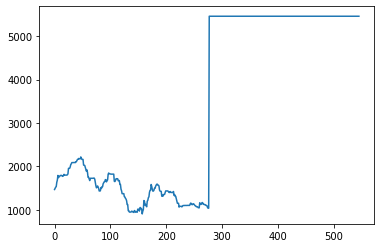

In [53]:
cds.plot()

In [51]:
print(model_yhat[300:400])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [36]:
y10 = [1,3, 5]
x10 = [2, 4, 6]
xy10 = np.hstack((y10, x10))

In [39]:
xy10_2 = np.column_stack((y10, x10))
xy10_2

array([[1, 2],
       [3, 4],
       [5, 6]])

In [37]:
xy10

array([1, 3, 5, 2, 4, 6])

## OLDER COINTEGRATION TESTS

In [ ]:
#from 07.01.2021

UR_ONLY_DF = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.Joint_Test_Outcome=='BOND/CDS Both Have Unit Root']

UR_ONLY_DF.groupby('gvkey')['Joint_Test_Outcome'].nunique()

In [ ]:
#single GVKEY: cointegration test:

gvkey_1408 = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==1408]

gvkey_number = 1408
gvkey_frame = gvkey_1408
print("JOHANSENS COINT TEST with individual GVKEY NUMBER: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
data = pd.DataFrame(data=(cds, pecds)).T
#data = np.column_stack((cds, pecds))

model = vecm.select_order(data, maxlags=5)
optimal_lag_length = model.bic
print("Optimal Lag Lengths == {}".format(optimal_lag_length))
    
vecm_cointeg_rank = vecm.select_coint_rank(data, det_order =0, k_ar_diff = optimal_lag_length, 
                                                  method='maxeig', signif=0.05)
        
print(vecm_cointeg_rank.summary())
print("Number of Cointegrating relationships:", vecm_cointeg_rank.rank)

## BREAKPOINT COINTEGRATION + ZIVOT-ANDREWS

* Links for time filtering:

* https://stackoverflow.com/questions/46230864/split-dataframe-on-the-basis-of-date
* https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates

* See also, PECDS 1.26 >> timedelta methods

In [39]:
#single GVKEY: cointegration test split on the breakdate:

gvkey_selection = 1045 #2184
#1919
#other keys: 1045 / 2184 / 1045

gvkey_group_df = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]
print(" COMPANY: ", gvkey_group_df.company_name.iloc[0], '\n', "SECTOR: ", gvkey_group_df.sector.iloc[0])

zivotandrews_bd = gvkey_group_df.ZA_BREAKDATE.iloc[0]
print(" Zivot Andrews Specified Breakdate: {}".format(gvkey_group_df.ZA_BREAKDATE.iloc[0]), '\n', "--"*25)

#split based on before and after ZA-test specified breakdate:
gvkey_group_df_before_bd = gvkey_group_df[(gvkey_group_df['trade_date'] < zivotandrews_bd)]
gvkey_group_df_after_bd = gvkey_group_df[(gvkey_group_df['trade_date'] > zivotandrews_bd)]

print((" Before BD #obs: {} \n After BD #obs {} \n Total # OBS: {}".format(len(gvkey_group_df_before_bd), 
                                                                             len(gvkey_group_df_after_bd),
                                                                             len(gvkey_group_df))), 
     '\n', "--"*25, '\n')

## BEFORE BREAKDATE SERIES
try:
    cds_before_bd = gvkey_group_df_before_bd['market_cds_spread']
    pecds_before_bd = gvkey_group_df_before_bd['pecds']
    data_before_bd = pd.DataFrame(data=(cds_before_bd, pecds_before_bd)).T

    model_before_bd = vecm.select_order(data_before_bd, maxlags=5)
    optimal_lag_length_before_bd = model_before_bd.bic
    vecm_cointeg_rank_before_bd = vecm.select_coint_rank(data_before_bd, det_order=0, k_ar_diff=optimal_lag_length_before_bd,
                                                        method='trace', signif=0.05)


    print(vecm_cointeg_rank_before_bd.summary(), '\n', "Number of Cointegrating Rels (Before): {}".format(
    vecm_cointeg_rank_before_bd.rank))
    print(" Optimal Lag Lengths in Before-BD Series: {}".format(optimal_lag_length_before_bd), 
         '\n', '--'*25, '\n')
    
except ValueError as ve:
    print(ve.args, '\n')
    


## AFTER BREAKDATE SERIES
try:
    cds_after_bd = gvkey_group_df_after_bd['market_cds_spread']
    pecds_after_bd = gvkey_group_df_after_bd['pecds']
    data_after_bd = pd.DataFrame(data=(cds_after_bd, pecds_after_bd)).T

    model_after_bd = vecm.select_order(data_after_bd, maxlags=5)
    optimal_lag_length_after_bd = model_after_bd.bic
    vecm_cointeg_rank_after_bd = vecm.select_coint_rank(data_after_bd, det_order=0, k_ar_diff=optimal_lag_length_after_bd,
                                                        method='trace', signif=0.05)


    print(vecm_cointeg_rank_after_bd.summary(), '\n', "Number of Cointegrating Rels (After): {}".format(
    vecm_cointeg_rank_after_bd.rank))
    print(" Optimal Lag Lengths in After-BD Series: {}".format(optimal_lag_length_after_bd), 
         '\n', '--'*25, '\n')
    
except ValueError as ve:
    print(ve.args, '\n')
    

## COMBINED SERIES:
try:
    cds = gvkey_group_df['market_cds_spread']
    pecds = gvkey_group_df['pecds']
    data = pd.DataFrame(data=(cds, pecds)).T
    #data = np.column_stack((cds, pecds))

    model = vecm.select_order(data, maxlags=5)
    optimal_lag_length = model.bic


    vecm_cointeg_rank = vecm.select_coint_rank(data, det_order=0, 
                                                      k_ar_diff=optimal_lag_length, 
                                                      method='maxeig', 
                                                      signif=0.05)


    print(vecm_cointeg_rank.summary(), '\n', "Number of Cointegrating Rels (Combined): {}".format(
    vecm_cointeg_rank.rank))
    print(" Optimal Lag Lengths in Combined Series: {}".format(optimal_lag_length), '\n')
    
except ValueError as ve:
    print(ve.args, '\n')    

 COMPANY:  AMERICAN AIRLINES GROUP INC 
 SECTOR:  Transporation
 Zivot Andrews Specified Breakdate: 2010-10-15 00:00:00 
 --------------------------------------------------
 Before BD #obs: 276 
 After BD #obs 269 
 Total # OBS: 546 
 -------------------------------------------------- 

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          12.59          15.49
------------------------------------- 
 Number of Cointegrating Rels (Before): 0
 Optimal Lag Lengths in Before-BD Series: 0 
 -------------------------------------------------- 

("x contains a constant. Adding a constant with trend='c' is not allowed.",) 

Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          17.94          14.26
  1   2         0.2074          3.841
----------

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [16]:
see(vecm_cointeg_rank_after_bd)

    <              <=             ==             !=             >              >=             dir()          hash()
    help()         repr()         str()          .crit_vals     .method        .neqs          .r_1           .rank
    .signif        .summary()     .test_stats

In [17]:
vecm_cointeg_rank_after_bd.r_1

[2, 2]

In [18]:
vecm_cointeg_rank_after_bd.rank

2

In [19]:
vecm_cointeg_rank_after_bd.test_stats

array([19.60163294,  4.71854984])

## ZIVOT_ANDREWS & COINT SPLIT (LOOP VERSION) V1.00

In [ ]:
## method contains the test statistics appended: 

%%time
#cointegration_method = 'trace'
gvkey_list = []                       
sector_list = [] 
before_nobs = []
after_nobs = []

## DFGLS ITEMS: CDS/BOND TEST STATISTIC >> PVAL >> Joint Test Outcome

## Before Lists:
dfgls_before_pval_cds = []
dfgls_before_pval_bond = []
dfgls_joint_outcome_before = []
coint_rank_before_list = []
coint_teststat_before = []
gvkey_data_before = pd.DataFrame()  ## reset the frame when running multiple iterations with different parameters

## After Lists: 
dfgls_after_pval_cds = []
dfgls_after_pval_bond = []
dfgls_joint_outcome_after = []
coint_rank_after_list = []
coint_teststat_after = []
gvkey_data_after = pd.DataFrame()
## Coint Teststat: Not needed to conclude if coint_rank >= 1 but will give an indication of strength

## Error Instance Lists:
infeasible_test_errors = []; infeasible_test_count = 0 

for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]  
    gvkey_list.append(gvkey)             
    sector_string = data.sector
    sector_list.append(sector_string.iloc[0])
    
    try:
        za_breakdate = data.ZA_BREAKDATE.iloc[0]

        data_gvkey_before = data[(data['trade_date'] < za_breakdate)]
        cds_before = data_gvkey_before.market_cds_spread
        pecds_before = data_gvkey_before.pecds
        gvkey_data_before = pd.DataFrame(data=(cds_before, pecds_before)).T

        #### For the DFGLS Test:
        dfgls_cds_before = DFGLS(gvkey_data_before.market_cds_spread, trend='c', max_lags=10, method='BIC')
        dfgls_bond_before = DFGLS(gvkey_data_before.pecds, trend='c', max_lags=10, method='BIC')

        # append the pvalues of the tests
        dfgls_before_pval_cds.append(np.round(dfgls_cds_before.pvalue, 4))
        dfgls_before_pval_bond.append(np.round(dfgls_bond_before.pvalue, 4))

        if (dfgls_cds_before.stat < dfgls_cds_before.critical_values['5%'] and 
            dfgls_bond_before.stat < dfgls_bond_before.critical_values['5%']):
            dfgls_joint_outcome_before.append('jointly_stat')

        elif (dfgls_cds_before.stat < dfgls_cds_before.critical_values['5%'] and     
            dfgls_bond_before.stat > dfgls_bond_before.critical_values['5%']):
            dfgls_joint_outcome_before.append('CDS_only_is_ur')

        elif (dfgls_cds_before.stat > dfgls_cds_before.critical_values['5%'] and     
            dfgls_bond_before.stat < dfgls_bond_before.critical_values['5%']):
            dfgls_joint_outcome_before.append('BOND_only_is_ur')      

        else:
            dfgls_joint_outcome_before.append('jointly_unitroots')    


        #### FOR THE COINTEGRATION TEST #### 
        ## ascertain number of optimal lags in the sub-sample: 
        model_lags_before = vecm.select_order(gvkey_data_before, maxlags=10)

        ## ascertain the cointegration rank in the sub-sample
        coint_rank_before = vecm.select_coint_rank(gvkey_data_before, det_order=0, k_ar_diff=model_lags_before.bic,
                                                        method='trace', signif=0.05)

        ## append items to list: Rank 
        coint_rank_before_list.append(coint_rank_before.rank)
        coint_teststat_before.append(coint_rank_before.test_stats[0])

        ## Append Number of Observations Per sub-sample
        before_nobs.append(dfgls_cds_before.nobs)        
        
    except (InfeasibleTestException) as ite_before: 
        #print(ite_before.args)
        infeasible_test_count += 1 
        before_nobs.append(np.nan)
        dfgls_joint_outcome_before.append(np.nan)
        dfgls_before_pval_cds.append(np.nan)
        dfgls_before_pval_bond.append(np.nan)
        coint_rank_before_list.append(np.nan)
        coint_teststat_before.append(np.nan)

            
## Construct the DF & clarify variable names            
df_coint_dfgls_breakdate = pd.DataFrame(data=(gvkey_list, sector_list, before_nobs,
                                              dfgls_joint_outcome_before, dfgls_before_pval_cds, dfgls_before_pval_bond,
                                              coint_rank_before_list, coint_teststat_before)).T   

df_coint_dfgls_breakdate.columns = ['gvkey','sector', 'before_nobs',
                                   'DFGLS_j_outcome_before','DFGLS_pval_cds_before','DFGLS_pval_bond_before',
                                   'coint_rank_before','coint_teststat_before']

print("--"*25, '\n', "Infeasible Tests: {}".format(infeasible_test_count), '\n', "--"*25, '\n', 
     "Cointegration Critical Value 5%: {}".format(np.round(dfgls_cds_before.critical_values['5%'],4)), '\n')

In [23]:
#THE ADF CRITICAL VALUES for 1%, 5%, 10%: (NOTE: identical if trend == 'c' in the test specification)

one_percent_adf_cv = -3.43472 
five_percent_adf_cv = -2.8634
ten_percent_adf_cv = -2.5677


#if trend is set to "ct":
one_percent_dfgls_cv = -2.58
five_percent_dfgls_cv = -1.96
ten_percent_dfgls_cv = -1.64

In [24]:
#initialise lists to append data to from each GVKEY's loop
gvkey_list = []                       
sector_list = []    
var_model_optimal_lag = []

#optimal lag lengths for the CDS and BOND series under the different DFGLS specifications 
dfgls_lag_cds_trend_c = []
dfgls_lag_cds_trend_ct = []
dfgls_lag_bond_trend_c = []
dfgls_lag_bond_trend_ct = []

#holds the series' test statistics (CDS, Bond) for the two trend specifications (c and ct) + Pvalues List
dfgls_cds_trend_c = []; dfgls_cds_trend_c_pval = []     
dfgls_cds_trend_ct = []; dfgls_cds_trend_ct_pval = []    
dfgls_bond_trend_c = []; dfgls_bond_trend_c_pval = []      
dfgls_bond_trend_ct = []; dfgls_bond_trend_ct_pval = []        

#will hold the supplementary list that will merge the test statistic with it's significance level
#E.G. the significance level (*, **, ***) for levels 10%, 5%, 1% respectively; this is for the latex publication tables
test_res_cds_trend_c = []        
test_res_cds_trend_ct = []   
test_res_bond_trend_c = []
test_res_bond_trend_ct = []

#lists to hold the outcome of each specification for the unit-root tests (CDS / BONDS)
stat_test_joint_trend_c = []                        
stat_test_joint_trend_ct = []
problematic_gvkey = []                              #seperately log GVKEYs which encounter errors
linalg_errors = 0; value_errors = 0                 #simple counters for logging the number of errors occured, by group


#create loop to test for stationarity in each GVKEY's data group 
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]                        #assign the remainder of the data to be callable from data.(variable)
    gvkey_list.append(gvkey)             #append the GVKEY to a list, which keeps the data stored under the appropriate key
    sector_string = data.sector
    sector_list.append(sector_string.iloc[0])      #append the respective sector for that GVKEY
    
    #define the appropriate series for the ADF test: 
    cds = data.market_cds_spread         
    pecds = data.pecds
    
    #the VAR model package requires the data be structured in a particular way; np.column stack is the fastest method
    data = np.column_stack((cds, pecds)) 
    
    #the VAR model construction is necessary for computing the BIC
    model = smt.VAR(data)  

    #compute the optimised BIC value from [model] which holds the vector autoregression model per GVKEY
    try:
        #for daily data, a maximum lag length is imposed (5 trading days, roughly equivalent to one trading week)
        bic_selected_lag = model.select_order(maxlags=10).bic 
        var_model_optimal_lag.append(bic_selected_lag)                  #store the optimised BIC result per GVKEY
        
        #DFGLS TEST: 
        #trend == c (include a constant); critical values are identical to regular ADF test
        test_dfgls_cds_trend_c = DFGLS(cds, trend='c', max_lags=10, method='BIC')  
        test_dfgls_bond_trend_c = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
        
        #store the test statistic & p-value for each instrument's ADF test result, for each GVKEY (rounded to 4 decimals)
        dfgls_cds_trend_c.append(np.round(test_dfgls_cds_trend_c.stat,4))    
        dfgls_bond_trend_c.append(np.round(test_dfgls_bond_trend_c.stat,4))  
        
        #store lag lengths for both CDS and Bond under "C" trend specification: 
        dfgls_lag_cds_trend_c.append(test_dfgls_cds_trend_c.lags)
        dfgls_lag_bond_trend_c.append(test_dfgls_bond_trend_c.lags)

        #append p-vals
        dfgls_cds_trend_c_pval.append(np.round(test_dfgls_cds_trend_c.pvalue,4))    
        dfgls_bond_trend_c_pval.append(np.round(test_dfgls_bond_trend_c.pvalue,4))

        #this part reads the test stat per GVKEY / instrument and assigns the appropriate (*) per its significance level
        #E.G. > 99% significance is commonly denoted as [test_statistic]*** in publication regression tables
        
        #CDS DFGLS_trend_c LATEX TABLE CONSTRUCTION
        if test_dfgls_cds_trend_c.stat < one_percent_adf_cv:
            test_res_cds_trend_c.append("***")   
        elif test_dfgls_cds_trend_c.stat < five_percent_adf_cv:
            test_res_cds_trend_c.append("**")    ## The 1% & 5% significance would reject H0
        elif test_dfgls_cds_trend_c.stat < ten_percent_adf_cv:
            test_res_cds_trend_c.append("*")     ## The 10% and no level would fail to reject H0
        else: 
            test_res_cds_trend_c.append(" ")  

        #BOND DFGLS_trend_c LATEX TABLE CONSTRUCTION
        if test_dfgls_bond_trend_c.stat < one_percent_adf_cv:
            test_res_bond_trend_c.append("***")
        elif test_dfgls_bond_trend_c.stat < five_percent_adf_cv:
            test_res_bond_trend_c.append("**")   ## The 1% & 5% significance would reject H0
        elif test_dfgls_bond_trend_c.stat < ten_percent_adf_cv:
            test_res_bond_trend_c.append("*")    ## The 10% and no level would fail to reject H0
        else: 
            test_res_bond_trend_c.append(" ")
                         
        
        #ensure that both series are integrated of the same order: a jointly unit-root system is required for VECM models
        if (test_dfgls_bond_trend_c.stat > five_percent_adf_cv and test_dfgls_cds_trend_c.stat > five_percent_adf_cv):  
            #this is > as to "not reject" the H0 is unit root; while reject the null would imply a stationary series
            stat_test_joint_trend_c.append("BOND/CDS Both Have Unit Root")
            
            #note: even if one series has a unit-root, it is still infeasible to include in the VECM model 
        elif (test_dfgls_bond_trend_c.stat > five_percent_adf_cv and test_dfgls_cds_trend_c.stat < five_percent_adf_cv):
            stat_test_joint_trend_c.append("BOND ONLY HAS UR")
        elif (test_dfgls_bond_trend_c.stat < five_percent_adf_cv and test_dfgls_cds_trend_c.stat > five_percent_adf_cv):
            stat_test_joint_trend_c.append("CDS ONLY HAS UR")            
        else: 
            stat_test_joint_trend_c.append("Cannot Reject H0")
            
            
        ### RUN DFGLS TEST WITH 2nd SPECIFICATION:     
        #DFGLS TEST: trend == 'ct'   - trend = constant + linear time trend (requires different critical values)
        test_dfgls_cds_trend_ct = DFGLS(cds, trend='ct', max_lags=10, method='BIC')
        test_dfgls_bond_trend_ct = DFGLS(cds, trend='ct', max_lags=10, method='BIC')
        
        #append the rounded statistic to the list (this will be subsequentially transformed after the loop)
        dfgls_cds_trend_ct.append(np.round(test_dfgls_cds_trend_ct.stat,4))  
        dfgls_bond_trend_ct.append(np.round(test_dfgls_bond_trend_ct.stat,4))  
        
        #store lag lengths for both CDS and Bond under "C" trend specification: 
        dfgls_lag_cds_trend_ct.append(test_dfgls_cds_trend_ct.lags)
        dfgls_lag_bond_trend_ct.append(test_dfgls_bond_trend_ct.lags)
        
        #append rounded p-value per test 
        dfgls_cds_trend_ct_pval.append(np.round(test_dfgls_cds_trend_ct.pvalue,4))  
        dfgls_bond_trend_ct_pval.append(np.round(test_dfgls_bond_trend_ct.pvalue,4))            
            
        #CDS DFGLS_trend_ct LATEX TABLE CONSTRUCTION
        if test_dfgls_cds_trend_ct.stat < one_percent_dfgls_cv:
            test_res_cds_trend_ct.append("***")   
        elif test_dfgls_cds_trend_ct.stat < five_percent_dfgls_cv:
            test_res_cds_trend_ct.append("**")    ## The 1% & 5% significance would reject H0
        elif test_dfgls_cds_trend_ct.stat < ten_percent_dfgls_cv:
            test_res_cds_trend_ct.append("*")     ## The 10% and no level would fail to reject H0
        else: 
            test_res_cds_trend_ct.append(" ")  

        #BOND DFGLS_trend_ct LATEX TABLE CONSTRUCTION
        if test_dfgls_bond_trend_ct.stat < one_percent_dfgls_cv:
            test_res_bond_trend_ct.append("***")
        elif test_dfgls_bond_trend_ct.stat < five_percent_dfgls_cv:
            test_res_bond_trend_ct.append("**")   ## The 1% & 5% significance would reject H0
        elif test_dfgls_bond_trend_ct.stat < ten_percent_dfgls_cv:
            test_res_bond_trend_ct.append("*")    ## The 10% and no level would fail to reject H0
        else: 
            test_res_bond_trend_ct.append(" ")
            
        #ensure that both series are integrated of the same order: a jointly unit-root system is required for VECM models
        if (test_dfgls_bond_trend_ct.stat > five_percent_dfgls_cv and test_dfgls_cds_trend_ct.stat > five_percent_dfgls_cv):  
            #this is > as to "not reject" the H0 is unit root; while reject the null would imply a stationary series
            stat_test_joint_trend_ct.append("BOND/CDS Both Have Unit Root")
            
            #note: even if one series has a unit-root, it is still infeasible to include in the VECM model 
        elif (test_dfgls_bond_trend_ct.stat > five_percent_dfgls_cv and test_dfgls_cds_trend_ct.stat < five_percent_dfgls_cv):
            stat_test_joint_trend_ct.append("BOND ONLY HAS UR")
        elif (test_dfgls_bond_trend_ct.stat < five_percent_dfgls_cv and test_dfgls_cds_trend_ct.stat > five_percent_dfgls_cv):
            stat_test_joint_trend_ct.append("CDS ONLY HAS UR")            
        else: 
            stat_test_joint_trend_ct.append("Cannot Reject H0")            
            
            
        
    # A linear-algebra error could be caused by market factors which have created highly erratic basis behaviour
    # This could be caused by a firm nearing bankruptcy where its basis deviates excessively far from par
    #accordingly, the leading minor of the array is not positive definite is akin to taking the square root of a negative number
    except np.linalg.LinAlgError as lae:
        problematic_gvkey.append(gvkey)                                 #append problem GVKEY to seperate list
        print("LinAlgError: Row: {}, Reason : {} ".format(i, lae), '\n', "GVKEY: ({})".format(gvkey), 
              "SECTOR: ", sector_string.iloc[0])
      
        #append items to maintain placement in main DF \\ 
        #where the errors occur, fill with NaN values instead
        var_model_optimal_lag.append(np.nan)
        stat_test_joint_trend_c.append("LinAlg_Error")
        stat_test_joint_trend_ct.append("LinAlg_Error")
        
        test_res_cds_trend_c.append("_LAE"); test_res_cds_trend_ct.append("_LAE")
        test_res_bond_trend_c.append("_LAE"); test_res_bond_trend_ct.append("_LAE")
        
        dfgls_cds_trend_c.append(np.nan); dfgls_cds_trend_ct.append(np.nan)
        dfgls_bond_trend_c.append(np.nan); dfgls_bond_trend_ct.append(np.nan)
        
        dfgls_cds_trend_c_pval.append(np.nan); dfgls_cds_trend_ct_pval.append(np.nan)
        dfgls_bond_trend_c_pval.append(np.nan); dfgls_bond_trend_ct_pval.append(np.nan)
        
        linalg_errors += 1
        continue
    
    #some series may have encounted some errors with a constant, thus adding a constant to the equation is invalid
    #this occurs due to poor liquidity in some markets, resulting in long periods of near-identical price quotes
    except (ValueError) as ve:
        problematic_gvkey.append(gvkey)
        print("ValueError: Row: {}, Reason : {} ".format(i, ve), '\n', "GVKEY: ({})".format(gvkey), 
              "SECTOR:", sector_string.iloc[0])
        
        #append items to maintain placement in main DF \\ 
        #where the errors occur, fill with NaN values instead
        var_model_optimal_lag.append(np.nan)
        stat_test_joint_trend_c.append("Value_Error")
        stat_test_joint_trend_ct.append("Value_Error")
        
        test_res_cds_trend_c.append("_VE"); test_res_cds_trend_ct.append("_VE")
        test_res_bond_trend_c.append("_VE"); test_res_bond_trend_ct.append("_VE")    
        
        dfgls_cds_trend_c.append(np.nan); dfgls_cds_trend_ct.append(np.nan)
        dfgls_bond_trend_c.append(np.nan); dfgls_bond_trend_ct.append(np.nan)
        
        dfgls_cds_trend_c_pval.append(np.nan); dfgls_cds_trend_ct_pval.append(np.nan)
        dfgls_bond_trend_c_pval.append(np.nan); dfgls_bond_trend_ct_pval.append(np.nan)
        
        value_errors += 1
        continue  
        
#this section combines the test-statistic itself with the appropriate (*, **, ***) into one cell for the final DF
cds_sig_trend_c = ["{}{}".format(dfgls_cds_trend_c, test_res_cds_trend_c) for dfgls_cds_trend_c, test_res_cds_trend_c in zip(dfgls_cds_trend_c, test_res_cds_trend_c)]
bond_sig_trend_c = ["{}{}".format(dfgls_bond_trend_c, test_res_bond_trend_c) for dfgls_bond_trend_c, test_res_bond_trend_c in zip(dfgls_bond_trend_c, test_res_bond_trend_c)]  

cds_sig_trend_ct = ["{}{}".format(dfgls_cds_trend_ct, test_res_cds_trend_ct) for dfgls_cds_trend_ct, test_res_cds_trend_ct in zip(dfgls_cds_trend_ct, test_res_cds_trend_ct)]
bond_sig_trend_ct = ["{}{}".format(dfgls_bond_trend_ct, test_res_bond_trend_ct) for dfgls_bond_trend_ct, test_res_bond_trend_ct in zip(dfgls_bond_trend_ct, test_res_bond_trend_ct)]              
              
#the final DF constructor; the .T is to transpose to a more visually-friendly vertically orientated DF
df_dfgls_cdsbond_results = pd.DataFrame(data=(gvkey_list, sector_list, 
                                             cds_sig_trend_c, dfgls_lag_cds_trend_c, dfgls_cds_trend_c_pval,
                                             bond_sig_trend_c, dfgls_lag_bond_trend_c, dfgls_bond_trend_c_pval,
                                             stat_test_joint_trend_c,
                                             cds_sig_trend_ct, dfgls_lag_cds_trend_ct, dfgls_cds_trend_ct_pval,
                                             bond_sig_trend_ct, dfgls_lag_bond_trend_ct, dfgls_bond_trend_ct_pval,
                                             stat_test_joint_trend_ct,
                                             var_model_optimal_lag)).T

#rename the columns for better readability
df_dfgls_cdsbond_results.columns = ['gvkey', 'sector', 
                                   'CDS_c', 'CDS_c_lags', 'CDS_c_pval', 
                                   'BOND_c', 'BOND_c_lags', 'BOND_c_pval',
                                   'Joint_Outcome_c', 
                                   'CDS_ct','CDS_ct_lags', 'CDS_ct_pval',
                                   'BOND_ct','BOND_ct_lags', 'BOND_ct_pval',
                                   'Joint_Outcome_ct',
                                   'var_model_lag'] 

## print a basic overview of error counts + unit-roots per test specification [optional]
print('\n', "--"*25, '\n', " Linear Algebra Errors #", linalg_errors, '\n', " Value Errors #", value_errors, '\n', " Total Errors #:", 
     (linalg_errors + value_errors), '\n')

print("--"*25, '\n', " DFGLS TEST: TREND = (C): TOTAL UNIT ROOTS #", len(df_dfgls_cdsbond_results.loc[df_dfgls_cdsbond_results.Joint_Outcome_c=="BOND/CDS Both Have Unit Root"]), '\n',
" DFGLS TEST: TREND = (CT): TOTAL UNIT ROOTS #", len(df_dfgls_cdsbond_results.loc[df_dfgls_cdsbond_results.Joint_Outcome_ct=="BOND/CDS Both Have Unit Root"]))

ValueError: Row: 105, Reason : x contains a constant. Adding a constant with trend='c' is not allowed.  
 GVKEY: (5671) SECTOR: Consumer Cyclical
LinAlgError: Row: 109, Reason : 1-th leading minor of the array is not positive definite  
 GVKEY: (5862) SECTOR:  Materials
ValueError: Row: 123, Reason : x contains a constant. Adding a constant with trend='c' is not allowed.  
 GVKEY: (6653) SECTOR: Financials
ValueError: Row: 158, Reason : x contains a constant. Adding a constant with trend='c' is not allowed.  
 GVKEY: (7991) SECTOR: Capital Goods
ValueError: Row: 179, Reason : x contains a constant. Adding a constant with trend='c' is not allowed.  
 GVKEY: (8551) SECTOR: Consumer Cyclical
ValueError: Row: 205, Reason : x contains a constant. Adding a constant with trend='c' is not allowed.  
 GVKEY: (10187) SECTOR: Financials
ValueError: Row: 207, Reason : x contains a constant. Adding a constant with trend='c' is not allowed.  
 GVKEY: (10247) SECTOR: Consumer Staples
LinAlgError: Row

In [25]:
df_dfgls_cdsbond_results.head()

,gvkey,sector,CDS_c,CDS_c_lags,CDS_c_pval,BOND_c,BOND_c_lags,BOND_c_pval,Joint_Outcome_c,CDS_ct,CDS_ct_lags,CDS_ct_pval,BOND_ct,BOND_ct_lags,BOND_ct_pval,Joint_Outcome_ct,var_model_lag
0,1045,Transporation,-0.2413,0,0.6047,-0.749,0,0.403,BOND/CDS Both Have Unit Root,-1.8312*,0,0.3896,-1.8312*,0,0.3896,BOND/CDS Both Have Unit Root,10
1,1078,Health Care,-1.2314,0,0.2071,-1.2652,0,0.196,BOND/CDS Both Have Unit Root,-1.2274,0,0.7325,-1.2274,0,0.7325,BOND/CDS Both Have Unit Root,1
2,1161,Technology,-0.8643,1,0.3507,-0.6683,0,0.441,BOND/CDS Both Have Unit Root,-1.9465*,1,0.3282,-1.9465*,1,0.3282,BOND/CDS Both Have Unit Root,2
3,1209,Materials,-1.5857,1,0.1102,-1.5331,0,0.1219,BOND/CDS Both Have Unit Root,-2.157**,1,0.23,-2.157**,1,0.23,Cannot Reject H0,1
4,1300,Capital Goods,-2.1331,2,0.0329,-1.8384,0,0.0653,BOND/CDS Both Have Unit Root,-2.1782**,2,0.2212,-2.1782**,2,0.2212,Cannot Reject H0,2


In [26]:
see(test_dfgls_cds_trend_c)

    <                   <=                  ==                  !=                  >                   >=
    dir()               hash()              help()              repr()              str()
    .alternative_hypothesis                 .critical_values    .lags               .max_lags           .nobs
    .null_hypothesis    .pvalue             .regression         .stat               .summary()          .trend
    .valid_trends       .y

In [40]:
test_dfgls_cds_trend_c.nobs

1497

In [27]:
test_dfgls_cds_trend_c.summary()

Test Statistic,0.431
P-value,0.821
Lags,0


In [28]:
test_dfgls_cds_trend_c.stat

0.430855400762261

In [38]:
test_dfgls_cds_trend_c.critical_values['5%']

-1.9580314210050704

In [ ]:
## GRAPH


gvkey_selection = 2184

gvkey_group_df = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]
print(" COMPANY == ", gvkey_group_df.company_name.iloc[0], '\n', "SECTOR ==  ", gvkey_group_df.sector.iloc[0])

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,10))
fig.suptitle('Single GVKEY: ({}) CDS Spread Subplots'.format(gvkey_selection))

gvkey_group_df.groupby(['year_index'])['market_cds_spread'].plot(ax=ax1)
ax1.set_ylabel('CDS Spread')
ax1.axes.get_xaxis().set_visible(False)

## OG
gvkey_group_df.groupby(['year_index']).mean()['market_cds_spread'].plot(ax=ax2);

## to change to rolling annual mean: 
#gvkey_group_df['market_cds_spread'].rolling(252).mean().plot(ax=ax2);
ax2.set_ylabel('Annual Mean CDS Spread')
ax2.set_xlabel('Year')
ax2.axes.get_xaxis().set_visible(True)


gvkey_group_df.groupby(['year_index'])['pecds'].plot(ax=ax3)
ax3.set_ylabel('PECDS')
ax3.axes.get_xaxis().set_visible(False);

#ax3.axes.set_autoscale_on(gvkey_group_df.groupby(['year_index']).mean()['market_cds_spread'])
#ax3.axes.xaxis.set_ticklabels([str(gvkey_group_df.groupby(['year_index']))])

### STATSMODELS COINTEGRATION

In [ ]:
from statsmodels.tsa.stattools import coint

#null = no coint
# if reject (E..g. pvalue is small, below CV; therefore = reject H0 there is no coint relationship)

#https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html

In [ ]:
gvkey_selection = 1919
#other keys: 1045 / 2184 / 1045

gvkey_group_df = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]
print(" COMPANY == ", gvkey_group_df.company_name.iloc[0], '\n', "SECTOR ==  ", gvkey_group_df.sector.iloc[0])

print(" JOHANSENS COINT TEST with individual GVKEY NUMBER: " + str(gvkey_selection))

cds = gvkey_group_df['market_cds_spread']
pecds = gvkey_group_df['pecds']
data = pd.DataFrame(data=(cds, pecds)).T

coint_model_statsmodels = coint(cds, pecds, trend='c',
                               method ='aeg',
                               maxlag=10,
                               autolag='bic',
                               return_results=True)

coint_model_statsmodels

## Phillips Ouliaris Cointegration Test

* https://arch.readthedocs.io/en/latest/unitroot/generated/arch.unitroot.cointegration.phillips_ouliaris.html#arch.unitroot.cointegration.phillips_ouliaris


In [ ]:
#phillips_ouliaris

gvkey_selection = 1919
#other keys: 1045 / 2184 / 1045

gvkey_group_df = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]
print(" COMPANY == ", gvkey_group_df.company_name.iloc[0], '\n', "SECTOR ==  ", gvkey_group_df.sector.iloc[0])

print(" JOHANSENS COINT TEST with individual GVKEY NUMBER: " + str(gvkey_selection))

cds = gvkey_group_df['market_cds_spread']
pecds = gvkey_group_df['pecds']
data = pd.DataFrame(data=(cds, pecds)).T

coint_model_arch_phillips_ouliaris = phillips_ouliaris(cds, pecds, trend='c',
                                                      test_type='Pz',
                                                      kernel='bartlett',
                                                      bandwidth=None)

coint_model_arch_phillips_ouliaris

# VAR REGRESSION

In [ ]:
https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VAR.html#statsmodels.tsa.vector_ar.var_model.VAR
    
    ##add the other components (VIX / Stock Price Close)

In [53]:
#VAR MODEL WITH GRAPH

#gvkey_1045 = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==1045]
gvkey_selection = 3226
gvkey_frame = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]

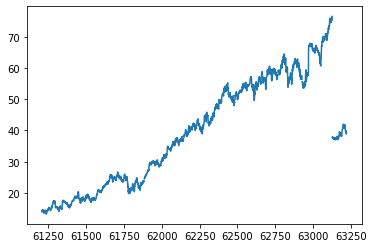

In [54]:
gvkey_frame['price_close'].plot();

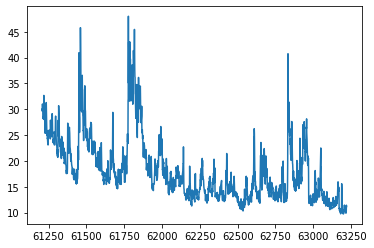

In [55]:
gvkey_frame['cboe_vix'].plot();

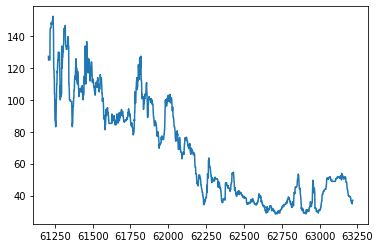

In [56]:
gvkey_frame['market_cds_spread'].plot();

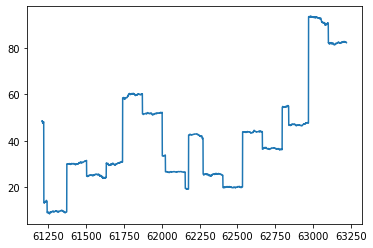

In [57]:
gvkey_frame['pecds'].plot();

In [6]:

gvkey_selection = 179700
gvkey_frame = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
stock_close = gvkey_frame['price_close'].pct_change().dropna()
vix = gvkey_frame['cboe_vix']
#vix = gvkey_frame['cboe_vix'].pct_change().dropna()

#[1:] == skip the first data point to align the series' lengths
gvkey_frame_4 = pd.DataFrame(data=(cds[1:], pecds[1:], vix[1:], stock_close)).T

var_model_4 = smt.VAR(gvkey_frame_4)  #add make lags here? 

res_model_4 = var_model_4.fit(maxlags=var_model_4.select_order(maxlags=5).bic)

#print(res_model_4)
print("max lags:", var_model_4.select_order(maxlags=5).bic,'\n')
print(res_model_4.summary())

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


max lags: 1 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Mar, 2021
Time:                     11:22:29
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -8.62321
Nobs:                     1496.00    HQIC:                  -8.66775
Log likelihood:          -1967.66    FPE:                0.000167554
AIC:                     -8.69420    Det(Omega_mle):     0.000165333
--------------------------------------------------------------------
Results for equation market_cds_spread
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        3.562884         0.665994            5.350           0.000
L1.market_cds_spread         0.984668         0.002856          344.775           0.000
L1.pec

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [32]:
see(res_model_4)

C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: ys_lagged is a deprecated alias for endog_lagged, will be removed in version 0.11.0
  obj = getattr(results, attr)


    <                    <=                   ==                   !=                   >                    >=
    dir()                hash()               help()               repr()               str()                .acf()
    .acorr()             .aic                 .bic                 .bse                 .coefs               .coefs_exog
    .cov_params()        .cov_ybar()          .dates               .detomega            .df_model            .df_resid
    .endog               .endog_lagged        .exog                .exog_names          .fevd()
    .fittedvalues        .forecast()          .forecast_cov()      .forecast_interval()                      .fpe
    .get_eq_index()      .hqic                .info_criteria       .intercept           .intercept_longrun()
    .irf()               .irf_errband_mc()    .irf_resim()         .is_stable()         .k_ar                .k_exog
    .k_exog_user         .k_trend             .llf                 .long_run_effects()          

In [59]:
res_model_4.fittedvalues

,market_cds_spread,pecds,cboe_vix,price_close
61210,124.330782,48.089559,29.344929,0.001799
61211,125.192516,48.208418,30.651711,0.002218
61212,124.705711,48.214727,29.863066,0.001949
61213,125.279386,47.392521,29.327056,0.002044
61214,124.727570,47.426432,29.474316,0.001917
...,...,...,...,...
63216,35.382537,82.528837,10.302455,-0.001511
63217,34.708469,82.556565,10.187803,-0.001575
63218,36.594910,82.352414,11.292898,-0.001359
63219,36.228923,82.358162,10.322433,-0.001607


In [60]:
stats.spearmanr(res_model_4.fittedvalues['market_cds_spread'], 
               res_model_4.fittedvalues['cboe_vix'])

SpearmanrResult(correlation=0.6932140504162507, pvalue=4.7488423241510115e-288)

In [61]:
stats.spearmanr(res_model_4.fittedvalues['price_close'], 
               res_model_4.fittedvalues['cboe_vix'])

SpearmanrResult(correlation=0.8714143838808514, pvalue=0.0)

In [63]:
stats.spearmanr(res_model_4.fittedvalues['market_cds_spread'], 
               res_model_4.fittedvalues['pecds'])

SpearmanrResult(correlation=-0.3018006996946012, pvalue=1.275893184148054e-43)

In [64]:
stats.spearmanr(gvkey_frame['market_cds_spread'], 
               gvkey_frame['pecds'])

SpearmanrResult(correlation=-0.3001219987063655, pvalue=3.5621695972330943e-43)

In [65]:
stats.spearmanr(res_model_4.fittedvalues['cboe_vix'], 
               res_model_4.fittedvalues['pecds'])

SpearmanrResult(correlation=-0.17127850913327045, pvalue=1.0481067920092417e-14)

In [66]:
res_model_4.test_causality(caused='market_cds_spread', causing='pecds').summary()

Test statistic,Critical value,p-value,df
0.4672,3.843,0.494,"(1, 8024)"


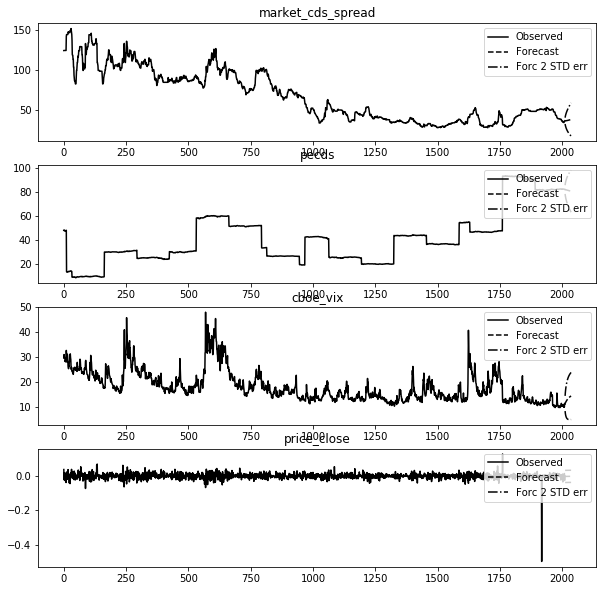

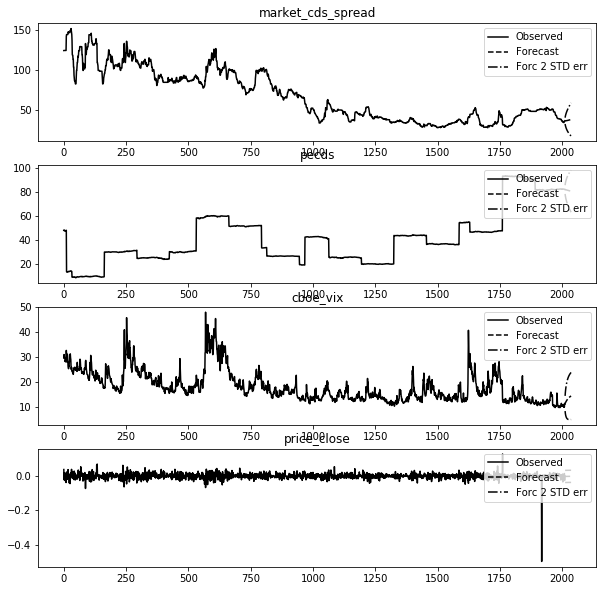

In [67]:
res_model_4.plot_forecast(steps=25)

In [ ]:
#NEED TO ADD DIVIDEND BACK 

#PG 14 of 81 in LEE & ETAL:
#try model-adjusted stock returns: >?



In [ ]:
#VAR model 

df_gvkey_150937 = df_basis_coupons_month.loc[df_basis_coupons_month.gvkey==150937.0]

#specify individual series
cds_150937 = df_gvkey_150937['market_cds_spread']
pecds_150937 = df_gvkey_150937['pecds']      

#alternatively, some methods require that a DF be used to maintain column labels/references
gvkey_150937_solved = pd.DataFrame(data=(cds_150937, pecds_150937)).T

#VAR_MODEL: GVKEY==2136
var_model_gvkey_150937 = smt.VAR(gvkey_150937_solved)
res_model_gvkey_150937 = var_model_gvkey_150937.fit(maxlags=var_model_gvkey_150937.select_order(maxlags=5).bic)
print("max_lags:", var_model_gvkey_150937.select_order().bic)
print(res_model_gvkey_150937.summary())

In [ ]:
## 10.01.21 key cuts:

## experimentaiton with using just one .diff() series 
## has largely, not worked. 

#https://stackoverflow.com/questions/27309243/python-statsmodels-arima-linalgerror-svd-did-not-converge

In [30]:
gvkey_1045 = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==1045]

gvkey_frame = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==174729]

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']

cds = cds.diff().dropna()
pecds = pecds.diff().dropna()

gvkey_frame_df4 = pd.DataFrame(data=(cds, pecds)).T

var_model_4 = smt.VAR(gvkey_frame_df4)  #add make lags here? 

res_model_4 = var_model_4.fit(maxlags=var_model_4.select_order(maxlags=5).bic)

print("max lags:", var_model_4.select_order(maxlags=5).bic,'\n')
print(res_model_4.summary())

max lags: 0 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Mar, 2021
Time:                     11:44:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.14270
Nobs:                     250.000    HQIC:                   3.12587
Log likelihood:          -1096.79    FPE:                    22.5228
AIC:                      3.11453    Det(Omega_mle):         22.3437
--------------------------------------------------------------------
Results for equation market_cds_spread
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.865760         0.942461           -0.919           0.358

Results for equation pecds
           coefficient       std. error           t-stat            prob
--------------------------------------

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [ ]:
gvkey_frame = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==1045]

cds = gvkey_frame['market_cds_spread']
#cds = cds.diff().dropna()

pecds = gvkey_frame['pecds']
#pecds = pecds.diff().dropna()

gvkey_frame_df4 = pd.DataFrame(data=(cds, pecds)).T

var_model_4 = smt.VAR(gvkey_frame_df4)  #add make lags here? 

res_model_4 = var_model_4.fit(maxlags=var_model_4.select_order(maxlags=5).bic)

print("max lags:", var_model_4.select_order(maxlags=5).bic,'\n')
print(res_model_4.summary())

In [ ]:
https://stackoverflow.com/questions/21827594/raise-linalgerrorsvd-did-not-converge-linalgerror-svd-did-not-converge-in-m
    
however, if one of the columns in ori_data has always the same value, the data will get Nans, since the implementation of PCA in mlab normalizes the input data by doing

ori_data = (ori_data - mean(ori_data)) / std(ori_data).
The solution is to do:

result = PCA(ori_data, standardize=False)    

In [ ]:
res_causality_cds.summary()
#fail to reject = (bonds) does not GC (cds)
#reject == (bonds) does GC (CDS)

In [ ]:
print(res_causality_bond.h0)
print(res_causality_bond.conclusion)
print(res_causality_bond.conclusion_str)
print(res_causality_bond.df)
print(res_causality_bond.method)
print(res_causality_bond.pvalue)
print(res_causality_bond.signif_str)
print(res_causality_bond.test)
print(res_causality_bond.test_statistic)
print(res_causality_bond.crit_value)

In [ ]:
#### OLD FORMAT: (OLD VAR MOD LOOP?)
#OLD FORMAT (daily?)

var_constantissue_gvkeys = []
cds_resc_ts = []
cds_resc_cv = []
cds_signif = []
bond_signif = []
cds_resc_pval = []
cds_resc_concl = []
bond_resc_ts = []
bond_resc_cv = []
bond_resc_pval = []
bond_resc_concl = []
gvkey_list = []
type_tracker = []

#make a small loop?
for i, val in enumerate(df_no_coint_fulldata.groupby('gvkey')):  #unit root but no cointegration!
    #print("i=", i)
    #print("VAL ------------ VAL:", val[0])
    
    #create the GVKEY list from the groupby object, to later affix as the DF's index
    gvkey = val[0]; data = val[1]
    gvkey_list.append(gvkey)   
    type_tracker.append("GCT_indifferences")

    #load the data to create the model for each GVKEY/LOOP (take the first difference of each series)
    cds = data.market_cds_spread
    cds = cds.diff().dropna()
    pecds = data.pecds
    pecds = pecds.diff().dropna()
    #data = np.column_stack((cds, pecds))
    data = pd.DataFrame(data=(cds, pecds)).T

    #VAR_MODEL: GVKEYS (stat)
    try:
        model = smt.VAR(data)
        
        max_lags_bic = model.select_order(maxlags=5).bic
        if max_lags_bic <= 0:
            max_lags_bic = 1
            
        res = model.fit(maxlags=max_lags_bic)
        
        res_causality_cds = res.test_causality(causing=['pecds'], 
                                      caused=['market_cds_spread'], kind='wald', signif=0.05)
        
        cds_rs_ts = np.round(res_causality_cds.test_statistic, 4)
        cds_rs_cv = np.round(res_causality_cds.crit_value, 4)
        cds_rs_pval = np.round(res_causality_cds.pvalue, 4)
        cds_rs_con = res_causality_cds.conclusion
        
        if cds_rs_ts > cds_rs_cv:
            cds_signif.append("**")
        else: 
            cds_signif.append("  ")
        
        cds_resc_ts.append(cds_rs_ts)
        cds_resc_cv.append(cds_rs_cv)
        cds_resc_pval.append(cds_rs_pval)
        cds_resc_concl.append(cds_rs_con)
        
        res_causality_bond = res.test_causality(causing=['market_cds_spread'], 
                                      caused=['pecds'], kind='wald', signif=0.05)

        bond_rs_ts = np.round(res_causality_bond.test_statistic, 4)
        bond_rs_cv = np.round(res_causality_bond.crit_value, 4)
        bond_rs_pval = np.round(res_causality_bond.pvalue, 4)
        bond_rs_con = res_causality_bond.conclusion
        
        if bond_rs_ts > bond_rs_cv:
            bond_signif.append("**")    
        else:
            bond_signif.append("  ")

        bond_resc_ts.append(bond_rs_ts)
        bond_resc_cv.append(bond_rs_cv)
        bond_resc_pval.append(bond_rs_pval)
        bond_resc_concl.append(bond_rs_con)

    except ValueError as ve:
        #res = model.fit(maxlags=10, method='ols',ic=None, trend='nc')
        #var_constantissue_gvkeys.append(gvkey)
        print("ValueError: {} ".format(i, ve))
        pass
        #pass
    except np.linalg.LinAlgError as lae: 
        #var_linalg_issue_gvkeys.append(gvkey)
        print("np.linalg.LinAlgError: {} ".format(i, lae), "gvkey: {}".format(gvkey))
        pass
        #print("LinAlgError: {} ".format(lae))
        
    except RuntimeError as re:
        print("RuneTimeError: {}".format(i, re), "gvkey: {}".format(gvkey))
    #    pass
        #pass
    
    #print("max_lags:", var_model_1300.select_order().bic)
    #print(res_model_1300.summary())

cds_sig = ["{}{}".format(cds_resc_ts, cds_signif) for cds_resc_ts, cds_signif in zip(cds_resc_ts, cds_signif)]
bond_sig = ["{}{}".format(bond_resc_ts, bond_signif) for bond_resc_ts, bond_signif in zip(bond_resc_ts, bond_signif)]
#stat_test_strcomp_2 = ["{}{}".format(i, five_pnt_cv) for i in np.round(stat_test_strcomp,4)]    
    

granger_causality_nonstat__noce_df = pd.DataFrame(data=(gvkey_list, cds_sig, cds_resc_pval, cds_resc_concl,
                                         bond_sig, bond_resc_pval, bond_resc_concl, type_tracker)).T

granger_causality_nonstat__noce_df.columns = ['gvkey','cds_testval','cds_pval','cds_conclusion',
                                           'bond_testval', 'bond_pval','bond_conclusion', 'type_tracker']
              
print(res_causality_bond.crit_value)

In [ ]:
#finding location of nan(s):
## 

index = total_alldata_df_final['price_sales'].index[total_alldata_df_final['price_sales'].apply(np.isnan)]

## ORIGINAL BASE VECM 

In [38]:
#Original VECM base: CDS/PECDS

gvkey_selection = 1408
gvkey_frame = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]
#coint_rels = 0

print("VECM MODEL OF GVKEY: " + str(gvkey_selection))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
cboe_vix = gvkey_frame['cboe_vix']
vecm_data_base = pd.DataFrame(data=(cds, pecds)).T

vecm_data_base = vecm_data_base[(vecm_data_base.index <= np.percentile(vecm_data_base.index, 75))]

vecm_model_base = vecm.select_order(vecm_data_base, maxlags=5)
optimal_lag_length_base = vecm_model_base.bic
    
vecm_cointeg_rank_base = vecm.select_coint_rank(vecm_data_base, 
                                                det_order =1, 
                                                k_ar_diff = optimal_lag_length_base, 
                                                method='trace', 
                                                signif=0.05)

if vecm_cointeg_rank_base.rank >= 1:
    coint_rels_base = 1
else:
    print("insufficient number of cointegrating relationships for VECM model")
    
vecm_base = vecm.VECM(vecm_data_base, 
                      k_ar_diff=vecm_model_base.bic, 
                      coint_rank=coint_rels_base, 

                      deterministic='co')

vecm_base_res = vecm_base.fit()
print(vecm_base_res.summary())




print('\n', vecm_base_res.test_granger_causality(caused=0).summary(), '\n', '--'*25, '\n', 
     vecm_base_res.test_granger_causality(caused=1).summary())

VECM MODEL OF GVKEY: 1408
insufficient number of cointegrating relationships for VECM model
Det. terms outside the coint. relation & lagged endog. parameters for equation market_cds_spread
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.5179      0.604      2.512      0.012       0.334       2.702
L1.market_cds_spread     0.2742      0.031      8.982      0.000       0.214       0.334
L1.pecds                 0.0510      0.030      1.672      0.095      -0.009       0.111
L2.market_cds_spread    -0.0145      0.032     -0.457      0.648      -0.077       0.048
L2.pecds                 0.0149      0.031      0.487      0.626      -0.045       0.075
L3.market_cds_spread     0.0016      0.031      0.052      0.959      -0.058       0.062
L3.pecds                 0.0150      0.030      0.492      0.623      -0.045       0.075
  Det. ter

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [29]:
cholesky_decomp = np.linalg.cholesky(vecm_base_res.sigma_u)
sig_1 = cholesky_decomp[0, 0]
sig_12 = cholesky_decomp[1, 0]
sig_2 = cholesky_decomp[1, 1]

x_1 = vecm_base_res.alpha[0,0]
x_2 = vecm_base_res.alpha[1,0]

gg_val = np.round(vecm_base_res.alpha[1,0] / vecm_base_res.alpha[1,0] - vecm_base_res.pvalues_alpha[0,0], 2)

HAS_1 = np.round(( x_2**2 * (sig_1**2 - sig_12**2 / sig_2**2) )  / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 ),4)
HAS_2 = np.round(( (x_2 * sig_1 - x_1 * sig_12 / sig_1)**2 ) / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 ),4)
HAS_mid = np.round((HAS_2 + HAS_1) / 2,4)

print(tabulate([['GG VALUE', gg_val],
       ['HAS LOWER', HAS_1],
       ['HAS MID', HAS_mid],
       ['HAS UPPER', HAS_2]],
       headers=[color.BOLD + 'PRICE DISCOVERY', 'VALUE' + color.END], tablefmt='pretty', numalign='center'),
     '\n', color.GREEN, "[ VALUES > 0.5 FAVOUR CDS |&| VALUES < 0.5 FAVOUR BONDS ]", color.END)

+-----------------+--------+
| PRICE DISCOVERY | VALUE  |
+-----------------+--------+
|    GG VALUE     |  1.0   |
|    HAS LOWER    | 0.0131 |
|     HAS MID     | 0.0198 |
|    HAS UPPER    | 0.0265 |
+-----------------+--------+ 
  [ VALUES > 0.5 FAVOUR CDS |&| VALUES < 0.5 FAVOUR BONDS ] 


In [22]:
cholesky_decomp = np.linalg.cholesky(vecm_base_res.sigma_u)
sig_1 = cholesky_decomp[0, 0]
sig_12 = cholesky_decomp[1, 0]
sig_2 = cholesky_decomp[1, 1]

x_1 = vecm_base_res.alpha[0,0]
x_2 = vecm_base_res.alpha[1,0]

gg_val = np.round(vecm_base_res.alpha[1,0] / vecm_base_res.alpha[1,0] - vecm_base_res.pvalues_alpha[0,0], 2)

HAS_1 = np.round(( x_2**2 * (sig_1**2 - sig_12**2 / sig_2**2) )  / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 ),4)
HAS_2 = np.round(( (x_2 * sig_1 - x_1 * sig_12 / sig_1)**2 ) / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 ),4)
HAS_mid = np.round((HAS_2 + HAS_1) / 2,4)

print(tabulate([['GG VALUE', gg_val],
       ['HAS LOWER', HAS_1],
       ['HAS MID', HAS_mid],
       ['HAS UPPER', HAS_2]],
       headers=[color.BOLD + 'PRICE DISCOVERY', 'VALUE' + color.END], tablefmt='pretty', numalign='center'),
     '\n', color.GREEN, "[ VALUES > 0.5 FAVOUR CDS |&| VALUES < 0.5 FAVOUR BONDS ]", color.END)

+-----------------+--------+
| PRICE DISCOVERY | VALUE  |
+-----------------+--------+
|    GG VALUE     |  1.0   |
|    HAS LOWER    | 0.1132 |
|     HAS MID     | 0.1291 |
|    HAS UPPER    | 0.145  |
+-----------------+--------+ 
  [ VALUES > 0.5 FAVOUR CDS |&| VALUES < 0.5 FAVOUR BONDS ] 


In [8]:
see(vecm_base_res)

    <                      <=                     ==                     !=                     >
    >=                     dir()                  hash()                 help()                 repr()
    str()                  .alpha                 .beta                  .coint_rank            .conf_int_alpha()
    .conf_int_beta()       .conf_int_det_coef()                          .conf_int_det_coef_coint()
    .conf_int_gamma()      .const                 .const_coint           .cov_params_default    .cov_params_wo_det
    .cov_var_repr          .dates                 .det_coef              .det_coef_coint        .deterministic
    .exog                  .exog_coefs            .exog_coint            .exog_coint_coefs      .first_season
    .fittedvalues          .gamma                 .irf()                 .k_ar                  .lin_trend
    .lin_trend_coint       .llf                   .ma_rep()              .model                 .names
    .neqs                  .nobs       

    ismethod     isroutine    ()           <            <=           ==           !=           >            >=
    dir()        hash()       help()       repr()       str()

In [36]:
#vecm_base_res.predict(steps=5,
#                     exog_fc = )

ValueError: exog_fc is None: Please pass the future values of the VECM's exog terms via the exog_fc argument!

In [40]:
len(vecm_data_base)

1114

In [42]:
len(cboe_vix)

1485

In [43]:
1114 * 1.25

1392.5

In [46]:
np.floor(1114 * 1/0.75)

1485.0

In [45]:
1114 * 1/0.75

1485.3333333333333

In [47]:
0.25 * 1485

371.25

In [ ]:
0.25 * len(vecm_data_base)

In [48]:
vecm_base_res.predict(371)

array([[ 53.14425548, 256.03515318],
       [ 52.84894483, 256.01263156],
       [ 52.54020623, 256.07780892],
       [ 52.23452118, 256.19644708],
       [ 51.93386174, 256.26476019],
       [ 51.63649431, 256.36772129],
       [ 51.34401449, 256.49089969],
       [ 51.05571634, 256.595998  ],
       [ 50.77053775, 256.71469107],
       [ 50.48893315, 256.84122373],
       [ 50.21057367, 256.96153964],
       [ 49.93503422, 257.08746076],
       [ 49.66245738, 257.21670495],
       [ 49.39269303, 257.34411251],
       [ 49.12556063, 257.47409079],
       [ 48.86108983, 257.60573456],
       [ 48.59920048, 257.73714637],
       [ 48.33980309, 257.86996482],
       [ 48.08288615, 258.00382829],
       [ 47.82839715, 258.13803525],
       [ 47.57628105, 258.27319083],
       [ 47.32651193, 258.40914742],
       [ 47.07904876, 258.5456419 ],
       [ 46.83385013, 258.68289392],
       [ 46.59088568, 258.82084001],
       [ 46.35011969, 258.95937788],
       [ 46.11151666, 259.09858359],
 

In [13]:
vecm_base_res.predict(50)

array([[ 38.10729363, 250.77101034],
       [ 38.17153226, 250.8853358 ],
       [ 38.24593142, 251.09764249],
       [ 38.32004372, 251.23837287],
       [ 38.39302202, 251.40292343],
       [ 38.46700775, 251.5928017 ],
       [ 38.53922454, 251.76251131],
       [ 38.6095354 , 251.93844097],
       [ 38.67860931, 252.12056133],
       [ 38.74573218, 252.29667573],
       [ 38.81090668, 252.47408286],
       [ 38.87433583, 252.65265512],
       [ 38.93584665, 252.82912862],
       [ 38.99546426, 253.00552481],
       [ 39.05326373, 253.18178109],
       [ 39.10921802, 253.35702938],
       [ 39.16335471, 253.53183368],
       [ 39.21571353, 253.70617395],
       [ 39.26630635, 253.87982407],
       [ 39.31515983, 254.05294566],
       [ 39.36230341, 254.22553685],
       [ 39.40775865, 254.39754318],
       [ 39.451551  , 254.5690151 ],
       [ 39.49370626, 254.73995725],
       [ 39.53424787, 254.91036089],
       [ 39.57320005, 255.08024555],
       [ 39.61058687, 255.24961791],
 

In [15]:
vecm_base_res.y_all

array([[ 79.1       ,  82.41      ,  82.41      , ...,  37.57      ,
         38.1       ,  38.07      ],
       [ 32.81682147,  32.89223996,  33.10347263, ..., 250.41639251,
        250.48606532, 250.75011808]])

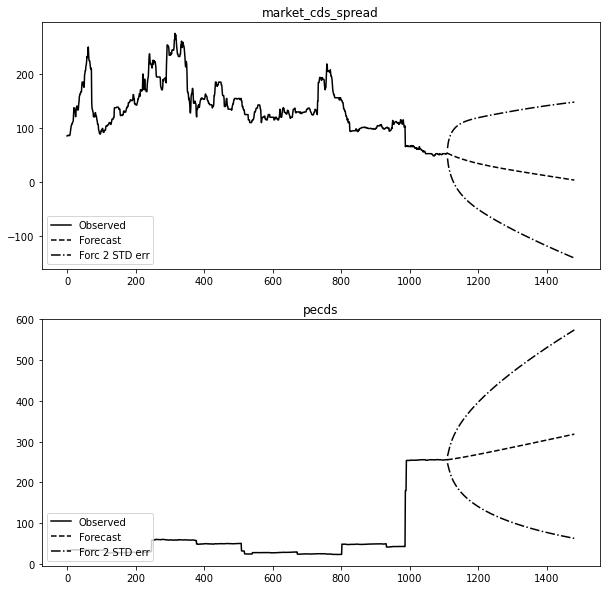

In [49]:
vecm_base_res.plot_forecast(steps=371)

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


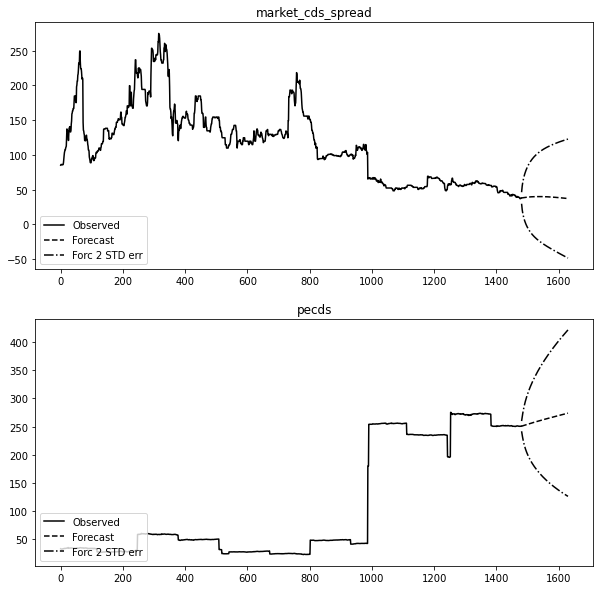

In [11]:
vecm_base_res.plot_forecast(steps=150)

In [ ]:
## TRY ## 

from sklearn.metrics import mean_squared_error



In [30]:
vecm_data_base.y_lag1

AttributeError: 'DataFrame' object has no attribute 'y_lag1'

In [12]:
vecm_base_res.y_all

array([[ 79.1       ,  82.41      ,  82.41      , ...,  37.57      ,
         38.1       ,  38.07      ],
       [ 32.81682147,  32.89223996,  33.10347263, ..., 250.41639251,
        250.48606532, 250.75011808]])

In [26]:
vecm_base_res.fittedvalues

array([[ 83.62253106,  33.20511575],
       [ 86.48631579,  33.92691665],
       [ 86.99221166,  33.58661279],
       ...,
       [ 37.14803927, 250.99214083],
       [ 37.74435538, 250.56909999],
       [ 38.29171538, 250.70728193]])

In [28]:
vecm_data_base.tail()

,market_cds_spread,pecds
11494,37.06,250.486065
11495,37.07,250.739735
11496,37.57,250.416393
11497,38.10,250.486065
11498,38.07,250.750118


In [ ]:
#VECM of base + VIX: CDS/PECDS
#with automated coint rels calculation

gvkey_number = 1408
gvkey_frame = gvkey_1408
#coint_rels = 0

print("VECM MODEL + VIX OF GVKEY: " + str(gvkey_number))

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
vix = gvkey_frame['cboe_vix']
vecm_data_vix = pd.DataFrame(data=(cds, pecds, vix)).T

vecm_model_vix = vecm.select_order(vecm_data_vix, maxlags=5)
optimal_lag_length_vix = vecm_model_vix.bic
    
vecm_cointeg_rank_vix = vecm.select_coint_rank(vecm_data_vix, det_order =1, k_ar_diff = optimal_lag_length_vix, 
                                                  method='trace', signif=0.05)

#if vecm_cointeg_rank_vix.rank >= 1:
#    coint_rels_vix = 1
#else:
#    print("insufficient number of cointegrating relationships for VECM model")
    
vecm_vix_2 = vecm.VECM(vecm_data_vix, k_ar_diff=vecm_model_vix.bic, coint_rank=vecm_cointeg_rank_vix.rank, deterministic='cili')
vecm_vix_res_2 = vecm_vix_2.fit()
print(vecm_vix_res_2.summary())



vecm_vix_res_2.test_granger_causality(causing='cboe_vix', caused='market_cds_spread').summary()

## PROBLEM GVKEYS SECTION

In [ ]:
za_problem_df
#all have nearly == 0 STD DEV

In [ ]:
#what is the distribution of sectors in the total DF? 

#sorted_alldata_df_final_adf_results.groupby(['year_index','sector']).median()['cds_bond_basis'].unstack()
sorted_alldata_df_final_adf_results.groupby(['year_index','sector']).mean()['market_cds_spread'].unstack()

In [ ]:
#try: 
basis_stats_yearind = np.round(df_basis_coupons_month.groupby('year_index').agg({'cds_bond_basis':['mean','median','std']}),2)

In [ ]:
#ERROR:
sorted_alldata_df_final_adf_results.groupby(['year_index','sector']).std()['market_cds_spread'].unstack()

#cant call sqrt method:

In [ ]:


#change names: (see code below + take the np.round from here)
df_agg_year_yax_sector_xax_median_basis = np.round(df_agg_sector_year.groupby(['year_index','sector']).median()['cds_bond_basis'].unstack(),2)

In [ ]:
sorted_alldata_df_final.groupby(['sector','gvkey']).size()

In [ ]:
#check earlier code for improvement (firm size by sector? )
sorted_alldata_df_final.groupby(['sector']).size()

In [ ]:
sorted_alldata_df_final.loc[sorted_alldata_df_final.gvkey==5862]['market_cds_spread'].std()

In [ ]:
sorted_alldata_df_final.groupby('gvkey').size()

## Optimal Lengths (AIC/BIC) in VECM framework loop(s)

In [ ]:
## ORIGINAL ##

#34.2 seconds: / 28S with altered list initialiser 
#gvkey_list, aic_list, bic_list = ([] for i in range(3))

In [ ]:
%%time

#gvkey_list = []
#aic_list = []
#bic_list = []
value_errors_model_order = 0
#gvkey_list, aic_list, bic_list = ([], )*3
gvkey_list, aic_list, bic_list = ([] for i in range(3))

for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]  
    gvkey_list.append(gvkey)          

    ## load the data to create the model for each GVKEY/LOOP
    cds = data.market_cds_spread
    pecds = data.pecds
    gvkey_frame_model_order = pd.DataFrame(data=(cds, pecds)).T

    try:
        
        ## generate model
        vecm_model_order = vecm.select_order(gvkey_frame_model_order, maxlags=10)

        aic_list.append(vecm_model_order.aic)
        bic_list.append(vecm_model_order.bic)
        
    except ValueError as ve:
        aic_list.append(np.nan)
        bic_list.append(np.nan)
        value_errors_model_order += 1
    
vecm_model_orders_df = pd.DataFrame(data=(gvkey_list, aic_list, bic_list)).T

vecm_model_orders_df.columns = ['gvkey','aic_lags','bic_lags']

print(" GVKEY ERRORS: {}".format(value_errors_model_order),'\n',
     "Successful Model Order Regressions: {}".format(len(gvkey_list) - value_errors_model_order), '\n', "--"*25, '\n')

In [ ]:
## using collections.defaultdict

#14.8S

In [ ]:
%%time

## generate the dictionary and an error counter
value_errors_model_order = 0
vecm_model_orders_dict = collections.defaultdict(list)

## create the loop in the groupby framework:
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]  
    vecm_model_orders_dict['gvkey'].append(gvkey)          

    ## load the data to create the model for each GVKEY/LOOP
    cds = data.market_cds_spread
    pecds = data.pecds
    gvkey_frame_model_order = np.column_stack((cds, pecds)) 

    #### Model Loop #### 
    try:
        # generate model instance
        vecm_model_order = vecm.select_order(gvkey_frame_model_order, maxlags=10)

        # append lengths according to the different model selection criteria to dict
        vecm_model_orders_dict['aic'].append(vecm_model_order.aic)
        vecm_model_orders_dict['bic'].append(vecm_model_order.bic)
        
    except ValueError as ve:
        vecm_model_orders_dict['aic'].append(np.nan)
        vecm_model_orders_dict['bic'].append(np.nan)
        value_errors_model_order += 1

## create the DF from the dictionary        
vecm_mod_orders_df_fromdict = pd.DataFrame.from_dict(vecm_model_orders_dict)

## print some information about this loop and its outcomes:
print(" GVKEY ERRORS: {}".format(value_errors_model_order),'\n',
     "Successful Model Order Regressions: {}".format(len(
         sorted_alldata_df_final_adf_results.groupby('gvkey')['gvkey'].unique()) - value_errors_model_order), '\n', "--"*25, '\n')


## attempts to clean up the error terms .append() functionality: 
* Thus far (23.01.2021) Failed: 

In [ ]:
X = [1, 2, 3, 4, 5]
Y = []
Z = []; M=[]; T=[]

my_list = [Y, Z, M, T]
appenders=range(4)
for x, lst in zip(appenders, my_list):
    lst.append(np.nan)
    
    #works

In [ ]:
## DOES NOT WORK ##

model_ve_errors_list = [vecm_model_orders_dict['aic'], vecm_model_orders_dict['bic']]
model_ve_error_range = range(2)

my_list = [Y, Z, M, T]
appenders=range(4)
for x, lst in zip(appenders, my_list):
    lst.append(np.nan)

### ORIGINAL LISTS-BASED ADF LOOP


In [ ]:
## wall time == 18.3s 

In [ ]:
%%time
## OG METHOD
#initialise a few lists to append data to from each GVKEY's loop

gvkey_list = []                       #holds the GVKEY
sector_list = []                      #append the sector for each GVKEY (just saves having to re-merge on again later)
optimal_lag_list = []                 #holds the optimal number of lags selected by the BIC
first_date_obs = []                   #holds the first date observation per GVKEY
last_date_obs = []                    #holds the last date observation per GVKEY
time_horizon = []                     #holds the difference between the first and last date observations

#holds the series' test statistics (CDS, Bond, VIX)
stationarity_ts_cds = []              
stationarity_ts_bond = []             
stationarity_ts_vix = []

#holds the p-value for the test statistic 
stationarity_pvalue_cds = []          
stationarity_pvalue_bond = []         
stationarity_pvalue_vix = []

#will hold the supplementary list that will merge the test statistic with it's significance level
#E.G. the significance level (*, **, ***) for levels 10%, 5%, 1% respectively; this is for the latex publication tables
stationarity_test_res_cds = []        
stationarity_test_res_bond = []
stationarity_test_res_vix = []

stat_test_joint = []                                #will hold the outcome (CDS+BONDS) for the joint unit-root test outcome
problematic_gvkey = []                              #seperately log GVKEYs which encounter errors
linalg_errors = 0; value_errors = 0                 #simple counters for logging the number of errors occured, by group

#THE ADF CRITICAL VALUES for 1%, 5%, 10%:
one_percent_cv = -3.43472   
five_percent_cv = -2.86347 
ten_percent_cv = -2.56779
adf_automated_lag_cds = []; adf_automated_lag_bond = []

#create loop to test for stationarity in each GVKEY's data group: was (#sorted_alldata_df_final)
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]                        #assign the remainder of the data to be callable from data.(variable)
    gvkey_list.append(gvkey)             #append the GVKEY to a list, which keeps the data stored under the appropriate key
    sector_string = data.sector
    sector_list.append(sector_string.iloc[0])      #append the respective sector for that GVKEY
    
    #compute the specifics of each GVKEY's date / time horizon
    first_date_obs.append(data.trade_date.min())
    last_date_obs.append(data.trade_date.max())
    time_difference = data.trade_date.max() - data.trade_date.min()
    time_horizon.append(time_difference.days)               #append just the .days aspect of the timedelta variable
    
    #define the appropriate series for the ADF test: 
    cds = data.market_cds_spread         
    pecds = data.pecds
    vix = data.cboe_vix
    
    #the VAR model package requires the data be structured in a particular way; np.column stack is the fastest method
    data = np.column_stack((cds, pecds)) 
    
    #the VAR model construction is necessary for computing the BIC
    model = smt.VAR(data)  

    #compute the optimised BIC value from [model] which holds the vector autoregression model per GVKEY
    try:
        #for daily data, a maximum lag length is imposed (5 trading days, roughly equivalent to one trading week)
        bic_selected_lag = model.select_order(maxlags=10).bic 
        optimal_lag_list.append(bic_selected_lag)                  #store the optimised BIC result per GVKEY
        
        #ADF test - plugging in the bic selected lag length to run a unique length ADF test per GVKEY, per instrument
        test_ADF_cds = ADF(cds, trend='c', max_lags=10, method='BIC') 
        adf_automated_lag_cds.append(test_ADF_cds.lags)
        
        test_ADF_bond = ADF(pecds, trend='c',  max_lags=10, method='BIC')  
        adf_automated_lag_bond.append(test_ADF_bond.lags)
        
        test_ADF_vix = ADF(vix, trend='c',  max_lags=10, method='BIC')

        
        #store the test statistic & p-value for each instrument's ADF test result, for each GVKEY (rounded to 4 decimals)
        stationarity_ts_cds.append(np.round(test_ADF_cds.stat,4))    
        stationarity_ts_bond.append(np.round(test_ADF_bond.stat,4))     
        stationarity_ts_vix.append(np.round(test_ADF_vix.stat,4))
        
        stationarity_pvalue_cds.append(np.round(test_ADF_cds.pvalue,4))    
        stationarity_pvalue_bond.append(np.round(test_ADF_bond.pvalue,4))
        stationarity_pvalue_vix.append(np.round(test_ADF_vix.pvalue,4))
        
        ##OPTIONAL
        #this part reads the test stat per GVKEY / instrument and assigns the appropriate (*) per its significance level
        #E.G. > 99% significance is commonly denoted as [test_statistic]*** in publication regression tables
        
        #CDS ADF LATEX TABLE CONSTRUCTION
        if test_ADF_cds.stat < one_percent_cv:
            stationarity_test_res_cds.append("***")   
        elif test_ADF_cds.stat < five_percent_cv:
            stationarity_test_res_cds.append("**")    ## The 1% & 5% significance would reject H0
        elif test_ADF_cds.stat < ten_percent_cv:
            stationarity_test_res_cds.append("*")     ## The 10% and no level would fail to reject H0
        else: 
            stationarity_test_res_cds.append(" ")  

        #repeat for BONDS:
        if test_ADF_bond.stat < one_percent_cv:
            stationarity_test_res_bond.append("***")
        elif test_ADF_bond.stat < five_percent_cv:
            stationarity_test_res_bond.append("**")   ## The 1% & 5% significance would reject H0
        elif test_ADF_bond.stat < ten_percent_cv:
            stationarity_test_res_bond.append("*")    ## The 10% and no level would fail to reject H0
        else: 
            stationarity_test_res_bond.append(" ")
            
            
        #VIX ADF LATEX TABLE CONSTRUCTION
        if test_ADF_vix.stat < one_percent_cv:
            stationarity_test_res_vix.append("***")   
        elif test_ADF_vix.stat < five_percent_cv:
            stationarity_test_res_vix.append("**")    ## The 1% & 5% significance would reject H0
        elif test_ADF_vix.stat < ten_percent_cv:
            stationarity_test_res_vix.append("*")     ## The 10% and no level would fail to reject H0
        else: 
            stationarity_test_res_vix.append(" ")  
                    
        
        #ensure that both series are integrated of the same order: a jointly unit-root system is required for VECM models
        if (test_ADF_bond.stat > five_percent_cv and test_ADF_cds.stat > five_percent_cv):  
            #this is > as to "not reject" the H0 is unit root; while reject the null would imply a stationary series
            stat_test_joint.append("BOND/CDS Both Have Unit Root")
            #stat_boolean.append(int(1))
        elif (test_ADF_bond.stat > five_percent_cv and test_ADF_cds.stat < five_percent_cv):
            stat_test_joint.append("BOND ONLY HAS UR")
        elif (test_ADF_bond.stat < five_percent_cv and test_ADF_cds.stat > five_percent_cv):
            stat_test_joint.append("CDS ONLY HAS UR")            
        else: 
            stat_test_joint.append("Cannot Reject H0")
            #stat_boolean.append(int(2))
        
    # A linear-algebra error could be caused by market factors which have created highly erratic basis behaviour
    # This could be caused by a firm nearing bankruptcy where its basis deviates excessively far from par
    #accordingly, the leading minor of the array is not positive definite is akin to taking the square root of a negative number
    except np.linalg.LinAlgError as lae:
        problematic_gvkey.append(gvkey)                                 #append problem GVKEY to seperate list
        print("LinAlgError: Row: {}, Reason : {} ".format(i, lae), '\n', "GVKEY: ({})".format(gvkey), 
              "SECTOR: ", sector_string.iloc[0])
      
        #append items to maintain placement in main DF \\ 
        #where the errors occur, fill with NaN values instead
        optimal_lag_list.append(np.nan)
        adf_automated_lag_cds.append(np.nan)
        adf_automated_lag_bond.append(np.nan)
        stat_test_joint.append("LinAlg_Error")
        
        stationarity_test_res_cds.append("_LAE")
        stationarity_test_res_bond.append("_LAE")
        stationarity_test_res_vix.append("_LAE")
        
        stationarity_ts_cds.append(np.nan)
        stationarity_ts_bond.append(np.nan)
        stationarity_ts_vix.append(np.nan)
        
        stationarity_pvalue_cds.append(np.nan)
        stationarity_pvalue_bond.append(np.nan)
        stationarity_pvalue_vix.append(np.nan)
        
        linalg_errors += 1
        continue
    
    #some series may have encounted some errors with a constant, thus adding a constant to the equation is invalid
    #this occurs due to poor liquidity in some markets, resulting in long periods of near-identical price quotes
    except (ValueError) as ve:
        problematic_gvkey.append(gvkey)
        print("ValueError: Row: {}, Reason : {} ".format(i, ve), '\n', "GVKEY: ({})".format(gvkey), 
              "SECTOR:", sector_string.iloc[0])
        
        #append items to maintain placement in main DF \\ 
        #where the errors occur, fill with NaN values instead
        optimal_lag_list.append(np.nan)
        adf_automated_lag_cds.append(np.nan)
        adf_automated_lag_bond.append(np.nan)        
        stat_test_joint.append("Value_Error")
        
        stationarity_test_res_cds.append("_VE")
        stationarity_test_res_bond.append("_VE")
        stationarity_test_res_vix.append("_VE")        
        
        stationarity_ts_cds.append(np.nan)
        stationarity_ts_bond.append(np.nan)
        stationarity_ts_vix.append(np.nan)
        
        stationarity_pvalue_cds.append(np.nan)
        stationarity_pvalue_bond.append(np.nan)
        stationarity_pvalue_vix.append(np.nan) 
        
        value_errors += 1
        continue  
        
#this section combines the test-statistic itself with the appropriate (*, **, ***) into one cell for the final DF
cds_sig = ["{}{}".format(stationarity_ts_cds, stationarity_test_res_cds) for stationarity_ts_cds, stationarity_test_res_cds in zip(stationarity_ts_cds, stationarity_test_res_cds)]
bond_sig = ["{}{}".format(stationarity_ts_bond, stationarity_test_res_bond) for stationarity_ts_bond, stationarity_test_res_bond in zip(stationarity_ts_bond, stationarity_test_res_bond)]  
vix_sig = ["{}{}".format(stationarity_ts_vix, stationarity_test_res_vix) for stationarity_ts_vix, stationarity_test_res_vix in zip(stationarity_ts_vix, stationarity_test_res_vix)]        

#the final DF constructor; the .T is to transpose to a more visually-friendly vertically orientated DF
df_stat_cdsbond_results = pd.DataFrame(data=(gvkey_list, sector_list, 
                                             cds_sig, adf_automated_lag_cds, stationarity_pvalue_cds,
                                             bond_sig, adf_automated_lag_bond, stationarity_pvalue_bond,
                                             vix_sig, stationarity_pvalue_vix,
                                             stat_test_joint, optimal_lag_list,
                                            first_date_obs, last_date_obs, time_horizon)).T

#dont think the boolean is needed? can read col names fine? 

#rename the columns for better readability
df_stat_cdsbond_results.columns = ['gvkey', 'sector', 
                                   'CDS', 'CDS_ADF_LAGS','CDS_pval', 
                                   'Bond', 'BOND_ADF_LAGS','BOND_pval',
                                   'VIX', 'VIX_pval',
                                   'Joint_Test_Outcome', 'bic_lag',
                                  'date_start','date_end','length_days'] 

#change to tabulate? 
print('\n', "--"*25, '\n', " Linear Algebra Errors #", linalg_errors, '\n', " Value Errors #", value_errors, '\n', " Total Errors #:", 
     (linalg_errors + value_errors), '\n', "--"*25)

## ORIGINAL DFGLS LOOP 
* Cut: 05.02.2021


In [ ]:
## THE ADF CRITICAL VALUES for 1%, 5%, 10%: (NOTE: identical if trend == 'c' in the test specification)
one_percent_adf_cv = -3.43472 
five_percent_adf_cv = -2.8634
ten_percent_adf_cv = -2.5677

## Else, if trend is set to "ct":
one_percent_dfgls_cv = -2.58
five_percent_dfgls_cv = -1.96
ten_percent_dfgls_cv = -1.64

In [ ]:
#initialise lists to append data to from each GVKEY's loop
gvkey_list = []                       
sector_list = []    
var_model_optimal_lag = []

#optimal lag lengths for the CDS and BOND series under the different DFGLS specifications 
dfgls_lag_cds_trend_c = []
dfgls_lag_cds_trend_ct = []
dfgls_lag_bond_trend_c = []
dfgls_lag_bond_trend_ct = []

#holds the series' test statistics (CDS, Bond) for the two trend specifications (c and ct) + Pvalues List
dfgls_cds_trend_c = []; dfgls_cds_trend_c_pval = []     
dfgls_cds_trend_ct = []; dfgls_cds_trend_ct_pval = []    
dfgls_bond_trend_c = []; dfgls_bond_trend_c_pval = []      
dfgls_bond_trend_ct = []; dfgls_bond_trend_ct_pval = []        

#will hold the supplementary list that will merge the test statistic with it's significance level
#E.G. the significance level (*, **, ***) for levels 10%, 5%, 1% respectively; this is for the latex publication tables
test_res_cds_trend_c = []        
test_res_cds_trend_ct = []   
test_res_bond_trend_c = []
test_res_bond_trend_ct = []

#lists to hold the outcome of each specification for the unit-root tests (CDS / BONDS)
stat_test_joint_trend_c = []                        
stat_test_joint_trend_ct = []
problematic_gvkey = []                              #seperately log GVKEYs which encounter errors
linalg_errors = 0; value_errors = 0                 #simple counters for logging the number of errors occured, by group


#create loop to test for stationarity in each GVKEY's data group 
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]                        #assign the remainder of the data to be callable from data.(variable)
    gvkey_list.append(gvkey)             #append the GVKEY to a list, which keeps the data stored under the appropriate key
    sector_string = data.sector
    sector_list.append(sector_string.iloc[0])      #append the respective sector for that GVKEY
    
    #define the appropriate series for the ADF test: 
    cds = data.market_cds_spread         
    pecds = data.pecds
    
    #the VAR model package requires the data be structured in a particular way; np.column stack is the fastest method
    data = np.column_stack((cds, pecds)) 
    
    #the VAR model construction is necessary for computing the BIC
    model = smt.VAR(data)  

    #compute the optimised BIC value from [model] which holds the vector autoregression model per GVKEY
    try:
        #for daily data, a maximum lag length is imposed (5 trading days, roughly equivalent to one trading week)
        bic_selected_lag = model.select_order(maxlags=10).bic 
        var_model_optimal_lag.append(bic_selected_lag)                  #store the optimised BIC result per GVKEY
        
        #DFGLS TEST: 
        #trend == c (include a constant); critical values are identical to regular ADF test
        test_dfgls_cds_trend_c = DFGLS(cds, trend='c', max_lags=10, method='BIC')  
        test_dfgls_bond_trend_c = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
        
        #store the test statistic & p-value for each instrument's ADF test result, for each GVKEY (rounded to 4 decimals)
        dfgls_cds_trend_c.append(np.round(test_dfgls_cds_trend_c.stat,4))    
        dfgls_bond_trend_c.append(np.round(test_dfgls_bond_trend_c.stat,4))  
        
        #store lag lengths for both CDS and Bond under "C" trend specification: 
        dfgls_lag_cds_trend_c.append(test_dfgls_cds_trend_c.lags)
        dfgls_lag_bond_trend_c.append(test_dfgls_bond_trend_c.lags)

        #append p-vals
        dfgls_cds_trend_c_pval.append(np.round(test_dfgls_cds_trend_c.pvalue,4))    
        dfgls_bond_trend_c_pval.append(np.round(test_dfgls_bond_trend_c.pvalue,4))

        #this part reads the test stat per GVKEY / instrument and assigns the appropriate (*) per its significance level
        #E.G. > 99% significance is commonly denoted as [test_statistic]*** in publication regression tables
        
        #CDS DFGLS_trend_c LATEX TABLE CONSTRUCTION
        if test_dfgls_cds_trend_c.stat < one_percent_adf_cv:
            test_res_cds_trend_c.append("***")   
        elif test_dfgls_cds_trend_c.stat < five_percent_adf_cv:
            test_res_cds_trend_c.append("**")    ## The 1% & 5% significance would reject H0
        elif test_dfgls_cds_trend_c.stat < ten_percent_adf_cv:
            test_res_cds_trend_c.append("*")     ## The 10% and no level would fail to reject H0
        else: 
            test_res_cds_trend_c.append(" ")  

        #BOND DFGLS_trend_c LATEX TABLE CONSTRUCTION
        if test_dfgls_bond_trend_c.stat < one_percent_adf_cv:
            test_res_bond_trend_c.append("***")
        elif test_dfgls_bond_trend_c.stat < five_percent_adf_cv:
            test_res_bond_trend_c.append("**")   ## The 1% & 5% significance would reject H0
        elif test_dfgls_bond_trend_c.stat < ten_percent_adf_cv:
            test_res_bond_trend_c.append("*")    ## The 10% and no level would fail to reject H0
        else: 
            test_res_bond_trend_c.append(" ")
                         
        
        #ensure that both series are integrated of the same order: a jointly unit-root system is required for VECM models
        if (test_dfgls_bond_trend_c.stat > five_percent_adf_cv and test_dfgls_cds_trend_c.stat > five_percent_adf_cv):  
            #this is > as to "not reject" the H0 is unit root; while reject the null would imply a stationary series
            stat_test_joint_trend_c.append("BOND/CDS Both Have Unit Root")
            
            #note: even if one series has a unit-root, it is still infeasible to include in the VECM model 
        elif (test_dfgls_bond_trend_c.stat > five_percent_adf_cv and test_dfgls_cds_trend_c.stat < five_percent_adf_cv):
            stat_test_joint_trend_c.append("BOND ONLY HAS UR")
        elif (test_dfgls_bond_trend_c.stat < five_percent_adf_cv and test_dfgls_cds_trend_c.stat > five_percent_adf_cv):
            stat_test_joint_trend_c.append("CDS ONLY HAS UR")            
        else: 
            stat_test_joint_trend_c.append("Cannot Reject H0")
            
            
        ### RUN DFGLS TEST WITH 2nd SPECIFICATION:     
        #DFGLS TEST: trend == 'ct'   - trend = constant + linear time trend (requires different critical values)
        test_dfgls_cds_trend_ct = DFGLS(cds, trend='ct', max_lags=10, method='BIC')
        test_dfgls_bond_trend_ct = DFGLS(cds, trend='ct', max_lags=10, method='BIC')
        
        #append the rounded statistic to the list (this will be subsequentially transformed after the loop)
        dfgls_cds_trend_ct.append(np.round(test_dfgls_cds_trend_ct.stat,4))  
        dfgls_bond_trend_ct.append(np.round(test_dfgls_bond_trend_ct.stat,4))  
        
        #store lag lengths for both CDS and Bond under "C" trend specification: 
        dfgls_lag_cds_trend_ct.append(test_dfgls_cds_trend_ct.lags)
        dfgls_lag_bond_trend_ct.append(test_dfgls_bond_trend_ct.lags)
        
        #append rounded p-value per test 
        dfgls_cds_trend_ct_pval.append(np.round(test_dfgls_cds_trend_ct.pvalue,4))  
        dfgls_bond_trend_ct_pval.append(np.round(test_dfgls_bond_trend_ct.pvalue,4))            
            
        #CDS DFGLS_trend_ct LATEX TABLE CONSTRUCTION
        if test_dfgls_cds_trend_ct.stat < one_percent_dfgls_cv:
            test_res_cds_trend_ct.append("***")   
        elif test_dfgls_cds_trend_ct.stat < five_percent_dfgls_cv:
            test_res_cds_trend_ct.append("**")    ## The 1% & 5% significance would reject H0
        elif test_dfgls_cds_trend_ct.stat < ten_percent_dfgls_cv:
            test_res_cds_trend_ct.append("*")     ## The 10% and no level would fail to reject H0
        else: 
            test_res_cds_trend_ct.append(" ")  

        #BOND DFGLS_trend_ct LATEX TABLE CONSTRUCTION
        if test_dfgls_bond_trend_ct.stat < one_percent_dfgls_cv:
            test_res_bond_trend_ct.append("***")
        elif test_dfgls_bond_trend_ct.stat < five_percent_dfgls_cv:
            test_res_bond_trend_ct.append("**")   ## The 1% & 5% significance would reject H0
        elif test_dfgls_bond_trend_ct.stat < ten_percent_dfgls_cv:
            test_res_bond_trend_ct.append("*")    ## The 10% and no level would fail to reject H0
        else: 
            test_res_bond_trend_ct.append(" ")
            
        #ensure that both series are integrated of the same order: a jointly unit-root system is required for VECM models
        if (test_dfgls_bond_trend_ct.stat > five_percent_dfgls_cv and test_dfgls_cds_trend_ct.stat > five_percent_dfgls_cv):  
            #this is > as to "not reject" the H0 is unit root; while reject the null would imply a stationary series
            stat_test_joint_trend_ct.append("BOND/CDS Both Have Unit Root")
            
            #note: even if one series has a unit-root, it is still infeasible to include in the VECM model 
        elif (test_dfgls_bond_trend_ct.stat > five_percent_dfgls_cv and test_dfgls_cds_trend_ct.stat < five_percent_dfgls_cv):
            stat_test_joint_trend_ct.append("BOND ONLY HAS UR")
        elif (test_dfgls_bond_trend_ct.stat < five_percent_dfgls_cv and test_dfgls_cds_trend_ct.stat > five_percent_dfgls_cv):
            stat_test_joint_trend_ct.append("CDS ONLY HAS UR")            
        else: 
            stat_test_joint_trend_ct.append("Cannot Reject H0")            
            
            
        
    # A linear-algebra error could be caused by market factors which have created highly erratic basis behaviour
    # This could be caused by a firm nearing bankruptcy where its basis deviates excessively far from par
    #accordingly, the leading minor of the array is not positive definite is akin to taking the square root of a negative number
    except np.linalg.LinAlgError as lae:
        problematic_gvkey.append(gvkey)                                 #append problem GVKEY to seperate list
        print("LinAlgError: Row: {}, Reason : {} ".format(i, lae), '\n', "GVKEY: ({})".format(gvkey), 
              "SECTOR: ", sector_string.iloc[0])
      
        #append items to maintain placement in main DF \\ 
        #where the errors occur, fill with NaN values instead
        var_model_optimal_lag.append(np.nan)
        stat_test_joint_trend_c.append("LinAlg_Error")
        stat_test_joint_trend_ct.append("LinAlg_Error")
        
        test_res_cds_trend_c.append("_LAE"); test_res_cds_trend_ct.append("_LAE")
        test_res_bond_trend_c.append("_LAE"); test_res_bond_trend_ct.append("_LAE")
        
        dfgls_cds_trend_c.append(np.nan); dfgls_cds_trend_ct.append(np.nan)
        dfgls_bond_trend_c.append(np.nan); dfgls_bond_trend_ct.append(np.nan)
        
        dfgls_cds_trend_c_pval.append(np.nan); dfgls_cds_trend_ct_pval.append(np.nan)
        dfgls_bond_trend_c_pval.append(np.nan); dfgls_bond_trend_ct_pval.append(np.nan)
        
        linalg_errors += 1
        continue
    
    #some series may have encounted some errors with a constant, thus adding a constant to the equation is invalid
    #this occurs due to poor liquidity in some markets, resulting in long periods of near-identical price quotes
    except (ValueError) as ve:
        problematic_gvkey.append(gvkey)
        print("ValueError: Row: {}, Reason : {} ".format(i, ve), '\n', "GVKEY: ({})".format(gvkey), 
              "SECTOR:", sector_string.iloc[0])
        
        #append items to maintain placement in main DF \\ 
        #where the errors occur, fill with NaN values instead
        var_model_optimal_lag.append(np.nan)
        stat_test_joint_trend_c.append("Value_Error")
        stat_test_joint_trend_ct.append("Value_Error")
        
        test_res_cds_trend_c.append("_VE"); test_res_cds_trend_ct.append("_VE")
        test_res_bond_trend_c.append("_VE"); test_res_bond_trend_ct.append("_VE")    
        
        dfgls_cds_trend_c.append(np.nan); dfgls_cds_trend_ct.append(np.nan)
        dfgls_bond_trend_c.append(np.nan); dfgls_bond_trend_ct.append(np.nan)
        
        dfgls_cds_trend_c_pval.append(np.nan); dfgls_cds_trend_ct_pval.append(np.nan)
        dfgls_bond_trend_c_pval.append(np.nan); dfgls_bond_trend_ct_pval.append(np.nan)
        
        value_errors += 1
        continue  
        
#this section combines the test-statistic itself with the appropriate (*, **, ***) into one cell for the final DF
cds_sig_trend_c = ["{}{}".format(dfgls_cds_trend_c, test_res_cds_trend_c) for dfgls_cds_trend_c, test_res_cds_trend_c in zip(dfgls_cds_trend_c, test_res_cds_trend_c)]
bond_sig_trend_c = ["{}{}".format(dfgls_bond_trend_c, test_res_bond_trend_c) for dfgls_bond_trend_c, test_res_bond_trend_c in zip(dfgls_bond_trend_c, test_res_bond_trend_c)]  

cds_sig_trend_ct = ["{}{}".format(dfgls_cds_trend_ct, test_res_cds_trend_ct) for dfgls_cds_trend_ct, test_res_cds_trend_ct in zip(dfgls_cds_trend_ct, test_res_cds_trend_ct)]
bond_sig_trend_ct = ["{}{}".format(dfgls_bond_trend_ct, test_res_bond_trend_ct) for dfgls_bond_trend_ct, test_res_bond_trend_ct in zip(dfgls_bond_trend_ct, test_res_bond_trend_ct)]              
              
#the final DF constructor; the .T is to transpose to a more visually-friendly vertically orientated DF
df_dfgls_cdsbond_results = pd.DataFrame(data=(gvkey_list, sector_list, 
                                             cds_sig_trend_c, dfgls_lag_cds_trend_c, dfgls_cds_trend_c_pval,
                                             bond_sig_trend_c, dfgls_lag_bond_trend_c, dfgls_bond_trend_c_pval,
                                             stat_test_joint_trend_c,
                                             cds_sig_trend_ct, dfgls_lag_cds_trend_ct, dfgls_cds_trend_ct_pval,
                                             bond_sig_trend_ct, dfgls_lag_bond_trend_ct, dfgls_bond_trend_ct_pval,
                                             stat_test_joint_trend_ct,
                                             var_model_optimal_lag)).T

#rename the columns for better readability
df_dfgls_cdsbond_results.columns = ['gvkey', 'sector', 
                                   'CDS_c', 'CDS_c_lags', 'CDS_c_pval', 
                                   'BOND_c', 'BOND_c_lags', 'BOND_c_pval',
                                   'Joint_Outcome_c', 
                                   'CDS_ct','CDS_ct_lags', 'CDS_ct_pval',
                                   'BOND_ct','BOND_ct_lags', 'BOND_ct_pval',
                                   'Joint_Outcome_ct',
                                   'var_model_lag'] 

## print a basic overview of error counts + unit-roots per test specification [optional]
print('\n', "--"*25, '\n', " Linear Algebra Errors #", linalg_errors, '\n', " Value Errors #", value_errors, '\n', " Total Errors #:", 
     (linalg_errors + value_errors), '\n')

print("--"*25, '\n', " DFGLS TEST: TREND = (C): TOTAL UNIT ROOTS #", len(df_dfgls_cdsbond_results.loc[df_dfgls_cdsbond_results.Joint_Outcome_c=="BOND/CDS Both Have Unit Root"]), '\n',
" DFGLS TEST: TREND = (CT): TOTAL UNIT ROOTS #", len(df_dfgls_cdsbond_results.loc[df_dfgls_cdsbond_results.Joint_Outcome_ct=="BOND/CDS Both Have Unit Root"]))

In [ ]:
###collections.defaultdict(list) for VECM model orders

#### tester ####

In [ ]:
%%time

## generate the dictionary and an error counter
value_errors_model_order = 0
vecm_model_orders_dict = collections.defaultdict(list)

## create the loop in the groupby framework:
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]  
    vecm_model_orders_dict['gvkey'].append(gvkey)          

    ## load the data to create the model for each GVKEY/LOOP
    cds = data.market_cds_spread
    pecds = data.pecds
    gvkey_frame_model_order = np.column_stack((cds, pecds)) 

    #### Model Loop #### 
    try:
        # generate model instance
        vecm_model_order = vecm.select_order(gvkey_frame_model_order, maxlags=10)

        # append lengths according to the different model selection criteria to dict
        vecm_model_orders_dict['aic'].append(vecm_model_order.aic)
        vecm_model_orders_dict['bic'].append(vecm_model_order.bic)
        
    except ValueError as ve:
        vecm_model_orders_dict['aic'].append(np.nan)
        vecm_model_orders_dict['bic'].append(np.nan)
        value_errors_model_order += 1

## create the DF from the dictionary        
vecm_mod_orders_df_fromdict = pd.DataFrame.from_dict(vecm_model_orders_dict)

## print some information about this loop and its outcomes:
print(" GVKEY ERRORS: {}".format(value_errors_model_order),'\n',
     "Successful Model Order Regressions: {}".format(len(
         sorted_alldata_df_final_adf_results.groupby('gvkey')['gvkey'].unique()) - value_errors_model_order), '\n', "--"*25, '\n')


## ZIVOT-ANDREWS BREAKPOINT SPLIT VECM MODEL + PRICE DISCOVERY MEASURES
* Combined loop version (currently broken) 

In [ ]:
#### issue is that the GVKEY is not being repeated for the later elements! 

#### in dict method, maybe double append the GVKEYS or split into 2? 

## add DFGLS lags as a column array [X, Y] as in Guidolin's paper: 
## inspect the large amount of "index errors" -- could be code problem or coint_rank ==0?

In [ ]:
%%time
## GENERAL ITEMS: GVKEY / SECTOR / NUMBER OF OBSERVATIONS PER GVKEY
gvkey_list = []                       
sector_list = [] 
before_nobs = []
after_nobs = []

#### REGRESSION ITEMS ####
## Before Lists items:
dfgls_joint_outcome_before = []
coint_rank_before_list = []
coint_teststat_before = []
dfgls_lags_before = []
gvkey_data_before = pd.DataFrame()  
vecm_lags_before = []
vecm_alpha_1_before = []; vecm_alpha_2_before = []
vecm_a1_before_signif = []; vecm_a2_before_signif = []

## Price Discovery Items (BEFORE): 
gg_before = []
has_lower_before = []
has_upper_before = []
has_mid_before = []

## After Lists items: 
dfgls_joint_outcome_after = []
coint_rank_after_list = []
coint_teststat_after = []
dfgls_lags_after = []
gvkey_data_after = pd.DataFrame()
## Coint Teststat: Not needed to conclude if coint_rank >= 1 but will give an indication of strength




## Error Instance Lists:
infeasible_test_errors = []
infeasible_test_count_before = 0; infeasible_test_count_after = 0
index_errors_before = 0

## group the data by GVKEY for the loop regressions: 
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]  
    gvkey_list.append(gvkey)             
    sector_string = data.sector
    sector_list.append(sector_string.iloc[0])
    
    try:
        ##place this inside the try/except block as a non-existent breakdate means an error which occured then would re-occur now
        za_breakdate = data.ZA_BREAKDATE.iloc[0]

        ## define the variables in the before sub-sample & create the DF
        data_gvkey_before = data[(data['trade_date'] < za_breakdate)]
        cds_before = data_gvkey_before.market_cds_spread
        pecds_before = data_gvkey_before.pecds
        gvkey_data_before = pd.DataFrame(data=(cds_before, pecds_before)).T

        #### For the DFGLS Test:
        dfgls_cds_before = DFGLS(gvkey_data_before.market_cds_spread, trend='c', max_lags=10, method='BIC')
        dfgls_bond_before = DFGLS(gvkey_data_before.pecds, trend='c', max_lags=10, method='BIC')

        if (dfgls_cds_before.stat < dfgls_cds_before.critical_values['5%'] and 
            dfgls_bond_before.stat < dfgls_bond_before.critical_values['5%']):
            dfgls_joint_outcome_before.append('jointly_stat')

        elif (dfgls_cds_before.stat < dfgls_cds_before.critical_values['5%'] and     
            dfgls_bond_before.stat > dfgls_bond_before.critical_values['5%']):
            dfgls_joint_outcome_before.append('CDS_only_is_ur')

        elif (dfgls_cds_before.stat > dfgls_cds_before.critical_values['5%'] and     
            dfgls_bond_before.stat < dfgls_bond_before.critical_values['5%']):
            dfgls_joint_outcome_before.append('BOND_only_is_ur')      

        else:
            dfgls_joint_outcome_before.append('jointly_unitroots')    


        #### FOR THE COINTEGRATION TEST #### 
        ## ascertain number of optimal lags in the sub-sample: 
        model_lags_before = vecm.select_order(gvkey_data_before, maxlags=10)

        ## ascertain the cointegration rank in the sub-sample
        coint_rank_before = vecm.select_coint_rank(gvkey_data_before, det_order=0, k_ar_diff=model_lags_before.bic,
                                                        method='trace', signif=0.05)
        ## append cointegration items to list: Rank 
        coint_rank_before_list.append(coint_rank_before.rank)
        coint_teststat_before.append(coint_rank_before.test_stats[0])


        
        ## run the VECM model on the sub-sample:
        vecm_regression_model_before = vecm.VECM(gvkey_data_before, k_ar_diff=model_lags_before.bic,
                                                coint_rank=coint_rank_before.rank, deterministic='co').fit()
        #vecm_regression_model_before_fit = vecm_regression_model_before.fit()    
        
        #sigma_u_before = vecm_regression_model_before.sigma_u
        
        ## run the cholesky decomposition on the sigma matrix to fit the price discovery measures (GG/HAS)
        cholesky_decomposition_before = np.linalg.cholesky(vecm_regression_model_before.sigma_u)
        
        ## append alpha values: 
        vecm_alpha_1_before.append(vecm_regression_model_before.alpha[0,0])
        vecm_alpha_2_before.append(vecm_regression_model_before.alpha[1,0])
        
        ## fit the respective significance indicator to the alpha term based on its p-value (1%, 5%, 10% levels)
        if vecm_regression_model_before.pvalues_alpha[0,0] <= 0.01:
            vecm_a1_before_signif.append("***")
        elif vecm_regression_model_before.pvalues_alpha[0,0] <= 0.05:
            vecm_a1_before_signif.append("**")            
        elif vecm_regression_model_before.pvalues_alpha[0,0] <= 0.10:
            vecm_a1_before_signif.append("*") 
        else:
            vecm_a1_before_signif.append(" ")
 
        ## repeat for the 2nd alpha term in the before sub-sample VECM
        if vecm_regression_model_before.pvalues_alpha[1,0] <= 0.01:
            vecm_a2_before_signif.append("***")
        elif vecm_regression_model_before.pvalues_alpha[1,0] <= 0.05:
            vecm_a2_before_signif.append("**")            
        elif vecm_regression_model_before.pvalues_alpha[1,0] <= 0.10:
            vecm_a2_before_signif.append("*") 
        else:
            vecm_a2_before_signif.append(" ")

            
        ### COMPUTE PRICE DISCOVERY METRICS: 
        gg_before.append(np.round(vecm_regression_model_before.alpha[1,0] / 
                                       (vecm_regression_model_before.alpha[1,0] - vecm_regression_model_before.alpha[0,0]), 2))
        
        # assign the relevant sigma terms from the cholesky decomp & alpha terms
        sig_1 = cholesky_decomposition_before[0, 0]
        sig_12 = cholesky_decomposition_before[1, 0]
        sig_2 = cholesky_decomposition_before[1, 1]
        x_2 = vecm_regression_model_before.alpha[0, 0]
        x_1 = vecm_regression_model_before.alpha[1, 0]
        
        ## apply the HAS formula
        HAS_1 = ( x_2**2 * (sig_1**2 - sig_12**2 / sig_2**2) )  / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 )
        HAS_2 = ( (x_2 * sig_1 - x_1 * sig_12 / sig_1)**2 ) / ( x_2**2 * sig_1**2 - 2*x_1*x_2*sig_12 + x_1**2 * sig_2**2 )        
        #HAS_1_before = np.round(HAS_1, 4)
        #HAS_2_before = np.round(HAS_2, 4)
        
        has_lower_before.append(np.round(HAS_1, 4))
        has_upper_before.append(np.round(HAS_2, 4))
        has_mid_before.append(np.round((HAS_2 + HAS_1) / 2, 4))
        
        ## append model lags
        ## Append Number of Observations Per sub-sample & DFGLS selected lag
        before_nobs.append(dfgls_cds_before.nobs)   
        
        vecm_lags_before.append(model_lags_before.bic)
        
        dfgls_lags_before.append((dfgls_cds_before.lags, dfgls_bond_before.lags))
        ## this would need to be added as [cds, bond] joint series

        
    except (InfeasibleTestException) as ite_before: 
        #print(ite_before.args)
        infeasible_test_count_before += 1 
        before_nobs.append(np.nan)
        dfgls_joint_outcome_before.append(np.nan)
        coint_rank_before_list.append(np.nan)
        coint_teststat_before.append(np.nan)
        vecm_lags_before.append(np.nan)
        vecm_alpha_1_before.append(np.nan); vecm_alpha_2_before.append(np.nan)
        vecm_a1_before_signif.append(np.nan); vecm_a2_before_signif.append(np.nan)
        gg_before.append(np.nan)
        has_lower_before.append(np.nan); has_upper_before.append(np.nan); has_mid_before.append(np.nan)     
        
    except (IndexError) as index_error_before: 
        #print(index_error_before.args)
        print("IndexError: Row: {}, GVKEY: {}, Reason : {} ".format(i, gvkey, index_error_before))
        index_errors_before += 1 
        before_nobs.append(np.nan)
        dfgls_joint_outcome_before.append(np.nan)
        coint_rank_before_list.append(np.nan)
        coint_teststat_before.append(np.nan)
        vecm_lags_before.append(np.nan)
        vecm_alpha_1_before.append(np.nan); vecm_alpha_2_before.append(np.nan)
        vecm_a1_before_signif.append(np.nan); vecm_a2_before_signif.append(np.nan)
        gg_before.append(np.nan)
        has_lower_before.append(np.nan); has_upper_before.append(np.nan); has_mid_before.append(np.nan)           
        
        
        
    ##### ------------------------------------------######     
    ##### REPEAT FOR SUB-SAMPLE AFTER THE BREAKDATE ######     
    try:
        za_breakdate = data.ZA_BREAKDATE.iloc[0]

        data_gvkey_after = data[(data['trade_date'] > za_breakdate)]
        cds_after = data_gvkey_after.market_cds_spread
        pecds_after = data_gvkey_after.pecds
        gvkey_data_after = pd.DataFrame(data=(cds_after, pecds_after)).T

        #### For the DFGLS Test:
        dfgls_cds_after = DFGLS(gvkey_data_after.market_cds_spread, trend='c', max_lags=10, method='BIC')
        dfgls_bond_after = DFGLS(gvkey_data_after.pecds, trend='c', max_lags=10, method='BIC')

        ## Assign an outcome to the DFGLS test based off the Test Statistic
        ## NOTE: All instances where the TS is greater than critical value are accompanied by pvalues < 0.05 (5%)
        if (dfgls_cds_after.stat < dfgls_cds_after.critical_values['5%'] and 
            dfgls_bond_after.stat < dfgls_bond_after.critical_values['5%']):
            dfgls_joint_outcome_after.append('jointly_stat')

        elif (dfgls_cds_after.stat < dfgls_cds_after.critical_values['5%'] and     
            dfgls_bond_after.stat > dfgls_bond_after.critical_values['5%']):
            dfgls_joint_outcome_after.append('CDS_only_is_ur')

        elif (dfgls_cds_after.stat > dfgls_cds_after.critical_values['5%'] and     
            dfgls_bond_after.stat < dfgls_bond_after.critical_values['5%']):
            dfgls_joint_outcome_after.append('BOND_only_is_ur')      

        else:
            dfgls_joint_outcome_after.append('jointly_unitroots')    


        #### FOR THE COINTEGRATION TEST #### 
        ## ascertain number of optimal lags in the sub-sample: 
        model_lags_after = vecm.select_order(gvkey_data_after, maxlags=10)

        ## ascertain the cointegration rank in the sub-sample
        coint_rank_after = vecm.select_coint_rank(gvkey_data_after, det_order=0, k_ar_diff=model_lags_after.bic,
                                                        method='trace', signif=0.05)

        ## append items to list: Rank 
        coint_rank_after_list.append(coint_rank_after.rank)
        coint_teststat_after.append(coint_rank_after.test_stats[0])

        ## Append Number of Observations Per sub-sample
        after_nobs.append(dfgls_cds_after.nobs)        
    
    ## Only this block contains an instance of the "ValueError" relating to a constant (likely no CDS price volatility)
    except (InfeasibleTestException, ValueError) as ite_after: 
        #print(ite_after.args)
        infeasible_test_count_after += 1 
        after_nobs.append(np.nan)
        dfgls_joint_outcome_after.append(np.nan)
        coint_rank_after_list.append(np.nan)
        coint_teststat_after.append(np.nan)        
        

        
## apply the level of significance to the p_values (*, **, ***) for 10%, 5%, 1% respectively    
alpha1_sig_before = ["{}{}".format(vecm_alpha_1_before, vecm_a1_before_signif) for vecm_alpha_1_before, vecm_a1_before_signif in zip(vecm_alpha_1_before, vecm_a1_before_signif)]    
alpha2_sig_before = ["{}{}".format(vecm_alpha_2_before, vecm_a2_before_signif) for vecm_alpha_2_before, vecm_a2_before_signif in zip(vecm_alpha_2_before, vecm_a2_before_signif)]            
        
 

## Construct the DF & clarify variable names            
df_coint_dfgls_breakdate = pd.DataFrame(data=(gvkey_list, sector_list, before_nobs,
                                              dfgls_joint_outcome_before, coint_rank_before_list, coint_teststat_before,
                                             after_nobs, dfgls_joint_outcome_after, coint_rank_after_list,
                                             coint_teststat_after)).T   

df_coint_dfgls_breakdate.columns = ['gvkey','sector', 'before_nobs',
                                   'DFGLS_before','coint_rank_before','coint_teststat_before',
                                   'after_nobs','DFGLS_after','coint_rank_after',
                                   'coint_teststat_after']


df_za_split_vecm_before = pd.DataFrame(data=(gvkey_list, sector_list, before_nobs, dfgls_joint_outcome_before, 
                                             coint_rank_before_list, 
                                             dfgls_lags_before, vecm_lags_before,
                                             vecm_a1_before_signif, vecm_a2_before_signif, 
                                            gg_before, has_lower_before, has_mid_before, has_upper_before)).T

df_za_split_vecm_before.columns = ['gvkey','sector','before_nobs','dfgls_result','cointrank_before',
                                   'dfgls_lags_b', 'vecm_lags_before',
                                  'alpha_1_before','alpha_2_before',
                                   'gg_before','has_low_b','has_mid_b','has_up_b']


## print the number of errors encounted & the critical value of the test
print("--"*25, '\n', "Infeasible Before Tests: {}".format(infeasible_test_count_before), '\n', 
      "Index Errors Before: {}".format(index_errors_before), '\n',
      "--"*25, '\n', 
      "--"*25, '\n', "Infeasible After Tests: {}".format(infeasible_test_count_after), '\n', "--"*25, '\n', 
     "Cointegration Critical Value 5%: {}".format(np.round(dfgls_cds_before.critical_values['5%'],4)), '\n')


### COMBINED COINTEGRATION (BEFORE AND AFTER) ZA BREAKDATE CODE

In [ ]:
%%time
## GENERAL ITEMS: GVKEY / SECTOR / NUMBER OF OBSERVATIONS PER GVKEY
gvkey_list = []                       
sector_list = [] 
before_nobs = []
after_nobs = []

#### DFGLS & COINTEGRATION TEST ITEMS:
## Before Lists items:
dfgls_joint_outcome_before = []
coint_rank_before_list = []
coint_teststat_before = []
dfgls_lags_before = []
## reset the frame when running multiple iterations with different parameters
gvkey_data_before = pd.DataFrame()  

## After Lists items: 
dfgls_joint_outcome_after = []
coint_rank_after_list = []
coint_teststat_after = []
dfgls_lags_after = []
gvkey_data_after = pd.DataFrame()
## Coint Teststat: Not needed to conclude if coint_rank >= 1 but will give an indication of strength

## Error Instance Lists:
infeasible_test_errors = []
infeasible_test_count_before = 0; infeasible_test_count_after = 0

## group the data by GVKEY for the loop regressions: 
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):
    gvkey = val[0]
    data = val[1]  
    gvkey_list.append(gvkey)             
    sector_string = data.sector
    sector_list.append(sector_string.iloc[0])
    
    try:
        ##place this inside the try/except block as a non-existent breakdate means an error which occured then would re-occur now
        za_breakdate = data.ZA_BREAKDATE.iloc[0]

        ## define the variables in the before sub-sample & create the DF
        data_gvkey_before = data[(data['trade_date'] < za_breakdate)]
        cds_before = data_gvkey_before.market_cds_spread
        pecds_before = data_gvkey_before.pecds
        gvkey_data_before = pd.DataFrame(data=(cds_before, pecds_before)).T

        #### For the DFGLS Test:
        dfgls_cds_before = DFGLS(gvkey_data_before.market_cds_spread, trend='c', max_lags=10, method='BIC')
        dfgls_bond_before = DFGLS(gvkey_data_before.pecds, trend='c', max_lags=10, method='BIC')

        if (dfgls_cds_before.stat < dfgls_cds_before.critical_values['5%'] and 
            dfgls_bond_before.stat < dfgls_bond_before.critical_values['5%']):
            dfgls_joint_outcome_before.append('jointly_stat')

        elif (dfgls_cds_before.stat < dfgls_cds_before.critical_values['5%'] and     
            dfgls_bond_before.stat > dfgls_bond_before.critical_values['5%']):
            dfgls_joint_outcome_before.append('CDS_only_is_ur')

        elif (dfgls_cds_before.stat > dfgls_cds_before.critical_values['5%'] and     
            dfgls_bond_before.stat < dfgls_bond_before.critical_values['5%']):
            dfgls_joint_outcome_before.append('BOND_only_is_ur')      

        else:
            dfgls_joint_outcome_before.append('jointly_unitroots')    


        #### FOR THE COINTEGRATION TEST #### 
        ## ascertain number of optimal lags in the sub-sample: 
        model_lags_before = vecm.select_order(gvkey_data_before, maxlags=10)

        ## ascertain the cointegration rank in the sub-sample
        coint_rank_before = vecm.select_coint_rank(gvkey_data_before, det_order=0, k_ar_diff=model_lags_before.bic,
                                                        method='trace', signif=0.05)

        ## append items to list: Rank 
        coint_rank_before_list.append(coint_rank_before.rank)
        coint_teststat_before.append(coint_rank_before.test_stats[0])

        ## Append Number of Observations Per sub-sample & DFGLS selected lag
        before_nobs.append(dfgls_cds_before.nobs)        
        dfgls_lags_before.append((dfgls_cds_before.lags, dfgls_bond_before.lags))
        
    except (InfeasibleTestException) as ite_before: 
        #print(ite_before.args)
        infeasible_test_count_before += 1 
        before_nobs.append(np.nan)
        dfgls_joint_outcome_before.append(np.nan)
        coint_rank_before_list.append(np.nan)
        coint_teststat_before.append(np.nan)
        

    ##### ------------------------------------------######     
    ##### REPEAT FOR SUB-SAMPLE AFTER THE BREAKDATE ######     
    try:
        za_breakdate = data.ZA_BREAKDATE.iloc[0]

        data_gvkey_after = data[(data['trade_date'] > za_breakdate)]
        cds_after = data_gvkey_after.market_cds_spread
        pecds_after = data_gvkey_after.pecds
        gvkey_data_after = pd.DataFrame(data=(cds_after, pecds_after)).T

        #### For the DFGLS Test:
        dfgls_cds_after = DFGLS(gvkey_data_after.market_cds_spread, trend='c', max_lags=10, method='BIC')
        dfgls_bond_after = DFGLS(gvkey_data_after.pecds, trend='c', max_lags=10, method='BIC')

        ## Assign an outcome to the DFGLS test based off the Test Statistic
        ## NOTE: All instances where the TS is greater than critical value are accompanied by pvalues < 0.05 (5%)
        if (dfgls_cds_after.stat < dfgls_cds_after.critical_values['5%'] and 
            dfgls_bond_after.stat < dfgls_bond_after.critical_values['5%']):
            dfgls_joint_outcome_after.append('jointly_stat')

        elif (dfgls_cds_after.stat < dfgls_cds_after.critical_values['5%'] and     
            dfgls_bond_after.stat > dfgls_bond_after.critical_values['5%']):
            dfgls_joint_outcome_after.append('CDS_only_is_ur')

        elif (dfgls_cds_after.stat > dfgls_cds_after.critical_values['5%'] and     
            dfgls_bond_after.stat < dfgls_bond_after.critical_values['5%']):
            dfgls_joint_outcome_after.append('BOND_only_is_ur')      

        else:
            dfgls_joint_outcome_after.append('jointly_unitroots')    


        #### FOR THE COINTEGRATION TEST #### 
        ## ascertain number of optimal lags in the sub-sample: 
        model_lags_after = vecm.select_order(gvkey_data_after, maxlags=10)

        ## ascertain the cointegration rank in the sub-sample
        coint_rank_after = vecm.select_coint_rank(gvkey_data_after, det_order=0, k_ar_diff=model_lags_after.bic,
                                                        method='trace', signif=0.05)

        ## append items to list: Rank 
        coint_rank_after_list.append(coint_rank_after.rank)
        coint_teststat_after.append(coint_rank_after.test_stats[0])

        ## Append Number of Observations Per sub-sample
        after_nobs.append(dfgls_cds_after.nobs)        
    
    ## Only this block contains an instance of the "ValueError" relating to a constant (likely no CDS price volatility)
    except (InfeasibleTestException, ValueError) as ite_after: 
        #print(ite_after.args)
        infeasible_test_count_after += 1 
        after_nobs.append(np.nan)
        dfgls_joint_outcome_after.append(np.nan)
        coint_rank_after_list.append(np.nan)
        coint_teststat_after.append(np.nan)        
        
        
            
## Construct the DF & clarify variable names            
df_coint_dfgls_breakdate = pd.DataFrame(data=(gvkey_list, sector_list, before_nobs,
                                              dfgls_joint_outcome_before, coint_rank_before_list, coint_teststat_before,
                                             after_nobs, dfgls_joint_outcome_after, coint_rank_after_list,
                                             coint_teststat_after)).T   

df_coint_dfgls_breakdate.columns = ['gvkey','sector', 'before_nobs',
                                   'DFGLS_before','coint_rank_before','coint_teststat_before',
                                   'after_nobs','DFGLS_after','coint_rank_after',
                                   'coint_teststat_after']


## print the number of errors encounted & the critical value of the test
print("--"*25, '\n', "Infeasible Before Tests: {}".format(infeasible_test_count_before), '\n', "--"*25, '\n', 
      "--"*25, '\n', "Infeasible After Tests: {}".format(infeasible_test_count_after), '\n', "--"*25, '\n', 
     "Cointegration Critical Value 5%: {}".format(np.round(dfgls_cds_before.critical_values['5%'],4)), '\n')

### Compare the outcomes of the two cointegration tests on the two sub-samples: 
* There is quite a distinctive difference in the number of cointegrating series when the series lengths are shortened; this would lend strength to the conclusion that the comparatively longer series in this paper might have resulted in an over-tendency to reject the presence of cointegration. 

In [ ]:
## number of cointegrating GVKEYS in the pre break-date subsample: 

print(len(df_coint_dfgls_breakdate.loc[(df_coint_dfgls_breakdate.coint_rank_before>=1) & (
                            df_coint_dfgls_breakdate.DFGLS_before=='jointly_unitroots')]))
    
df_coint_dfgls_breakdate.loc[(df_coint_dfgls_breakdate.coint_rank_before>=1) & (
                            df_coint_dfgls_breakdate.DFGLS_before=='jointly_unitroots')].head()


## 72 sub-samples have coint_rank >= 1
## 55 fit both coint_rank >= 1 and jointly unit-roots: 



## number of cointegrating GVKEYS in the post break-date subsample: 

print(len(df_coint_dfgls_breakdate.loc[(df_coint_dfgls_breakdate.coint_rank_after>=1) & (
                            df_coint_dfgls_breakdate.DFGLS_after=='jointly_unitroots')]))

df_coint_dfgls_breakdate.loc[(df_coint_dfgls_breakdate.coint_rank_after>=1) & (
                            df_coint_dfgls_breakdate.DFGLS_after=='jointly_unitroots')].head()



## number of firms which are uniquely cointegrated in the after BD sub-sample: (77)
## Conversely,

print(len(df_coint_dfgls_breakdate.loc[(df_coint_dfgls_breakdate.coint_rank_before==0) & (
                            df_coint_dfgls_breakdate.coint_rank_after>=1)]))

df_coint_dfgls_breakdate.loc[(df_coint_dfgls_breakdate.coint_rank_before==0) & (
                            df_coint_dfgls_breakdate.coint_rank_after>=1)].head()



## the number of firms which are uniquely cointegrated in the before sub-sample (and not in the after sub-sample) is (5):



## And of course, comparing the number of firms which have cointegration in both sub-sample (25)
## in addition, to being jointly unit-roots in both sub-samples is then: (16)
## which matches the results of the main cointegration loop on the entire firm sample (in the cointegration section above)

print(len(df_coint_dfgls_breakdate.loc[(df_coint_dfgls_breakdate.coint_rank_after>=1) & (
                            df_coint_dfgls_breakdate.coint_rank_before>=1) & (
df_coint_dfgls_breakdate.DFGLS_after=='jointly_unitroots') & (
    df_coint_dfgls_breakdate.DFGLS_before=='jointly_unitroots')]))

df_coint_dfgls_breakdate.loc[(df_coint_dfgls_breakdate.coint_rank_after>=1) & (
                            df_coint_dfgls_breakdate.coint_rank_before>=1) & (
df_coint_dfgls_breakdate.DFGLS_after=='jointly_unitroots') & (
    df_coint_dfgls_breakdate.DFGLS_before=='jointly_unitroots')].head()

## tables construction - LATEX FOR VECM

In [ ]:


vecm_result_table_sector[['gg_count','has_count']] = vecm_result_table_sector[['gg_count','has_count']].astype(str)



cds_pd_sums = vecm_result_table_sector.gg_count.eq('1').groupby(vecm_result_table_sector.sector).sum()
bond_pd_sums = vecm_result_table_sector.gg_count.eq('2').groupby(vecm_result_table_sector.sector).sum()
equal_sums = vecm_result_table_sector.gg_count.eq('3').groupby(vecm_result_table_sector.sector).sum()
cds_sums_has = vecm_result_table_sector.has_count.eq('1').groupby(vecm_result_table_sector.sector).sum()
bond_sums_has = vecm_result_table_sector.has_count.eq('2').groupby(vecm_result_table_sector.sector).sum()
equal_sums_has = vecm_result_table_sector.has_count.eq('3').groupby(vecm_result_table_sector.sector).sum()


pd_frames = [cds_pd_sums, bond_pd_sums, equal_sums, cds_sums_has, bond_sums_has, equal_sums_has]


pd_frames_cat = pd.concat([cds_pd_sums, bond_pd_sums, equal_sums, cds_sums_has, bond_sums_has, equal_sums_has], axis=1)


pd_results_concat_df = pd.DataFrame(pd_frames_cat)



pd_results_concat_df

pd_results_concat_df['Total_Obs'] = pd_results_concat_df.take([0], axis=1) + pd_results_concat_df.take([1], axis=1) + pd_results_concat_df.take([2], axis=1)


pd_results_concat_df.columns = [('CDS','GG'), ('BOND','GG'), ('EQUAL','GG'), ('CDS','HAS'), ('BOND','HAS'), ('EQUAL','HAS'),
                               ('Total_Obs')]


sector_agg_pd_results = pd_results_concat_df[[('CDS','GG'), ('CDS','HAS'), ('BOND','GG'), ('BOND','HAS'), ('EQUAL','GG'), ('EQUAL','HAS'),('Total_Obs')]]






vecm_results_sector_outcomes_gg = vecm_result_table_sector.groupby('sector').agg({'gvkey':['size'],
                                                                               'gg_list':['mean','median','std'],
                                                                            })
#vecm_results_sector_outcomes_gg

vecm_results_sector_outcomes_has = vecm_result_table_sector.groupby('sector').agg({
                                                                               'has_mid':['mean','median','std'],
                                                                            })
#vecm_results_sector_outcomes_has

vecm_res_sector_gghas_concat = pd.concat([vecm_results_sector_outcomes_gg, vecm_results_sector_outcomes_has], axis=1)


vecm_res_sector_gghas_concat

In [ ]:
vecm_result_table_sector[['gg_list','has_lower','has_mid','has_upper']] = vecm_result_table_sector[['gg_list','has_lower','has_mid','has_upper']].astype(float)

vecm_result_table_sector[['gg_list','has_lower','has_mid','has_upper']] = np.round(vecm_result_table_sector[['gg_list','has_lower','has_mid','has_upper']], 2)



single_series_vecm_results = vecm_result_table_sector[['gvkey','sector','speed_adj_eq1', 'speed_adj_eq2','has_lower',
                                                      'has_mid','has_upper', 'gg_list','gg_pd','has_pd']]

single_series_vecm_results[['speed_adj_eq1', 'speed_adj_eq2']] = np.round(single_series_vecm_results[['speed_adj_eq1', 'speed_adj_eq2']], 3)

## ROBUSTNESS TEST -- 4V VAR & GRANGER CAUSALITY TEST FRAMEWORK
* Single GVKEY cuts 

In [72]:
gvkey_selection = 176404

gvkey_frame = sorted_alldata_df_final_adf_results.loc[sorted_alldata_df_final_adf_results.gvkey==gvkey_selection]

cds = gvkey_frame['market_cds_spread']
pecds = gvkey_frame['pecds']
cboe_vix = gvkey_frame['cboe_vix']
price_close = gvkey_frame['price_close']

if price_close.isna().any() == True:
    price_close = price_close.fillna(method='ffill')  

#var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T

#series = [cds, pecds, vix, price_close]

#if np.allclose(cds, pecds, vix, price_close) == False:
#    raise ValueError("Different Length Series")

dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
dfgls_vix = DFGLS(cboe_vix, trend='c', max_lags=10, method='BIC')
dfgls_price_close = DFGLS(price_close, trend='c', max_lags=10, method='BIC')

if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
    (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
    (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
    (dfgls_price_close.stat < dfgls_price_close.critical_values['5%'])) == True:
    
    ## initialise the DF in-levels
    var_model_df_4v = pd.DataFrame(data=(cds, pecds, cboe_vix, price_close)).T
    
else:
    cds = cds.pct_change().dropna()
    pecds = pecds.pct_change().dropna()
    cboe_vix = cboe_vix.pct_change().dropna()
    price_close = price_close.pct_change().dropna()
    
    ## initialise the DF in (1st) differences
    var_model_df_4v = pd.DataFrame(data=(cds, pecds, cboe_vix, price_close)).T
    
      

#use a DF to preserve column labels/names -- easier to label the causality tests
#var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, price_close)).T

var_model_4_variables = smt.VAR(var_model_df_4v)


### try if some sort of error: running a differenced version? ## 
#price_close = price_close.pct_change().dropna()
#var_model_4v_differenced = pd.DataFrame(data=(cds[1:], pecds[1:], vix[1:], stock_close)).T

max_lags_bic = var_model_4_variables.select_order(maxlags=10).bic

if max_lags_bic ==0:
    max_lags_bic =1

#res_var_model_4v = var_model_4_variables.fit(maxlags=var_model_4_variables.select_order(maxlags=10).bic)
res_var_model_4v = var_model_4_variables.fit(maxlags=max_lags_bic)

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\JasonSpano\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [73]:
res_var_model_4v.test_causality(causing=['cboe_vix'], 
                                  caused=['price_close'], kind='wald', signif=0.05).summary()

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test statistic,Critical value,p-value,df
0.1248,3.841,0.724,1


In [66]:
var_model_df_4v

,market_cds_spread,pecds,cboe_vix,price_close
458775,0.000225,0.001131,-0.018028,-0.009066
458776,0.000316,0.001077,0.041577,-0.009891
458777,0.000180,0.000668,0.093831,-0.003746
458778,0.000856,0.000522,-0.025592,0.016546
458779,0.000000,-0.001890,-0.067607,0.005672
...,...,...,...,...
460267,0.000000,0.000077,-0.011976,0.000108
460268,0.000000,-0.001642,0.117172,-0.013883
460269,0.000000,-0.000327,-0.093128,0.006439
460270,0.000000,-0.001471,0.140578,-0.014314


In [32]:
DFGLS(cds.pct_change().dropna(), trend='c', max_lags=10, method='BIC')

C:\Users\JasonSpano\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\JasonSpano\anaconda3\lib\site-packages\arch\unitroot\unitroot.py:931: RuntimeWarning: invalid value encountered in matmul
  detrend_coef = pinv(delta_z) @ delta_y


InfeasibleTestException: The maximum lag you are considering (10) results in an ADF regression with a
singular regressor matrix after including 0 lags, and so a specification test be
run. This may occur if your series have little variation and so is locally constant,
or may occur if you are attempting to test a very short series. You can manually set
maximum lag length to consider smaller models.

InfeasibleTestException: The maximum lag you are considering (10) results in an ADF regression with a
singular regressor matrix after including 0 lags, and so a specification test be
run. This may occur if your series have little variation and so is locally constant,
or may occur if you are attempting to test a very short series. You can manually set
maximum lag length to consider smaller models.

In [13]:
price_close.isna().any()

False

In [ ]:
#series = [cds, pecds, vix, price_close]
#for i in series:
#    print(len(i))

In [ ]:
res_var_model_4v.summary()

In [ ]:
see(res_var_model_4v)

In [ ]:
res_var_model_4v.test_causality(causing=['cboe_vix'], 
                                  caused=['price_close'], kind='wald', signif=0.05).summary()

In [ ]:
res_var_model_4v.test_causality(causing=['cboe_vix'], 
                                  caused=['pecds'], kind='wald', signif=0.05).summary()

In [ ]:
res_var_model_4v.test_causality(causing=['cboe_vix'], 
                                  caused=['market_cds_spread'], kind='wald', signif=0.05).summary()

In [ ]:
res_var_model_4v.test_causality(causing=['cboe_vix'], 
                                  caused=['market_cds_spread','pecds'], kind='wald', signif=0.05).summary()

In [ ]:
res_var_model_4v.resid_corr

#res_var_model_4v.resid_corr[0,0]

In [ ]:
four_variable_correlation_mat = var_model_df_4v.corr(method='spearman')
four_variable_correlation_mat

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(four_variable_correlation_mat, ax=ax, cmap='YlGnBu', linewidths=0.2)

In [ ]:
                    ## test bonds on CDS causality
                    res_causality_bond = res.test_causality(causing=['pecds'], 
                        caused=['market_cds_spread'], kind='wald', signif=0.05)  
                    
                    ## test CDS on bonds causality
                    res_causality_cds = res.test_causality(causing=['market_cds_spread'], 
                        caused=['pecds'], kind='wald', signif=0.05) 

                    ## test VIX on CDS causality
                    res_causality_vix = res.test_causality(causing=['vix'], 
                        caused=['market_cds_spread'], kind='wald', signif=0.05) 
                    
                    ## test stock closing price on CDS causality 
                    res_causality_cds = res.test_causality(causing=['stock_close'], 
                        caused=['market_cds_spread'], kind='wald', signif=0.05) 
                    
                    
                    

In [ ]:
%%time 

warnings.filterwarnings("ignore") 

## initialise the dictionary
granger_causality_dict_4v = collections.defaultdict(list)

## initialise error counters by type
error_counter_dfgls = 0
#value_error_counter_dfgls = 0
error_counter_var = 0

## problem instances ##
unique_gct_4v_problem_instances = []

first_dif_counter = 0
second_dif_counter = 0

                              
## run the regression loop by GVKEY group:
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):  
    gvkey = val[0]
    data = val[1]
    granger_causality_dict_4v['gvkey'].append(gvkey)  
    sector_string = data.sector
    granger_causality_dict_4v['sector'].append(sector_string.iloc[0]) 

    
    
    ## if all series are jointly stationary - apply the VAR model in-levels
    ## else take the first difference of each series and apply the VAR model in-differences
    try:
        
        cds = data.market_cds_spread 
        pecds = data.pecds
        vix = data.cboe_vix
        stock_close = data.price_close

        if stock_close.isna().any() == True:
            stock_close = stock_close.fillna(method='ffill')  

        #if np.allclose(cds, pecds, vix, stock_close) == False:
        #    print(len(cds), len(pecds), len(vix), len(stock_close))
        #    all_close_counter += 1
            #raise ValueError("Different Length Series")


        ## add try here 
        dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
        dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
        dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
        dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')

        if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
         (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
         (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
         (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
            var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T
            
        elif ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) or 
         (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) or 
         (dfgls_vix.stat < dfgls_vix.critical_values['5%']) or 
         (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])):
            
            ## take the first differences of each series
            cds = cds.pct_change().dropna()
            pecds = pecds.pct_change().dropna()
            vix = vix.pct_change().dropna()
            stock_close = stock_close.pct_change().dropna()

            ## re-run ADF test
            dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
            dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
            dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
            dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')

            ##
            if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
             (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
             (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
             (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
                var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T
                continue
                
            else:
                ## try one last difference
                cds = cds.pct_change().dropna()
                pecds = pecds.pct_change().dropna()
                vix = vix.pct_change().dropna()
                stock_close = stock_close.pct_change().dropna()

                ## re-run ADF test
                dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
                dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
                dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
                dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC') 
                
                if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
                 (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
                 (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
                 (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
                    var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T     
                    continue
            
            #first_dif_counter += 1
            
            try:
                model = smt.VAR(var_model_df_4v)
                    
                max_lags_bic = model.select_order(maxlags=10).bic
                
                if max_lags_bic == 0:
                    max_lags_bic = 1

                res = model.fit(maxlags=max_lags_bic)

                ## test bonds on CDS causality ## 
                res_causality_bond = res.test_causality(causing=['pecds'], 
                    caused=['market_cds_spread'], kind='wald', signif=0.05)  

                ## test CDS on bonds causality ## 
                res_causality_cds = res.test_causality(causing=['market_cds_spread'], 
                    caused=['pecds'], kind='wald', signif=0.05) 

                ## test VIX / Stock Closing Price Jointly on CDS causality ## 
                res_causality_vixstock_cds = res.test_causality(causing=['cboe_vix','price_close'], 
                    caused=['market_cds_spread'], kind='wald', signif=0.05) 

                ## test VIX / Stock Closing Price Jointly on PECDS causality ##
                res_causality_vixstock_bond = res.test_causality(causing=['cboe_vix','price_close'], 
                    caused=['pecds'], kind='wald', signif=0.05)

                ## test VIX on closing price ##
                res_causality_vix_on_stock = res.test_causality(causing=['cboe_vix'], 
                    caused=['price_close'], kind='wald', signif=0.05) 

                ## calculate spearmanr coefficient of VIX / stock_close ## 
                vix_stock_close_spearman_corr = np.round(stats.spearmanr(vix, stock_close), 4)

                
                ## append items only after all GRANGER CAUSALITY TESTS ARE CONFIRMED
                granger_causality_dict_4v['vix_on_stock'].append(res_causality_vix_on_stock.conclusion)
                granger_causality_dict_4v['vix_stock_on_bond'].append(res_causality_vixstock_bond.conclusion)
                granger_causality_dict_4v['vix_stock_on_cds'].append(res_causality_vixstock_cds.conclusion)
                granger_causality_dict_4v['cds_on_bond'].append(res_causality_cds.conclusion)
                granger_causality_dict_4v['bond_on_cds'].append(res_causality_bond.conclusion)
                granger_causality_dict_4v['vix_stock_corr'].append(vix_stock_close_spearman_corr)
                

            except (ValueError, np.linalg.LinAlgError) as var_model_errors:
                error_counter_var +=1 
                granger_causality_dict_4v['bond_on_cds'].append(np.nan)
                granger_causality_dict_4v['cds_on_bond'].append(np.nan)
                granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
                granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
                granger_causality_dict_4v['vix_on_stock'].append(np.nan)
                granger_causality_dict_4v['vix_stock_corr'].append(np.nan)
                
        
        else:

            cds = cds.pct_change().dropna()
            pecds = pecds.pct_change().dropna()
            vix = vix.pct_change().dropna()
            stock_close = stock_close.pct_change().dropna()

            dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
            dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
            dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
            dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')

            if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
             (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
             (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
             (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
                var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T
                
                try: 
                    model = smt.VAR(var_model_df_4v)
                    
                    max_lags_bic = model.select_order(maxlags=10).bic
                    
                    if max_lags_bic ==0:
                        max_lags_bic = 1
                    
                    res = model.fit(maxlags=max_lags_bic)
                    
                    ## test bonds on CDS causality ## 
                    res_causality_bond = res.test_causality(causing=['pecds'], 
                        caused=['market_cds_spread'], kind='wald', signif=0.05)  
                    

                    
                    
                    ## test CDS on bonds causality ## 
                    res_causality_cds = res.test_causality(causing=['market_cds_spread'], 
                        caused=['pecds'], kind='wald', signif=0.05) 
                    

                    

                    ## test VIX / Stock Closing Price Jointly on CDS causality ## 
                    res_causality_vixstock_cds = res.test_causality(causing=['cboe_vix','price_close'], 
                        caused=['market_cds_spread'], kind='wald', signif=0.05) 
                    

                    
                    
                    ## test VIX / Stock Closing Price Jointly on PECDS causality ##
                    res_causality_vixstock_bond = res.test_causality(causing=['cboe_vix','price_close'], 
                        caused=['pecds'], kind='wald', signif=0.05)
                    

                    
                    
                    ## test VIX on closing price ##
                    res_causality_vix_on_stock = res.test_causality(causing=['cboe_vix'], 
                        caused=['price_close'], kind='wald', signif=0.05) 
                    

                    
                    
                    ## calculate spearmanr coefficient of VIX / stock_close ## 
                    vix_stock_close_spearman_corr = np.round(stats.spearmanr(vix, stock_close), 4)
                    
                    
                    ## append items after all GCT have been run
                    granger_causality_dict_4v['vix_on_stock'].append(res_causality_vix_on_stock.conclusion)
                    granger_causality_dict_4v['vix_stock_on_bond'].append(res_causality_vixstock_bond.conclusion)
                    granger_causality_dict_4v['vix_stock_on_cds'].append(res_causality_vixstock_cds.conclusion)
                    granger_causality_dict_4v['cds_on_bond'].append(res_causality_cds.conclusion)
                    granger_causality_dict_4v['bond_on_cds'].append(res_causality_bond.conclusion)
                    granger_causality_dict_4v['vix_stock_corr'].append(vix_stock_close_spearman_corr)
                    
                    

                    
                except (ValueError, np.linalg.LinAlgError) as var_model_errors:
                    error_counter_var +=1 
                    granger_causality_dict_4v['bond_on_cds'].append(np.nan)
                    granger_causality_dict_4v['cds_on_bond'].append(np.nan)
                    granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
                    granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
                    granger_causality_dict_4v['vix_on_stock'].append(np.nan)
                    granger_causality_dict_4v['vix_stock_corr'].append(np.nan)

            else:
                #print("1st Differences Not Jointly Stationary")
                second_dif_counter += 1
        
                granger_causality_dict_4v['bond_on_cds'].append("First_Diff_NS")
                granger_causality_dict_4v['cds_on_bond'].append("First_Diff_NS")
                granger_causality_dict_4v['vix_stock_on_cds'].append("First_Diff_NS")
                granger_causality_dict_4v['vix_stock_on_bond'].append("First_Diff_NS")   
                granger_causality_dict_4v['vix_on_stock'].append("First_Diff_NS")
                granger_causality_dict_4v['vix_stock_corr'].append("First_Diff_NS")

                
                
                ##### add in 2nd differences 
                ## add in error (1st differences not jointly stat)


            
        #granger_causality_dict_4v['stock'].append(dfgls_stock_close.stat)
            
            
    except (ValueError, np.linalg.LinAlgError, InfeasibleTestException) as dfgls_errors:
        error_counter_dfgls += 1
        #granger_causality_dict_4v['stock'].append("ERROR")
        granger_causality_dict_4v['bond_on_cds'].append(np.nan)
        granger_causality_dict_4v['cds_on_bond'].append(np.nan)
        granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
        granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
        granger_causality_dict_4v['vix_on_stock'].append(np.nan)
        granger_causality_dict_4v['vix_stock_corr'].append(np.nan)

        
        
granger_causality_4v_df = pd.DataFrame.from_dict(granger_causality_dict_4v)        

print("DFGLS ERRORS: {}".format(error_counter_dfgls),'\n', 
     "VAR MODEL ERRORS: {}".format(error_counter_var))%%time 

warnings.filterwarnings("ignore") 

## initialise the dictionary
granger_causality_dict_4v = collections.defaultdict(list)

## initialise error counters by type
error_counter_dfgls = 0
#value_error_counter_dfgls = 0
error_counter_var = 0

## problem instances ##
unique_gct_4v_problem_instances = []

first_dif_counter = 0
second_dif_counter = 0

                              
## run the regression loop by GVKEY group:
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):  
    gvkey = val[0]
    data = val[1]
    granger_causality_dict_4v['gvkey'].append(gvkey)  
    sector_string = data.sector
    granger_causality_dict_4v['sector'].append(sector_string.iloc[0]) 

    
    
    ## if all series are jointly stationary - apply the VAR model in-levels
    ## else take the first difference of each series and apply the VAR model in-differences
    try:
        
        cds = data.market_cds_spread 
        pecds = data.pecds
        vix = data.cboe_vix
        stock_close = data.price_close

        if stock_close.isna().any() == True:
            stock_close = stock_close.fillna(method='ffill')  

        #if np.allclose(cds, pecds, vix, stock_close) == False:
        #    print(len(cds), len(pecds), len(vix), len(stock_close))
        #    all_close_counter += 1
            #raise ValueError("Different Length Series")


        ## add try here 
        dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
        dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
        dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
        dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')

        if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
         (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
         (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
         (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
            var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T
            
        elif ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) or 
         (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) or 
         (dfgls_vix.stat < dfgls_vix.critical_values['5%']) or 
         (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])):
            
            ## take the first differences of each series
            cds = cds.pct_change().dropna()
            pecds = pecds.pct_change().dropna()
            vix = vix.pct_change().dropna()
            stock_close = stock_close.pct_change().dropna()

            ## re-run ADF test
            dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
            dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
            dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
            dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')

            ##
            if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
             (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
             (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
             (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
                var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T
                continue
                
            else:
                ## try one last difference
                cds = cds.pct_change().dropna()
                pecds = pecds.pct_change().dropna()
                vix = vix.pct_change().dropna()
                stock_close = stock_close.pct_change().dropna()

                ## re-run ADF test
                dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
                dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
                dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
                dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC') 
                
                if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
                 (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
                 (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
                 (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
                    var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T     
                    continue
            
            #first_dif_counter += 1
            
            try:
                model = smt.VAR(var_model_df_4v)
                    
                max_lags_bic = model.select_order(maxlags=10).bic
                
                if max_lags_bic == 0:
                    max_lags_bic = 1

                res = model.fit(maxlags=max_lags_bic)

                ## test bonds on CDS causality ## 
                res_causality_bond = res.test_causality(causing=['pecds'], 
                    caused=['market_cds_spread'], kind='wald', signif=0.05)  

                ## test CDS on bonds causality ## 
                res_causality_cds = res.test_causality(causing=['market_cds_spread'], 
                    caused=['pecds'], kind='wald', signif=0.05) 

                ## test VIX / Stock Closing Price Jointly on CDS causality ## 
                res_causality_vixstock_cds = res.test_causality(causing=['cboe_vix','price_close'], 
                    caused=['market_cds_spread'], kind='wald', signif=0.05) 

                ## test VIX / Stock Closing Price Jointly on PECDS causality ##
                res_causality_vixstock_bond = res.test_causality(causing=['cboe_vix','price_close'], 
                    caused=['pecds'], kind='wald', signif=0.05)

                ## test VIX on closing price ##
                res_causality_vix_on_stock = res.test_causality(causing=['cboe_vix'], 
                    caused=['price_close'], kind='wald', signif=0.05) 

                ## calculate spearmanr coefficient of VIX / stock_close ## 
                vix_stock_close_spearman_corr = np.round(stats.spearmanr(vix, stock_close), 4)

                
                ## append items only after all GRANGER CAUSALITY TESTS ARE CONFIRMED
                granger_causality_dict_4v['vix_on_stock'].append(res_causality_vix_on_stock.conclusion)
                granger_causality_dict_4v['vix_stock_on_bond'].append(res_causality_vixstock_bond.conclusion)
                granger_causality_dict_4v['vix_stock_on_cds'].append(res_causality_vixstock_cds.conclusion)
                granger_causality_dict_4v['cds_on_bond'].append(res_causality_cds.conclusion)
                granger_causality_dict_4v['bond_on_cds'].append(res_causality_bond.conclusion)
                granger_causality_dict_4v['vix_stock_corr'].append(vix_stock_close_spearman_corr)
                

            except (ValueError, np.linalg.LinAlgError) as var_model_errors:
                error_counter_var +=1 
                granger_causality_dict_4v['bond_on_cds'].append(np.nan)
                granger_causality_dict_4v['cds_on_bond'].append(np.nan)
                granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
                granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
                granger_causality_dict_4v['vix_on_stock'].append(np.nan)
                granger_causality_dict_4v['vix_stock_corr'].append(np.nan)
                
        
        else:

            cds = cds.pct_change().dropna()
            pecds = pecds.pct_change().dropna()
            vix = vix.pct_change().dropna()
            stock_close = stock_close.pct_change().dropna()

            dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
            dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
            dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
            dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')

            if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
             (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
             (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
             (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
                var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T
                
                try: 
                    model = smt.VAR(var_model_df_4v)
                    
                    max_lags_bic = model.select_order(maxlags=10).bic
                    
                    if max_lags_bic ==0:
                        max_lags_bic = 1
                    
                    res = model.fit(maxlags=max_lags_bic)
                    
                    ## test bonds on CDS causality ## 
                    res_causality_bond = res.test_causality(causing=['pecds'], 
                        caused=['market_cds_spread'], kind='wald', signif=0.05)  
                    

                    
                    
                    ## test CDS on bonds causality ## 
                    res_causality_cds = res.test_causality(causing=['market_cds_spread'], 
                        caused=['pecds'], kind='wald', signif=0.05) 
                    

                    

                    ## test VIX / Stock Closing Price Jointly on CDS causality ## 
                    res_causality_vixstock_cds = res.test_causality(causing=['cboe_vix','price_close'], 
                        caused=['market_cds_spread'], kind='wald', signif=0.05) 
                    

                    
                    
                    ## test VIX / Stock Closing Price Jointly on PECDS causality ##
                    res_causality_vixstock_bond = res.test_causality(causing=['cboe_vix','price_close'], 
                        caused=['pecds'], kind='wald', signif=0.05)
                    

                    
                    
                    ## test VIX on closing price ##
                    res_causality_vix_on_stock = res.test_causality(causing=['cboe_vix'], 
                        caused=['price_close'], kind='wald', signif=0.05) 
                    

                    
                    
                    ## calculate spearmanr coefficient of VIX / stock_close ## 
                    vix_stock_close_spearman_corr = np.round(stats.spearmanr(vix, stock_close), 4)
                    
                    
                    ## append items after all GCT have been run
                    granger_causality_dict_4v['vix_on_stock'].append(res_causality_vix_on_stock.conclusion)
                    granger_causality_dict_4v['vix_stock_on_bond'].append(res_causality_vixstock_bond.conclusion)
                    granger_causality_dict_4v['vix_stock_on_cds'].append(res_causality_vixstock_cds.conclusion)
                    granger_causality_dict_4v['cds_on_bond'].append(res_causality_cds.conclusion)
                    granger_causality_dict_4v['bond_on_cds'].append(res_causality_bond.conclusion)
                    granger_causality_dict_4v['vix_stock_corr'].append(vix_stock_close_spearman_corr)
                    
                    

                    
                except (ValueError, np.linalg.LinAlgError) as var_model_errors:
                    error_counter_var +=1 
                    granger_causality_dict_4v['bond_on_cds'].append(np.nan)
                    granger_causality_dict_4v['cds_on_bond'].append(np.nan)
                    granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
                    granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
                    granger_causality_dict_4v['vix_on_stock'].append(np.nan)
                    granger_causality_dict_4v['vix_stock_corr'].append(np.nan)

            else:
                #print("1st Differences Not Jointly Stationary")
                second_dif_counter += 1
        
                granger_causality_dict_4v['bond_on_cds'].append("First_Diff_NS")
                granger_causality_dict_4v['cds_on_bond'].append("First_Diff_NS")
                granger_causality_dict_4v['vix_stock_on_cds'].append("First_Diff_NS")
                granger_causality_dict_4v['vix_stock_on_bond'].append("First_Diff_NS")   
                granger_causality_dict_4v['vix_on_stock'].append("First_Diff_NS")
                granger_causality_dict_4v['vix_stock_corr'].append("First_Diff_NS")

                
                
                ##### add in 2nd differences 
                ## add in error (1st differences not jointly stat)


            
        #granger_causality_dict_4v['stock'].append(dfgls_stock_close.stat)
            
            
    except (ValueError, np.linalg.LinAlgError, InfeasibleTestException) as dfgls_errors:
        error_counter_dfgls += 1
        #granger_causality_dict_4v['stock'].append("ERROR")
        granger_causality_dict_4v['bond_on_cds'].append(np.nan)
        granger_causality_dict_4v['cds_on_bond'].append(np.nan)
        granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
        granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
        granger_causality_dict_4v['vix_on_stock'].append(np.nan)
        granger_causality_dict_4v['vix_stock_corr'].append(np.nan)

        
        
granger_causality_4v_df = pd.DataFrame.from_dict(granger_causality_dict_4v)        

print("DFGLS ERRORS: {}".format(error_counter_dfgls),'\n', 
     "VAR MODEL ERRORS: {}".format(error_counter_var))

## attempt to get up to 3rd differences in VAR

In [ ]:
%%time 

warnings.filterwarnings("ignore") 

rand_2nd_counter_dfgls = 0

## initialise the dictionary
granger_causality_dict_4v = collections.defaultdict(list)

## initialise error counters by type
dfgls_errors_s1 = 0
dfgls_errors_s2 = 0
dfgls_errors_s3 = 0 
error_counter_var = 0

## problem instances ##
unique_gct_4v_problem_instances = []

in_levels_counter = 0
first_dif_counter = 0
second_dif_counter = 0
third_dif_ns_count = 0 
                              
## run the regression loop by GVKEY group:
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):  
    gvkey = val[0]
    data = val[1]
    granger_causality_dict_4v['gvkey'].append(gvkey)  
    sector_string = data.sector
    granger_causality_dict_4v['sector'].append(sector_string.iloc[0]) 
    
    cds = data.market_cds_spread 
    pecds = data.pecds
    vix = data.cboe_vix
    stock_close = data.price_close

    if stock_close.isna().any() == True:
        stock_close = stock_close.fillna(method='ffill')  
        

    try: 
        try:
            
            dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
            dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
            dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
            dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')
            
        except (ValueError, np.linalg.LinAlgError, InfeasibleTestException) as dfgls_errors_s1:
            dfgls_errors_s1 += 1    
            
            granger_causality_dict_4v['bond_on_cds'].append("DFGLS_ERR_S1")
            granger_causality_dict_4v['cds_on_bond'].append("DFGLS_ERR_S1")
            granger_causality_dict_4v['vix_stock_on_cds'].append("DFGLS_ERR_S1")
            granger_causality_dict_4v['vix_stock_on_bond'].append("DFGLS_ERR_S1")    
            granger_causality_dict_4v['vix_on_stock'].append("DFGLS_ERR_S1")
            granger_causality_dict_4v['vix_stock_corr'].append("DFGLS_ERR_S1")
            
        if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
         (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
         (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
         (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:

            ## initialise the DF in levels
            var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T

            in_levels_counter += 1

        else:
        
            ## take first differences of each series & re-run the DFGLS tests
            cds = cds.pct_change().dropna()
            pecds = pecds.pct_change().dropna()
            vix = vix.pct_change().dropna()
            stock_close = stock_close.pct_change().dropna()

            try:
                dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
                dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
                dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
                dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')
                 
                
            except (ValueError, np.linalg.LinAlgError, InfeasibleTestException) as dfgls_errors_second_diff:
                dfgls_errors_s2 += 1
                 
            
            ## re-check for stationarity
            if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
             (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
             (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
             (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
                
                ## initialise the DF in (1st) differences
                var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T

                first_dif_counter += 1
                
            else:
                
                
                
                ## take the 2nd differences & re-run
                cds = cds.pct_change().dropna()
                pecds = pecds.pct_change().dropna()
                vix = vix.pct_change().dropna()
                stock_close = stock_close.pct_change().dropna()
                
                #try:

                dfgls_cds_2d = DFGLS(cds, trend='c', max_lags=10, method='BIC')
                dfgls_pecds_2d = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
                dfgls_vix_2d = DFGLS(vix, trend='c', max_lags=10, method='BIC')
                dfgls_stock_close_2d = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')

                rand_2nd_counter_dfgls += 1
                    
                #except (ValueError, np.linalg.LinAlgError, InfeasibleTestException) as dfgls_errors_third_dif:
                #    print("DFGLS 3rd DIFF ERROR: ", str(dfgls_errors_third_dif.args))
                #    dfgls_errors_s3 += 1
                
                ## re-check for stationarity
                if ((dfgls_cds_2d.stat < dfgls_cds_2d.critical_values['5%']) and 
                 (dfgls_pecds_2d.stat < dfgls_pecds_2d.critical_values['5%']) and 
                 (dfgls_vix_2d.stat < dfgls_vix_2d.critical_values['5%']) and 
                 (dfgls_stock_close_2d.stat < dfgls_stock_close_2d.critical_values['5%'])) == True:

                    ## initialise the DF in (1st) differences
                    var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T

                    second_dif_counter += 1
                    continue 
                    
                else:
                    
                    ## only apply in levels up to (2) differences; lest all the causality of the series be eliminated
                    
                    #granger_causality_dict_4v['bond_on_cds'].append("2nd_diff_ns")
                    #granger_causality_dict_4v['cds_on_bond'].append("2nd_diff_ns")
                    #granger_causality_dict_4v['vix_stock_on_cds'].append("2nd_diff_ns")
                    #granger_causality_dict_4v['vix_stock_on_bond'].append("2nd_diff_ns")    
                    #granger_causality_dict_4v['vix_on_stock'].append("2nd_diff_ns")
                    #granger_causality_dict_4v['vix_stock_corr'].append("2nd_diff_ns")
                    
                    third_dif_ns_count += 1
                    print("3rd dif NS")
                    pass
                    #pass
                    
                    

                    
        ## run the model # #
        model = smt.VAR(var_model_df_4v)
                    
        max_lags_bic = model.select_order(maxlags=10).bic

        if max_lags_bic == 0:
            max_lags_bic = 1

        res = model.fit(maxlags=max_lags_bic)

        ## test bonds on CDS causality ## 
        res_causality_bond = res.test_causality(causing=['pecds'], 
            caused=['market_cds_spread'], kind='wald', signif=0.05)  

        ## test CDS on bonds causality ## 
        res_causality_cds = res.test_causality(causing=['market_cds_spread'], 
            caused=['pecds'], kind='wald', signif=0.05) 

        ## test VIX / Stock Closing Price Jointly on CDS causality ## 
        res_causality_vixstock_cds = res.test_causality(causing=['cboe_vix','price_close'], 
            caused=['market_cds_spread'], kind='wald', signif=0.05) 

        ## test VIX / Stock Closing Price Jointly on PECDS causality ##
        res_causality_vixstock_bond = res.test_causality(causing=['cboe_vix','price_close'], 
            caused=['pecds'], kind='wald', signif=0.05)

        ## test VIX on closing price ##
        res_causality_vix_on_stock = res.test_causality(causing=['cboe_vix'], 
            caused=['price_close'], kind='wald', signif=0.05) 

        ## calculate spearmanr coefficient of VIX / stock_close ## 
        vix_stock_close_spearman_corr = np.round(stats.spearmanr(vix, stock_close), 4)

        ## append items only after all GRANGER CAUSALITY TESTS ARE CONFIRMED
        granger_causality_dict_4v['vix_on_stock'].append(res_causality_vix_on_stock.conclusion)
        granger_causality_dict_4v['vix_stock_on_bond'].append(res_causality_vixstock_bond.conclusion)
        granger_causality_dict_4v['vix_stock_on_cds'].append(res_causality_vixstock_cds.conclusion)
        granger_causality_dict_4v['cds_on_bond'].append(res_causality_cds.conclusion)
        granger_causality_dict_4v['bond_on_cds'].append(res_causality_bond.conclusion)
        granger_causality_dict_4v['vix_stock_corr'].append(vix_stock_close_spearman_corr[0])     
        
    except (ValueError, np.linalg.LinAlgError, InfeasibleTestException) as vme:
        
        var_model_err_instance = str(vme.args)
        if var_model_err_instance not in unique_gct_4v_problem_instances:
            print("NOVEL VAR MODEL ERROR- ROW: {}, GVKEY: {}, REASON: {}".format(i, gvkey, vme), '\n')
            unique_gct_4v_problem_instances.append(var_model_err_instance)
        
        error_counter_var +=1 
        granger_causality_dict_4v['bond_on_cds'].append(np.nan)
        granger_causality_dict_4v['cds_on_bond'].append(np.nan)
        granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
        granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
        granger_causality_dict_4v['vix_on_stock'].append(np.nan)
        granger_causality_dict_4v['vix_stock_corr'].append(np.nan)

            
            
            
## construct the DF         
granger_causality_4v_df = pd.DataFrame.from_dict(granger_causality_dict_4v)        

print("  DFGLS ERRORS S1: {}".format(dfgls_errors_s1),'\n', 
      " DFGLS ERRORS S2: {}".format(dfgls_errors_s2),'\n', 
      " DFGLS ERRORS S3: {}".format(dfgls_errors_s3),'\n',  
     "VAR MODEL ERRORS: {}".format(error_counter_var), '\n', "--"*25, '\n', 
      "in levels counter: {}".format(in_levels_counter), '\n', 
      "first_dif_counter: {}".format(first_dif_counter), '\n', 
     "second_dif_counter: {}".format(second_dif_counter), '\n', 
     "Total GVKEYS with non-stationary 2nd differences: {}".format(third_dif_ns_count))        
        


## OG CODE FOR 4V GCT TEST IN VAR 
* From ~ 10.03.2021

In [ ]:
%%time 

## OG 
warnings.filterwarnings("ignore") 

## initialise the dictionary
granger_causality_dict_4v = collections.defaultdict(list)

## initialise error counters by type
error_counter_dfgls = 0
#value_error_counter_dfgls = 0
error_counter_var = 0

## problem instances ##
unique_gct_4v_problem_instances = []

first_dif_counter = 0
second_dif_counter = 0
                              
## run the regression loop by GVKEY group:
for i, val in enumerate(sorted_alldata_df_final_adf_results.groupby('gvkey')):  
    gvkey = val[0]
    data = val[1]
    granger_causality_dict_4v['gvkey'].append(gvkey)  
    sector_string = data.sector
    granger_causality_dict_4v['sector'].append(sector_string.iloc[0]) 

    ## if all series are jointly stationary - apply the VAR model in-levels
    ## else take the first difference of each series and apply the VAR model in-differences
    try:
        
        cds = data.market_cds_spread 
        pecds = data.pecds
        vix = data.cboe_vix
        stock_close = data.price_close

        if stock_close.isna().any() == True:
            stock_close = stock_close.fillna(method='ffill')  

        #if np.allclose(cds, pecds, vix, stock_close) == False:
        #    print(len(cds), len(pecds), len(vix), len(stock_close))
        #    all_close_counter += 1
            #raise ValueError("Different Length Series")

        ## add try here 
        dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
        dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
        dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
        dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')

        if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
         (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
         (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
         (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
            var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T
            
            first_dif_counter += 1
            
            try:
                model = smt.VAR(var_model_df_4v)
                    
                max_lags_bic = model.select_order(maxlags=10).bic
                
                if max_lags_bic == 0:
                    max_lags_bic = 1

                res = model.fit(maxlags=max_lags_bic)

                ## test bonds on CDS causality ## 
                res_causality_bond = res.test_causality(causing=['pecds'], 
                    caused=['market_cds_spread'], kind='wald', signif=0.05)  

                ## test CDS on bonds causality ## 
                res_causality_cds = res.test_causality(causing=['market_cds_spread'], 
                    caused=['pecds'], kind='wald', signif=0.05) 

                ## test VIX / Stock Closing Price Jointly on CDS causality ## 
                res_causality_vixstock_cds = res.test_causality(causing=['cboe_vix','price_close'], 
                    caused=['market_cds_spread'], kind='wald', signif=0.05) 

                ## test VIX / Stock Closing Price Jointly on PECDS causality ##
                res_causality_vixstock_bond = res.test_causality(causing=['cboe_vix','price_close'], 
                    caused=['pecds'], kind='wald', signif=0.05)

                ## test VIX on closing price ##
                res_causality_vix_on_stock = res.test_causality(causing=['cboe_vix'], 
                    caused=['price_close'], kind='wald', signif=0.05) 

                ## calculate spearmanr coefficient of VIX / stock_close ## 
                vix_stock_close_spearman_corr = np.round(stats.spearmanr(vix, stock_close), 4)

                ## append items only after all GRANGER CAUSALITY TESTS ARE CONFIRMED
                granger_causality_dict_4v['vix_on_stock'].append(res_causality_vix_on_stock.conclusion)
                granger_causality_dict_4v['vix_stock_on_bond'].append(res_causality_vixstock_bond.conclusion)
                granger_causality_dict_4v['vix_stock_on_cds'].append(res_causality_vixstock_cds.conclusion)
                granger_causality_dict_4v['cds_on_bond'].append(res_causality_cds.conclusion)
                granger_causality_dict_4v['bond_on_cds'].append(res_causality_bond.conclusion)
                granger_causality_dict_4v['vix_stock_corr'].append(vix_stock_close_spearman_corr)
                
            except (ValueError, np.linalg.LinAlgError) as var_model_errors:
                error_counter_var +=1 
                granger_causality_dict_4v['bond_on_cds'].append(np.nan)
                granger_causality_dict_4v['cds_on_bond'].append(np.nan)
                granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
                granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
                granger_causality_dict_4v['vix_on_stock'].append(np.nan)
                granger_causality_dict_4v['vix_stock_corr'].append(np.nan)
                
        else:
            
            

            cds = cds.pct_change().dropna()
            pecds = pecds.pct_change().dropna()
            vix = vix.pct_change().dropna()
            stock_close = stock_close.pct_change().dropna()

            dfgls_cds = DFGLS(cds, trend='c', max_lags=10, method='BIC')
            dfgls_pecds = DFGLS(pecds, trend='c', max_lags=10, method='BIC')
            dfgls_vix = DFGLS(vix, trend='c', max_lags=10, method='BIC')
            dfgls_stock_close = DFGLS(stock_close, trend='c', max_lags=10, method='BIC')

            if ((dfgls_cds.stat < dfgls_cds.critical_values['5%']) and 
             (dfgls_pecds.stat < dfgls_pecds.critical_values['5%']) and 
             (dfgls_vix.stat < dfgls_vix.critical_values['5%']) and 
             (dfgls_stock_close.stat < dfgls_stock_close.critical_values['5%'])) == True:
                var_model_df_4v = pd.DataFrame(data=(cds, pecds, vix, stock_close)).T
                
                try: 
                    model = smt.VAR(var_model_df_4v)
                    
                    max_lags_bic = model.select_order(maxlags=10).bic
                    
                    if max_lags_bic ==0:
                        max_lags_bic = 1
                    
                    res = model.fit(maxlags=max_lags_bic)
                    
                    ## test bonds on CDS causality ## 
                    res_causality_bond = res.test_causality(causing=['pecds'], 
                        caused=['market_cds_spread'], kind='wald', signif=0.05)  
                    
                    ## test CDS on bonds causality ## 
                    res_causality_cds = res.test_causality(causing=['market_cds_spread'], 
                        caused=['pecds'], kind='wald', signif=0.05) 
                    
                    ## test VIX / Stock Closing Price Jointly on CDS causality ## 
                    res_causality_vixstock_cds = res.test_causality(causing=['cboe_vix','price_close'], 
                        caused=['market_cds_spread'], kind='wald', signif=0.05) 
                    
                    ## test VIX / Stock Closing Price Jointly on PECDS causality ##
                    res_causality_vixstock_bond = res.test_causality(causing=['cboe_vix','price_close'], 
                        caused=['pecds'], kind='wald', signif=0.05)
                    
                    ## test VIX on closing price ##
                    res_causality_vix_on_stock = res.test_causality(causing=['cboe_vix'], 
                        caused=['price_close'], kind='wald', signif=0.05) 
                    
                    ## calculate spearmanr coefficient of VIX / stock_close ## 
                    vix_stock_close_spearman_corr = np.round(stats.spearmanr(vix, stock_close), 4)
                    
                    ## append items after all GCT have been run
                    granger_causality_dict_4v['vix_on_stock'].append(res_causality_vix_on_stock.conclusion)
                    granger_causality_dict_4v['vix_stock_on_bond'].append(res_causality_vixstock_bond.conclusion)
                    granger_causality_dict_4v['vix_stock_on_cds'].append(res_causality_vixstock_cds.conclusion)
                    granger_causality_dict_4v['cds_on_bond'].append(res_causality_cds.conclusion)
                    granger_causality_dict_4v['bond_on_cds'].append(res_causality_bond.conclusion)
                    granger_causality_dict_4v['vix_stock_corr'].append(vix_stock_close_spearman_corr[0])
                    
                except (ValueError, np.linalg.LinAlgError) as var_model_errors:
                    error_counter_var +=1 
                    granger_causality_dict_4v['bond_on_cds'].append(np.nan)
                    granger_causality_dict_4v['cds_on_bond'].append(np.nan)
                    granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
                    granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
                    granger_causality_dict_4v['vix_on_stock'].append(np.nan)
                    granger_causality_dict_4v['vix_stock_corr'].append(np.nan)

            else:
                #print("1st Differences Not Jointly Stationary")
                second_dif_counter += 1
        
                granger_causality_dict_4v['bond_on_cds'].append("First_Diff_NS")
                granger_causality_dict_4v['cds_on_bond'].append("First_Diff_NS")
                granger_causality_dict_4v['vix_stock_on_cds'].append("First_Diff_NS")
                granger_causality_dict_4v['vix_stock_on_bond'].append("First_Diff_NS")   
                granger_causality_dict_4v['vix_on_stock'].append("First_Diff_NS")
                granger_causality_dict_4v['vix_stock_corr'].append("First_Diff_NS")

                
                ##### add in 2nd differences 
                ## add in error (1st differences not jointly stat)
            
    except (ValueError, np.linalg.LinAlgError, InfeasibleTestException) as dfgls_errors:
        error_counter_dfgls += 1
        #granger_causality_dict_4v['stock'].append("ERROR")
        granger_causality_dict_4v['bond_on_cds'].append(np.nan)
        granger_causality_dict_4v['cds_on_bond'].append(np.nan)
        granger_causality_dict_4v['vix_stock_on_cds'].append(np.nan)
        granger_causality_dict_4v['vix_stock_on_bond'].append(np.nan)    
        granger_causality_dict_4v['vix_on_stock'].append(np.nan)
        granger_causality_dict_4v['vix_stock_corr'].append(np.nan)


## construct the DF         
granger_causality_4v_df = pd.DataFrame.from_dict(granger_causality_dict_4v)        

print(" DFGLS ERRORS: {}".format(error_counter_dfgls),'\n', 
     "VAR MODEL ERRORS: {}".format(error_counter_var))